In [2]:
import pandas as pd

# pip install dictdiffer
import dictdiffer 


import warnings
warnings.filterwarnings('ignore')


import h2o
h2o.init(min_mem_size='25G')



Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_265"; OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~16.04-b01); OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)
  Starting server from /anaconda/envs/azureml_py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9pmh_l62
  JVM stdout: /tmp/tmp9pmh_l62/h2o_azureuser_started_from_python.out
  JVM stderr: /tmp/tmp9pmh_l62/h2o_azureuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 2 days !!!
H2O_cluster_name:,H2O_from_python_azureuser_zlzui4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,23.96 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
def get_models_from_model_ids(model_ids):
    models = []
    for id in model_ids:
        models.append(h2o.get_model(id))
    
    return models


In [4]:
train = h2o.import_file("../data/processed/final.train.tsv")
test = h2o.import_file("../data/processed/final.test.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
# Identify predictors and response
train_predictor_cols = train.columns
train_response_col = "Resistance_Status"
train_predictor_cols.remove('SampleID')
train_predictor_cols.remove(train_response_col)
print("train frame - predictor column: ", train_predictor_cols[0], train_predictor_cols[-1])
print("train frame - response column: ", train_response_col)



# Identify predictors and response
test_predictor_cols = test.columns
test_response_col = "Resistance_Status"
test_predictor_cols.remove('SampleID')
test_predictor_cols.remove(test_response_col)
print("test frame - predictor columns: ", test_predictor_cols[0], test_predictor_cols[-1])
print("test frame - response column: ", test_response_col)


# For binary classification, response should be a factor
train[train_response_col] = train[train_response_col].asfactor()
test[test_response_col] = test[test_response_col].asfactor()


# Number of CV folds (to generate level-one data for stacking)
nfolds = 5


x = train_predictor_cols
y = train_response_col



train frame - predictor column:  NC000962_3.22 NC000962_3.4411327
train frame - response column:  Resistance_Status
test frame - predictor columns:  NC000962_3.22 NC000962_3.4411327
test frame - response column:  Resistance_Status


## Load saved models

### Naive-Bayes

In [10]:
nb_grid = h2o.load_grid("../models/ALL_FEATURES/nb_grid/Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205")
nb_grid

     compute_metrics eps_prob eps_sdev laplace min_prob min_sdev  \
0               true      1.0      1.0     1.0      0.3      0.6   
1               true      1.0      1.0     0.9      0.1      0.6   
2               true      0.9      0.9     0.1      0.1      1.0   
3              false      0.1      0.9     0.3      0.9      1.0   
4               true      0.3      1.0     0.1      0.3      0.9   
5               true      0.3      0.6     0.3      1.0      0.6   
6               true      1.0      0.3     1.0      0.6      0.6   
7               true      0.1      1.0     1.0      0.1      0.1   
8               true      0.1      0.9     0.6      0.9      0.6   
9               true      0.6      0.3     0.1      0.9      1.0   
10              true      1.0      1.0     0.1      0.1      0.3   
11             false      0.9      0.9     0.1      1.0      0.1   
12              true      0.6      1.0     0.6      0.3      0.3   
13              true      0.3      0.9     0.1  

In [12]:
nb_grid.predict(test)

naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progre

predict,p0,p1
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878
1,0.346122,0.653878


predict,p0,p1
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903
1,0.346097,0.653903


predict,p0,p1
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104
1,0.345896,0.654104


predict,p0,p1
0,0.999315,0.000685367
0,1,3.48997e-07
1,0.0081186,0.991881
1,1.54887e-07,1
1,2.20052e-06,0.999998
1,6.89905e-08,1
1,2.11575e-08,1
0,0.984356,0.0156439
0,0.966558,0.033442
0,0.971588,0.028412


predict,p0,p1
1,0.999979,2.09772e-05
1,1,4.64652e-08
1,0.433939,0.566061
1,8.15248e-09,1
1,1.42982e-07,1
1,8.97452e-09,1
1,1.17475e-09,1
1,0.999469,0.000530701
1,0.999161,0.000839045
1,0.995129,0.00487061


predict,p0,p1
1,0.999334,0.0006657
1,0.0010223,0.998978
1,0.196244,0.803756
1,3.3227e-15,1
1,1.02424e-14,1
1,7.6382e-12,1
1,2.48826e-14,1
1,0.998473,0.00152713
1,0.999999,7.77106e-07
1,0.999958,4.24461e-05


predict,p0,p1
1,3.44961e-05,0.999966
1,1.35772e-08,1
1,3.45997e-06,0.999997
1,9.82213e-13,1
1,2.64749e-10,1
1,6.30813e-12,1
1,1.34847e-12,1
1,7.58845e-07,0.999999
1,4.5908e-06,0.999995
1,2.03834e-08,1


predict,p0,p1
1,4.14677e-12,1
1,1,6.08223e-18
1,3.68977e-44,1
1,2.8398e-26,1
1,3.62684e-18,1
1,9.13155e-32,1
1,1.54781e-31,1
1,1.41549e-19,1
1,6.30558e-24,1
1,3.98211e-16,1


predict,p0,p1
1,1,5.24613e-10
1,1,3.72826e-19
1,4.95132e-06,0.999995
1,3.76063e-19,1
1,5.97973e-16,1
1,3.97772e-20,1
1,1.49188e-21,1
1,0.999997,3.24658e-06
1,0.999972,2.81803e-05
1,0.999982,1.76623e-05


predict,p0,p1
1,8.49726e-14,1
1,1.44584e-14,1
1,3.0461e-08,1
1,0.0250649,0.974935
1,0.00354424,0.996456
1,0.084731,0.915269
1,0.112351,0.887649
1,4.66971e-12,1
1,2.55649e-14,1
1,5.70227e-13,1


predict,p0,p1
1,3.92728e-22,1
1,0.781052,0.218948
1,6.3499e-44,1
1,1.45861e-37,1
1,5.76477e-33,1
1,5.8542e-43,1
1,7.05635e-44,1
1,9.2704e-26,1
1,6.61021e-30,1
1,4.93953e-29,1


predict,p0,p1
0,0.999723,0.00027671
0,1,5.4578e-14
1,1.50948e-11,1
0,1,2.2774e-07
0,1,1.88097e-08
0,0.99995,5.02902e-05
0,0.999995,4.6886e-06
0,0.930075,0.0699252
1,0.124214,0.875786
0,0.999999,1.03872e-06


predict,p0,p1
1,1,4.57936e-24
0,1,3.19408e-33
1,0.999813,0.000186503
1,2.49072e-22,1
1,1.06223e-14,1
1,2.80337e-22,1
1,6.26185e-26,1
1,1,1.58811e-16
1,1,2.92516e-17
1,1,1.28966e-14


predict,p0,p1
1,0.999959,4.14079e-05
0,1,6.60207e-17
1,6.25813e-16,1
1,0.999987,1.31329e-05
1,1,4.13482e-10
1,0.999141,0.000858709
1,0.999838,0.000161617
1,0.448187,0.551813
1,0.361572,0.638428
1,1,4.80147e-08


predict,p0,p1
1,1,8.61779e-23
0,1,6.06936e-33
1,0.999152,0.000847849
1,6.47099e-30,1
1,4.74639e-26,1
1,5.90582e-30,1
1,4.35238e-33,1
1,1,3.25126e-18
1,1,1.22468e-17
1,1,1.40399e-14


predict,p0,p1
0,0.997726,0.00227357
0,1,7.58266e-14
1,5.63445e-12,1
0,1,1.58601e-07
0,1,4.28842e-08
0,0.999971,2.85091e-05
0,0.999997,2.65787e-06
0,0.887988,0.112012
1,0.0142867,0.985713
0,0.999995,4.82134e-06


predict,p0,p1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1


predict,p0,p1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1
1,0,1


predict,p0,p1
1,1.09781e-07,1
0,0.999994,6.02523e-06
1,1.62889e-13,1
0,1,2.05183e-21
0,1,1.81821e-18
0,1,1.11875e-18
0,1,1.23327e-20
1,3.73903e-06,0.999996
1,9.01203e-12,1
1,0.422562,0.577438


predict,p0,p1
1,9.50766e-14,1
1,2.86504e-27,1
1,2.64886e-16,1
1,4.40817e-43,1
1,1.19743e-33,1
1,6.11516e-40,1
1,6.05194e-43,1
1,4.48264e-20,1
1,5.85767e-17,1
1,4.30129e-27,1


{'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_5': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_13': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_12': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_11': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_18': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_14': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_17': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_9': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_10': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_19': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_16': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_2': ,
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_8': ,
 'G

In [13]:
sorted_grid = nb_grid.get_grid(sort_by='auc', decreasing=True)
sorted_grid

     compute_metrics eps_prob eps_sdev laplace min_prob min_sdev  \
0               true      0.1      0.9     0.6      0.9      0.6   
1              false      0.1      0.9     0.3      0.9      1.0   
2               true      0.1      1.0     1.0      0.1      0.1   
3               true      0.3      1.0     1.0      0.3      0.3   
4               true      0.3      1.0     0.1      0.3      0.9   
5               true      0.6      1.0     0.6      0.3      0.3   
6              false      0.6      0.6     0.9      1.0      0.1   
7              false      0.9      0.9     0.1      1.0      0.1   
8               true      0.3      0.9     0.1      0.6      0.1   
9               true      0.3      0.6     0.3      1.0      0.6   
10              true      1.0      1.0     0.1      0.1      0.3   
11             false      0.6      0.3     0.9      1.0      0.1   
12              true      0.3      0.1     0.9      0.6      1.0   
13              true      0.9      0.1     1.0  

In [28]:
model = h2o.get_model('Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_10')
model.auc()

0.7288534278959811

In [19]:
top_5_nb_model_ids = sorted_grid.model_ids[:5]
top_5_nb_model_ids

['Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_10',
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_11',
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_9',
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_3',
 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_18']

In [35]:
top_5_nb_model_id_params_dict = {}

for mdl_id in top_5_nb_model_ids:
    model = h2o.get_model(mdl_id)
    top_5_nb_model_id_params_dict[mdl_id] = {'params': model.actual_params, 
                                             'auc': model.auc(), 
                                            }


top_5_nb_model_id_params_dict

{'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_10': {'params': {'model_id': 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_10',
   'nfolds': 5,
   'seed': 1234,
   'fold_assignment': 'Random',
   'fold_column': None,
   'keep_cross_validation_models': True,
   'keep_cross_validation_predictions': True,
   'keep_cross_validation_fold_assignment': False,
   'training_frame': None,
   'validation_frame': None,
   'response_column': 'Resistance_Status',
   'ignored_columns': ['SampleID'],
   'ignore_const_cols': True,
   'score_each_iteration': False,
   'balance_classes': False,
   'class_sampling_factors': None,
   'max_after_balance_size': 5.0,
   'max_confusion_matrix_size': 20,
   'max_hit_ratio_k': 0,
   'laplace': 0.6,
   'min_sdev': 0.6,
   'eps_sdev': 0.9,
   'min_prob': 0.9,
   'eps_prob': 0.1,
   'compute_metrics': True,
   'max_runtime_secs': 1.7976931348623157e+308,
   'export_checkpoints_dir': None},
  'auc': 0.7288534278959811},
 

In [36]:
import json

with open('../models/ALL_FEATURES/top_5_nb_models.json', 'w') as json_file:
  json.dump(top_5_nb_model_id_params_dict, json_file)

### GLM

In [37]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGeneralizedLinearEstimator



hyper_params = { # lambda //use self.lambda_
"alpha" : [0, 0.3, 0.6, 0.9, 1],
# "missing_values_handling" : ["mean_imputation", "skip", "plug_values"],
"theta" : [0, 0.3, 0.6, 0.9, 1],
"tweedie_link_power" : [0, 0.3, 0.6, 0.9, 1, 3, 6, 9],
"tweedie_variance_power" : [0, 0.3, 0.6, 0.9, 1, 3, 6, 9],
}

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": 20}



# Train and cross-validate a NB
base_model = H2OGeneralizedLinearEstimator(
                                family= "binomial",

                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




# Train the grid
glm_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


glm_grid.train(x=x, y=y, training_frame=train, validation_frame=test) 

KeyboardInterrupt: 

### GBM

In [99]:
gbm_hyperparameters_list = [
'learn_rate',
'learn_rate_annealing',
'distribution',
'quantile_alpha',
'tweedie_power',
'col_sample_rate',
'max_abs_leafnode_pred',
'balance_classes',
'class_sampling_factors',
'max_after_balance_size',
'ntrees',
'max_depth',
'min_rows',
'nbins',
'nbins_top_level',
'nbins_cats',
'r2_stopping',
'seed',
'build_tree_one_node',
'sample_rate',
'sample_rate_per_class',
'col_sample_rate_per_tree',
'col_sample_rate_change_per_level',
'score_tree_interval',
'min_split_improvement',
'histogram_type'
]



In [100]:
gbm_model_names_from_automl = [
'GBM_1_AutoML_20201101_101936_auc93',
'GBM_4_AutoML_20201101_101936_auc92',
'GBM_2_AutoML_20201101_101936_auc92',
'GBM_5_AutoML_20201101_101936_auc85',
'GBM_3_AutoML_20201101_101936_auc93'
]

location = "../models/ALL_FEATURES/my_aml_xgb_glm/"

gbm_automl_models = []


for mdl_name in gbm_model_names_from_automl:
    model = h2o.load_model(location + mdl_name)
    gbm_automl_models.append(model)



gbm_automl_models


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20201101_101936


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05505832983824686
RMSE: 0.23464511466946603

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,13924.0,6.0,6.0,6.0,12.0,49.0,32.133335



LogLoss: 0.22130853905480713
Mean Per-Class Error: 0.04528516548463357
AUC: 0.9903501773049644
AUCPR: 0.9952533184704874
Gini: 0.9807003546099289

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5211598077589032: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.31 %


ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.0992232060691168
RMSE: 0.31499715247779114
LogLoss: 0.3303443912594044
Mean Per-Class Error: 0.1224305555555556
AUC: 0.934076536643026
AUCPR: 0.9629359568970602
Gini: 0.8681530732860521

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.611116140162385: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.86 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Mod

,,0,1,Error,Rate
0,0,385.0,38.0,0.0898,(38.0/423.0)
1,1,25.0,775.0,0.0312,(25.0/800.0)
2,Total,410.0,813.0,0.0515,(63.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.521160,0.960942,208.0
1,max f2,0.365070,0.968137,254.0
2,max f0point5,0.658164,0.979548,169.0
3,max accuracy,0.594813,0.949305,191.0
4,max precision,0.965582,1.000000,0.0
5,max recall,0.199656,1.000000,320.0
6,max specificity,0.965582,1.000000,0.0
7,max absolute_mcc,0.594813,0.889319,191.0
8,max min_per_class_accuracy,0.603709,0.945626,188.0
9,max mean_per_class_accuracy,0.644325,0.954715,177.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.959389,1.528750,1.528750,1.000000,0.961405,1.000000,0.961405,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.958898,1.528750,1.528750,1.000000,0.959015,1.000000,0.960258,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.956847,1.528750,1.528750,1.000000,0.957457,1.000000,0.959350,0.01500,0.04625,52.875000,52.875000
3,,4,0.040883,0.956328,1.528750,1.528750,1.000000,0.956566,1.000000,0.958626,0.01625,0.06250,52.875000,52.875000
4,,5,0.135732,0.956178,1.528750,1.528750,1.000000,0.956183,1.000000,0.956919,0.14500,0.20750,52.875000,52.875000
5,,6,0.152903,0.952270,1.528750,1.528750,1.000000,0.953694,1.000000,0.956557,0.02625,0.23375,52.875000,52.875000
6,,7,0.222404,0.949719,1.528750,1.528750,1.000000,0.949870,1.000000,0.954467,0.10625,0.34000,52.875000,52.875000
7,,8,0.300082,0.918436,1.528750,1.528750,1.000000,0.932599,1.000000,0.948806,0.11875,0.45875,52.875000,52.875000
8,,9,0.399836,0.882632,1.528750,1.528750,1.000000,0.901354,1.000000,0.936968,0.15250,0.61125,52.875000,52.875000
9,,10,0.500409,0.826319,1.528750,1.528750,1.000000,0.858729,1.000000,0.921243,0.15375,0.76500,52.875000,52.875000


,,0,1,Error,Rate
0,0,359.0,64.0,0.1513,(64.0/423.0)
1,1,92.0,708.0,0.115,(92.0/800.0)
2,Total,451.0,772.0,0.1276,(156.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.611116,0.900763,188.0
1,max f2,0.274622,0.929479,297.0
2,max f0point5,0.747644,0.927373,140.0
3,max accuracy,0.659498,0.874080,174.0
4,max precision,0.973069,1.000000,0.0
5,max recall,0.096319,1.000000,396.0
6,max specificity,0.973069,1.000000,0.0
7,max absolute_mcc,0.659498,0.734772,174.0
8,max min_per_class_accuracy,0.646084,0.871250,179.0
9,max mean_per_class_accuracy,0.659498,0.877569,174.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.960039,1.528750,1.528750,1.000000,0.963341,1.000000,0.963341,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.959701,1.528750,1.528750,1.000000,0.959775,1.000000,0.961629,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.957673,1.528750,1.528750,1.000000,0.958257,1.000000,0.960536,0.01500,0.04625,52.875000,52.875000
3,,4,0.043336,0.957654,1.433203,1.499906,0.937500,0.957654,0.981132,0.959666,0.01875,0.06500,43.320312,49.990566
4,,5,0.050695,0.957458,1.528750,1.504093,1.000000,0.957549,0.983871,0.959358,0.01125,0.07625,52.875000,50.409274
5,,6,0.112020,0.955021,1.528750,1.517591,1.000000,0.955996,0.992701,0.957518,0.09375,0.17000,52.875000,51.759124
6,,7,0.152903,0.951807,1.498175,1.512400,0.980000,0.953229,0.989305,0.956371,0.06125,0.23125,49.817500,51.239973
7,,8,0.200327,0.945757,1.502392,1.510031,0.982759,0.948943,0.987755,0.954613,0.07125,0.30250,50.239224,51.003061
8,,9,0.300082,0.909600,1.491158,1.503757,0.975410,0.931688,0.983651,0.946992,0.14875,0.45125,49.115779,50.375681
9,,10,0.399836,0.872363,1.503689,1.503740,0.983607,0.889861,0.983640,0.932738,0.15000,0.60125,50.368852,50.373978


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8830813,0.010167692,0.8734694,0.8897959,0.877551,0.897541,0.8770492
1,auc,0.93438977,0.006025987,0.9275735,0.9359191,0.9302941,0.9433036,0.9348586
2,aucpr,0.96344537,0.007731278,0.9541291,0.9585137,0.9628073,0.9737844,0.9679923
3,err,0.116918705,0.010167692,0.12653062,0.11020408,0.12244898,0.10245901,0.12295082
4,err_count,28.6,2.50998,31.0,27.0,30.0,25.0,30.0
5,f0point5,0.9189044,0.012333968,0.9256757,0.9085366,0.90346533,0.93264246,0.92420214
6,f1,0.90896827,0.009293624,0.89836067,0.9169231,0.9068323,0.9201278,0.9025974
7,f2,0.8996452,0.021739349,0.87261146,0.9254658,0.91022444,0.9079445,0.8819797
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.33034006,0.00819648,0.33613673,0.3195966,0.34059417,0.3281734,0.32719937


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 10:30:00,8 min 29.362 sec,0.0,0.475651,0.644853,0.500000,0.654129,1.00000,0.345871
1,,2020-11-01 10:30:23,8 min 52.231 sec,5.0,0.370625,0.449532,0.966937,0.983621,1.52875,0.085854
2,,2020-11-01 10:30:44,9 min 13.400 sec,10.0,0.313743,0.352781,0.976677,0.988993,1.52875,0.076860
3,,2020-11-01 10:31:05,9 min 34.364 sec,15.0,0.279182,0.294141,0.980361,0.990801,1.52875,0.067048
4,,2020-11-01 10:31:25,9 min 53.735 sec,20.0,0.255650,0.254670,0.985183,0.992973,1.52875,0.054783
5,,2020-11-01 10:31:42,10 min 11.382 sec,25.0,0.245072,0.236615,0.987809,0.994035,1.52875,0.053966
6,,2020-11-01 10:31:58,10 min 27.592 sec,30.0,0.234645,0.221309,0.990350,0.995253,1.52875,0.051513


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2439519,89.220154,1.000000,0.089300
1,NC000962_3.2591829,72.327324,0.810661,0.072392
2,NC000962_3.2300546,46.514584,0.521346,0.046556
3,NC000962_3.2196859,31.119152,0.348791,0.031147
4,NC000962_3.3941834,31.100601,0.348583,0.031128
5,NC000962_3.1090783,28.751328,0.322251,0.028777
6,NC000962_3.1789735,28.742294,0.322150,0.028768
7,NC000962_3.1533004,26.518377,0.297224,0.026542
8,NC000962_3.832109,26.253365,0.294254,0.026277
9,NC000962_3.1480945,21.050911,0.235943,0.021070


Model Key:  GBM_4_AutoML_20201101_101936


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.040869126644507016
RMSE: 0.20216114029285404
LogLoss: 0.17576755467927796
Mean Per-Class Error: 0.037445330969267165
AUC: 0.9944252364066194
AUCPR: 0.9971170256404509
Gini: 0.9888504728132388

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4511172603945163: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.54 %


ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10040477291701816
RMSE: 0.31686712186185895
LogLoss: 0.32956112675330135
Mean Per-Class Error: 0.13431885342789596
AUC: 0.9275901300236407
AUCPR: 0.9547835659476936
Gini: 0.8551802600472813

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.519630349903627: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.20 %


Cro

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,19271.0,10.0,10.0,10.0,19.0,65.0,46.1


,,0,1,Error,Rate
0,0,392.0,31.0,0.0733,(31.0/423.0)
1,1,12.0,788.0,0.015,(12.0/800.0)
2,Total,404.0,819.0,0.0352,(43.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.451117,0.973440,225.0
1,max f2,0.412181,0.982387,235.0
2,max f0point5,0.658957,0.980084,180.0
3,max accuracy,0.451117,0.964841,225.0
4,max precision,0.978017,1.000000,0.0
5,max recall,0.224459,1.000000,298.0
6,max specificity,0.978017,1.000000,0.0
7,max absolute_mcc,0.451117,0.922022,225.0
8,max min_per_class_accuracy,0.573776,0.958750,198.0
9,max mean_per_class_accuracy,0.588345,0.962555,190.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.976742,1.528750,1.528750,1.000000,0.977394,1.000000,0.977394,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.974977,1.528750,1.528750,1.000000,0.975941,1.000000,0.976697,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.974039,1.528750,1.528750,1.000000,0.974460,1.000000,0.975971,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.973151,1.528750,1.528750,1.000000,0.973705,1.000000,0.975416,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.972370,1.528750,1.528750,1.000000,0.972772,1.000000,0.974862,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.968883,1.528750,1.528750,1.000000,0.970687,1.000000,0.972791,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.964256,1.528750,1.528750,1.000000,0.966841,1.000000,0.970819,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.958984,1.528750,1.528750,1.000000,0.961759,1.000000,0.968563,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.943417,1.528750,1.528750,1.000000,0.952468,1.000000,0.963213,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,0.920213,1.528750,1.528750,1.000000,0.932849,1.000000,0.955637,0.15250,0.61125,52.875000,52.875000



Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.29 %


ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1054683312951004
RMSE: 0.3247588817801607
LogLoss: 0.344607093328633
Mean Per-Class Error: 0.13930555555555557
AUC: 0.921996158392435
AUCPR: 0.9541227776544482
Gini: 0.84399231678487

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5191012001490256: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.73 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20201101_101936


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1182788088908013
RMSE: 0.3439168633417113
LogLoss: 0.3789368388707529
Mean Per-Class Error: 0.1

,,0,1,Error,Rate
0,0,338.0,85.0,0.2009,(85.0/423.0)
1,1,73.0,727.0,0.0912,(73.0/800.0)
2,Total,411.0,812.0,0.1292,(158.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.519630,0.901985,217.0
1,max f2,0.269286,0.929001,294.0
2,max f0point5,0.776341,0.912630,136.0
3,max accuracy,0.519630,0.870809,217.0
4,max precision,0.943006,0.994118,40.0
5,max recall,0.083694,1.000000,388.0
6,max specificity,0.981991,0.997636,0.0
7,max absolute_mcc,0.651953,0.713484,179.0
8,max min_per_class_accuracy,0.651953,0.863750,179.0
9,max mean_per_class_accuracy,0.651953,0.865681,179.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.977333,1.411154,1.411154,0.923077,0.979062,0.923077,0.979062,0.01500,0.01500,41.115385,41.115385
1,,2,0.020442,0.975558,1.528750,1.467600,1.000000,0.976279,0.960000,0.977726,0.01500,0.03000,52.875000,46.760000
2,,3,0.030253,0.973847,1.528750,1.487432,1.000000,0.974619,0.972973,0.976718,0.01500,0.04500,52.875000,48.743243
3,,4,0.040065,0.972624,1.528750,1.497551,1.000000,0.973147,0.979592,0.975844,0.01500,0.06000,52.875000,49.755102
4,,5,0.050695,0.972007,1.528750,1.504093,1.000000,0.972276,0.983871,0.975096,0.01625,0.07625,52.875000,50.409274
5,,6,0.100572,0.967871,1.503689,1.503892,0.983607,0.969992,0.983740,0.972565,0.07500,0.15125,50.368852,50.389228
6,,7,0.150450,0.962812,1.528750,1.512133,1.000000,0.965517,0.989130,0.970228,0.07625,0.22750,52.875000,51.213315
7,,8,0.200327,0.956246,1.528750,1.516270,1.000000,0.959672,0.991837,0.967600,0.07625,0.30375,52.875000,51.627041
8,,9,0.300082,0.937631,1.491158,1.507922,0.975410,0.947794,0.986376,0.961016,0.14875,0.45250,49.115779,50.792234
9,,10,0.399836,0.906250,1.441035,1.491235,0.942623,0.923507,0.975460,0.951658,0.14375,0.59625,44.103484,49.123466


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.87654066,0.010874756,0.86530614,0.877551,0.877551,0.89344263,0.86885244
1,auc,0.9287279,0.015168167,0.9275735,0.93588233,0.9083088,0.94910717,0.9227679
2,aucpr,0.9575647,0.018712504,0.95769596,0.96666896,0.92661726,0.9763035,0.96053797
3,err,0.123459354,0.010874756,0.13469388,0.12244898,0.12244898,0.10655738,0.13114753
4,err_count,30.2,2.6832817,33.0,30.0,30.0,26.0,32.0
5,f0point5,0.90555674,0.013548795,0.8955224,0.90909094,0.89805824,0.92783505,0.89727724
6,f1,0.9057301,0.0076725935,0.89719623,0.9056604,0.90797544,0.91719747,0.9006211
7,f2,0.90600747,0.007351865,0.8988764,0.90225565,0.9181141,0.906801,0.90399003
8,lift_top_group,1.4266666,0.22688925,1.53125,1.53125,1.0208334,1.525,1.525
9,logloss,0.32954776,0.01988494,0.32917127,0.3208591,0.35497057,0.30231762,0.34042016


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 11:09:29,13 min 8.967 sec,0.0,0.475651,0.644853,0.500000,0.654129,1.00000,0.345871
1,,2020-11-01 11:10:03,13 min 42.747 sec,5.0,0.364759,0.438372,0.970816,0.985109,1.52875,0.091578
2,,2020-11-01 11:10:37,14 min 16.749 sec,10.0,0.299110,0.328984,0.980833,0.990265,1.52875,0.075225
3,,2020-11-01 11:11:08,14 min 47.940 sec,15.0,0.260297,0.265197,0.986359,0.993003,1.52875,0.062142
4,,2020-11-01 11:11:38,15 min 17.652 sec,20.0,0.236649,0.226887,0.989790,0.994778,1.52875,0.049060
5,,2020-11-01 11:12:06,15 min 45.711 sec,25.0,0.216768,0.196930,0.992491,0.996137,1.52875,0.039248
6,,2020-11-01 11:12:32,16 min 11.453 sec,30.0,0.202161,0.175768,0.994425,0.997117,1.52875,0.035159


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2439519,143.509659,1.000000,0.134729
1,NC000962_3.2591829,48.410728,0.337334,0.045449
2,NC000962_3.1533004,38.611130,0.269049,0.036249
3,NC000962_3.2300546,33.648933,0.234472,0.031590
4,NC000962_3.1090783,28.193718,0.196459,0.026469
5,NC000962_3.1636892,26.027617,0.181365,0.024435
6,NC000962_3.3528851,21.715023,0.151314,0.020386
7,NC000962_3.1093928,20.671583,0.144043,0.019407
8,NC000962_3.1789735,19.823841,0.138136,0.018611
9,NC000962_3.1480945,17.543333,0.122245,0.016470


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,12316.0,7.0,7.0,7.0,12.0,41.0,27.833334


,,0,1,Error,Rate
0,0,395.0,28.0,0.0662,(28.0/423.0)
1,1,53.0,747.0,0.0663,(53.0/800.0)
2,Total,448.0,775.0,0.0662,(81.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.550917,0.948571,204.0
1,max f2,0.346685,0.957447,266.0
2,max f0point5,0.602782,0.964474,189.0
3,max accuracy,0.550917,0.933769,204.0
4,max precision,0.975383,1.000000,0.0
5,max recall,0.164001,1.000000,344.0
6,max specificity,0.975383,1.000000,0.0
7,max absolute_mcc,0.550917,0.856491,204.0
8,max min_per_class_accuracy,0.550917,0.933750,204.0
9,max mean_per_class_accuracy,0.602782,0.938030,189.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.971705,1.528750,1.528750,1.000000,0.973372,1.000000,0.973372,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.971070,1.528750,1.528750,1.000000,0.971361,1.000000,0.972406,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.970897,1.528750,1.528750,1.000000,0.971001,1.000000,0.971951,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.969537,1.528750,1.528750,1.000000,0.970093,1.000000,0.971496,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.968082,1.528750,1.528750,1.000000,0.968902,1.000000,0.970952,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.962723,1.528750,1.528750,1.000000,0.964976,1.000000,0.967988,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.958131,1.528750,1.528750,1.000000,0.960420,1.000000,0.965479,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.952075,1.528750,1.528750,1.000000,0.955533,1.000000,0.963003,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.928472,1.528750,1.528750,1.000000,0.941204,1.000000,0.955756,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,0.897287,1.516219,1.525624,0.991803,0.913277,0.997955,0.945158,0.15125,0.61000,51.621926,52.562372


,,0,1,Error,Rate
0,0,332.0,91.0,0.2151,(91.0/423.0)
1,1,85.0,715.0,0.1062,(85.0/800.0)
2,Total,417.0,806.0,0.1439,(176.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.519101,0.890411,217.0
1,max f2,0.246594,0.924869,319.0
2,max f0point5,0.757830,0.914026,143.0
3,max accuracy,0.617390,0.857727,188.0
4,max precision,0.976619,1.000000,0.0
5,max recall,0.067383,1.000000,398.0
6,max specificity,0.976619,1.000000,0.0
7,max absolute_mcc,0.643926,0.699098,179.0
8,max min_per_class_accuracy,0.623081,0.856250,186.0
9,max mean_per_class_accuracy,0.677372,0.860694,170.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.971875,1.528750,1.528750,1.000000,0.973240,1.000000,0.973240,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.969686,1.401354,1.467600,0.916667,0.970501,0.960000,0.971925,0.01375,0.03000,40.135417,46.760000
2,,3,0.030253,0.967994,1.528750,1.487432,1.000000,0.968709,0.972973,0.970882,0.01500,0.04500,52.875000,48.743243
3,,4,0.040065,0.967274,1.528750,1.497551,1.000000,0.967574,0.979592,0.970072,0.01500,0.06000,52.875000,49.755102
4,,5,0.050695,0.966598,1.411154,1.479435,0.923077,0.966934,0.967742,0.969414,0.01500,0.07500,41.115385,47.943548
5,,6,0.100572,0.962751,1.528750,1.503892,1.000000,0.964605,0.983740,0.967029,0.07625,0.15125,52.875000,50.389228
6,,7,0.150450,0.958551,1.528750,1.512133,1.000000,0.960685,0.989130,0.964926,0.07625,0.22750,52.875000,51.213315
7,,8,0.200327,0.950656,1.528750,1.516270,1.000000,0.955433,0.991837,0.962562,0.07625,0.30375,52.875000,51.627041
8,,9,0.300082,0.921789,1.466096,1.499591,0.959016,0.937341,0.980926,0.954178,0.14625,0.45000,46.609631,49.959128
9,,10,0.399836,0.878770,1.466096,1.491235,0.959016,0.902657,0.975460,0.941324,0.14625,0.59625,46.609631,49.123466


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.86508864,0.014118196,0.844898,0.86938775,0.877551,0.8770492,0.85655737
1,auc,0.9226514,0.013748717,0.9280147,0.9268382,0.9002941,0.93705356,0.92105657
2,aucpr,0.955184,0.015768483,0.954869,0.9619261,0.9290405,0.9710077,0.95907676
3,err,0.13491134,0.014118196,0.15510204,0.13061224,0.12244898,0.12295082,0.14344262
4,err_count,33.0,3.4641016,38.0,32.0,30.0,30.0,35.0
5,f0point5,0.89729077,0.028520549,0.8517699,0.9027778,0.89805824,0.9307065,0.9031414
6,f1,0.8972591,0.008396288,0.89017344,0.8993711,0.90797544,0.9013158,0.8874598
7,f2,0.8984691,0.026582353,0.9322034,0.89598995,0.9181141,0.87372446,0.8723135
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.34459937,0.014761058,0.3347072,0.33897713,0.36954713,0.33375058,0.34601486


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 10:41:27,9 min 27.076 sec,0.0,0.475651,0.644853,0.500000,0.654129,1.00000,0.345871
1,,2020-11-01 10:41:51,9 min 51.589 sec,5.0,0.375799,0.456178,0.953462,0.976994,1.52875,0.118561
2,,2020-11-01 10:42:17,10 min 16.866 sec,10.0,0.322703,0.363332,0.963070,0.981273,1.52875,0.098937
3,,2020-11-01 10:42:41,10 min 40.766 sec,15.0,0.291459,0.307892,0.969744,0.984558,1.52875,0.087490
4,,2020-11-01 10:43:02,11 min 1.724 sec,20.0,0.274308,0.276054,0.973890,0.986712,1.52875,0.078496
5,,2020-11-01 10:43:21,11 min 21.630 sec,25.0,0.259954,0.252105,0.977952,0.988837,1.52875,0.071137
6,,2020-11-01 10:43:40,11 min 40.410 sec,30.0,0.249230,0.233720,0.980823,0.990299,1.52875,0.066231


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2439519,133.561234,1.000000,0.141273
1,NC000962_3.2591829,42.542042,0.318521,0.044998
2,NC000962_3.2300546,39.490589,0.295674,0.041771
3,NC000962_3.1090759,28.782864,0.215503,0.030445
4,NC000962_3.3528851,24.470715,0.183217,0.025884
5,NC000962_3.1789735,23.914660,0.179054,0.025295
6,NC000962_3.1093928,23.619932,0.176847,0.024984
7,NC000962_3.1636892,23.564165,0.176430,0.024925
8,NC000962_3.2866956,19.447489,0.145607,0.020570
9,NC000962_3.832109,19.329214,0.144722,0.020445


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,36.0,36.0,5561.0,3.0,7.0,5.055555,7.0,9.0,7.611111


,,0,1,Error,Rate
0,0,325.0,98.0,0.2317,(98.0/423.0)
1,1,84.0,716.0,0.105,(84.0/800.0)
2,Total,409.0,814.0,0.1488,(182.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.566449,0.887237,226.0
1,max f2,0.235964,0.922501,342.0
2,max f0point5,0.653783,0.901294,186.0
3,max accuracy,0.566449,0.851186,226.0
4,max precision,0.975682,1.000000,0.0
5,max recall,0.125414,1.000000,393.0
6,max specificity,0.975682,1.000000,0.0
7,max absolute_mcc,0.619083,0.673807,204.0
8,max min_per_class_accuracy,0.620632,0.843972,203.0
9,max mean_per_class_accuracy,0.632708,0.847760,198.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.972358,1.528750,1.528750,1.000000,0.973855,1.000000,0.973855,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.970319,1.528750,1.528750,1.000000,0.971309,1.000000,0.972633,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.968927,1.528750,1.528750,1.000000,0.969502,1.000000,0.971618,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.966951,1.528750,1.528750,1.000000,0.967920,1.000000,0.970712,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.964963,1.528750,1.528750,1.000000,0.965986,1.000000,0.969721,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.955626,1.528750,1.528750,1.000000,0.960112,1.000000,0.964956,0.07625,0.15375,52.875000,52.875000
6,,7,0.154538,0.946512,1.505587,1.520661,0.984848,0.951084,0.994709,0.960112,0.08125,0.23500,50.558712,52.066138
7,,8,0.201145,0.938784,1.501930,1.516321,0.982456,0.943046,0.991870,0.956157,0.07000,0.30500,50.192982,51.632114
8,,9,0.300082,0.865114,1.465579,1.499591,0.958678,0.906495,0.980926,0.939784,0.14500,0.45000,46.557851,49.959128
9,,10,0.399836,0.791313,1.415973,1.478730,0.926230,0.828068,0.967280,0.911912,0.14125,0.59125,41.597336,47.872955


,,0,1,Error,Rate
0,0,226.0,197.0,0.4657,(197.0/423.0)
1,1,69.0,731.0,0.0862,(69.0/800.0)
2,Total,295.0,928.0,0.2175,(266.0/1223.0)



Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.31 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20201101_101936


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05522250534774804
RMSE: 0.23499469216930843
LogLoss: 0.21707892026295156
Mean Per-Class Error: 0.05057033096926711
AUC: 0.9862662529550827
AUCPR: 0.993099497572483
Gini: 0.9725325059101655

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5181841727580582: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.30 %


ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.09992011281254318
RMSE: 0.3161014280457195
LogLoss: 0.33100892177069785
Mean Per-Class Er

,metric,threshold,value,idx
0,max f1,0.465387,0.846065,271.0
1,max f2,0.200676,0.909922,375.0
2,max f0point5,0.650865,0.849057,180.0
3,max accuracy,0.469700,0.782502,270.0
4,max precision,0.982959,1.000000,0.0
5,max recall,0.167959,1.000000,390.0
6,max specificity,0.982959,1.000000,0.0
7,max absolute_mcc,0.634890,0.529203,190.0
8,max min_per_class_accuracy,0.626943,0.768750,195.0
9,max mean_per_class_accuracy,0.634890,0.775845,190.0



AUC: 0.9299083924349881
AUCPR: 0.9553776922768249
Gini: 0.8598167848699763

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5262461044850929: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.77 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.972785,1.528750,1.528750,1.000000,0.975082,1.000000,0.975082,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.970023,1.528750,1.528750,1.000000,0.971283,1.000000,0.973258,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.967710,1.401354,1.487432,0.916667,0.969025,0.972973,0.971886,0.01375,0.04500,40.135417,48.743243
3,,4,0.042518,0.964023,1.528750,1.499351,1.000000,0.965690,0.980769,0.970098,0.01875,0.06375,52.875000,49.935096
4,,5,0.050695,0.962039,1.528750,1.504093,1.000000,0.962805,0.983871,0.968922,0.01250,0.07625,52.875000,50.409274
5,,6,0.100572,0.949206,1.503689,1.503892,0.983607,0.955624,0.983740,0.962327,0.07500,0.15125,50.368852,50.389228
6,,7,0.150450,0.937173,1.528750,1.512133,1.000000,0.944463,0.989130,0.956405,0.07625,0.22750,52.875000,51.213315
7,,8,0.200327,0.920402,1.528750,1.516270,1.000000,0.929449,0.991837,0.949693,0.07625,0.30375,52.875000,51.627041
8,,9,0.300082,0.840178,1.390912,1.474598,0.909836,0.884644,0.964578,0.928069,0.13875,0.44250,39.091189,47.459809
9,,10,0.399836,0.750421,1.240543,1.416204,0.811475,0.793318,0.926380,0.894450,0.12375,0.56625,24.054303,41.620399


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7947675,0.017399255,0.7714286,0.79183674,0.82040817,0.795082,0.795082
1,auc,0.8531294,0.009223009,0.8410294,0.8619118,0.86084557,0.8460565,0.85580355
2,aucpr,0.91952556,0.009105364,0.9103607,0.9316107,0.9120857,0.9175415,0.9260292
3,err,0.20523252,0.017399255,0.22857143,0.20816326,0.17959183,0.20491803,0.20491803
4,err_count,50.2,4.2661457,56.0,51.0,44.0,50.0,50.0
5,f0point5,0.8221862,0.013726087,0.8004386,0.8201358,0.8370536,0.8238636,0.8294392
6,f1,0.8529708,0.011959763,0.83908045,0.8504399,0.872093,0.85294116,0.8502994
7,f2,0.88625765,0.014190572,0.8816425,0.88306946,0.91019416,0.88414633,0.8722359
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.45461154,0.009410051,0.46563387,0.44898802,0.44206467,0.46119463,0.4551765


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 11:18:33,5 min 59.709 sec,0.0,0.475651,0.644853,0.500000,0.654129,1.000000,0.345871
1,,2020-11-01 11:18:45,6 min 12.423 sec,5.0,0.430830,0.553516,0.835591,0.909661,1.508896,0.227310
2,,2020-11-01 11:18:57,6 min 24.480 sec,10.0,0.403690,0.499616,0.864006,0.925476,1.528750,0.198692
3,,2020-11-01 11:19:09,6 min 36.097 sec,15.0,0.382790,0.458124,0.884588,0.938054,1.528750,0.185609
4,,2020-11-01 11:19:21,6 min 48.299 sec,20.0,0.368836,0.430678,0.894641,0.942878,1.528750,0.172527
5,,2020-11-01 11:19:33,7 min 0.417 sec,25.0,0.359306,0.410700,0.900689,0.946327,1.528750,0.165168
6,,2020-11-01 11:19:46,7 min 12.595 sec,30.0,0.351865,0.395665,0.906819,0.949282,1.528750,0.162715
7,,2020-11-01 11:19:57,7 min 24.441 sec,35.0,0.344859,0.380682,0.912527,0.952283,1.528750,0.154538
8,,2020-11-01 11:20:00,7 min 27.006 sec,36.0,0.343917,0.378937,0.913785,0.953137,1.528750,0.148814


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2439519,108.710632,1.000000,0.173272
1,NC000962_3.2591829,49.420616,0.454607,0.078771
2,NC000962_3.2592310,27.829855,0.255999,0.044357
3,NC000962_3.2866956,26.801918,0.246544,0.042719
4,NC000962_3.3941834,22.125315,0.203525,0.035265
5,NC000962_3.832109,20.748575,0.190861,0.033071
6,NC000962_3.2339605,20.305082,0.186781,0.032364
7,NC000962_3.1090762,18.097847,0.166477,0.028846
8,NC000962_3.338844,16.641453,0.153080,0.026524
9,NC000962_3.1090783,16.232622,0.149320,0.025873


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,13620.0,8.0,8.0,8.0,13.0,45.0,31.266666


,,0,1,Error,Rate
0,0,394.0,29.0,0.0686,(29.0/423.0)
1,1,38.0,762.0,0.0475,(38.0/800.0)
2,Total,432.0,791.0,0.0548,(67.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.518184,0.957888,211.0
1,max f2,0.447248,0.963496,234.0
2,max f0point5,0.650911,0.973252,181.0
3,max accuracy,0.518184,0.945217,211.0
4,max precision,0.978010,1.000000,0.0
5,max recall,0.204578,1.000000,325.0
6,max specificity,0.978010,1.000000,0.0
7,max absolute_mcc,0.592071,0.881664,193.0
8,max min_per_class_accuracy,0.553050,0.942500,202.0
9,max mean_per_class_accuracy,0.634806,0.949430,184.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.969942,1.528750,1.528750,1.000000,0.972328,1.000000,0.972328,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.968263,1.528750,1.528750,1.000000,0.968943,1.000000,0.970703,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.966924,1.528750,1.528750,1.000000,0.967364,1.000000,0.969620,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.966547,1.528750,1.528750,1.000000,0.966767,1.000000,0.968921,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.966172,1.528750,1.528750,1.000000,0.966370,1.000000,0.968386,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.960882,1.528750,1.528750,1.000000,0.963383,1.000000,0.965905,0.07625,0.15375,52.875000,52.875000
6,,7,0.151267,0.956552,1.528750,1.528750,1.000000,0.958691,1.000000,0.963487,0.07750,0.23125,52.875000,52.875000
7,,8,0.200327,0.951518,1.528750,1.528750,1.000000,0.953935,1.000000,0.961148,0.07500,0.30625,52.875000,52.875000
8,,9,0.300082,0.928630,1.528750,1.528750,1.000000,0.940936,1.000000,0.954429,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,0.900648,1.528750,1.528750,1.000000,0.916751,1.000000,0.945029,0.15250,0.61125,52.875000,52.875000


,,0,1,Error,Rate
0,0,334.0,89.0,0.2104,(89.0/423.0)
1,1,74.0,726.0,0.0925,(74.0/800.0)
2,Total,408.0,815.0,0.1333,(163.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.526246,0.899071,218.0
1,max f2,0.234379,0.928962,316.0
2,max f0point5,0.692927,0.919158,159.0
3,max accuracy,0.570878,0.869174,201.0
4,max precision,0.980170,1.000000,0.0
5,max recall,0.055549,1.000000,399.0
6,max specificity,0.980170,1.000000,0.0
7,max absolute_mcc,0.595828,0.715547,193.0
8,max min_per_class_accuracy,0.630361,0.858750,181.0
9,max mean_per_class_accuracy,0.692927,0.868901,159.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.970506,1.411154,1.411154,0.923077,0.973167,0.923077,0.973167,0.01500,0.01500,41.115385,41.115385
1,,2,0.020442,0.968709,1.401354,1.406450,0.916667,0.969175,0.920000,0.971251,0.01375,0.02875,40.135417,40.645000
2,,3,0.030253,0.967323,1.528750,1.446115,1.000000,0.967807,0.945946,0.970134,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.965923,1.528750,1.466352,1.000000,0.966774,0.959184,0.969311,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.964738,1.528750,1.479435,1.000000,0.965289,0.967742,0.968468,0.01625,0.07500,52.875000,47.943548
5,,6,0.100572,0.961073,1.528750,1.503892,1.000000,0.963066,0.983740,0.965789,0.07625,0.15125,52.875000,50.389228
6,,7,0.150450,0.956122,1.503689,1.503825,0.983607,0.958507,0.983696,0.963375,0.07500,0.22625,50.368852,50.382473
7,,8,0.200327,0.948655,1.503689,1.503791,0.983607,0.952992,0.983673,0.960790,0.07500,0.30125,50.368852,50.379082
8,,9,0.300082,0.923269,1.503689,1.503757,0.983607,0.937362,0.983651,0.953002,0.15000,0.45125,50.368852,50.375681
9,,10,0.399836,0.881699,1.478627,1.497487,0.967213,0.902858,0.979550,0.940491,0.14750,0.59875,47.862705,49.748722


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8765373,0.012018355,0.877551,0.8816326,0.86530614,0.89344263,0.8647541
1,auc,0.9310119,0.014605259,0.935,0.9393382,0.91316175,0.9485119,0.9190476
2,aucpr,0.9573902,0.013875767,0.9526505,0.9660442,0.95020646,0.9765726,0.94147724
3,err,0.1234627,0.012018355,0.12244898,0.118367344,0.13469388,0.10655738,0.1352459
4,err_count,30.2,2.9495761,30.0,29.0,33.0,26.0,33.0
5,f0point5,0.90676594,0.022708124,0.91494846,0.9051724,0.8876812,0.9408602,0.8851675
6,f1,0.90569735,0.006871654,0.9044586,0.9102167,0.89908254,0.9150327,0.89969605
7,f2,0.9051199,0.011814767,0.8942065,0.91531754,0.91078067,0.89058524,0.9147095
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.33100775,0.019196948,0.3213547,0.31502447,0.35808426,0.3163007,0.3442746


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 10:53:52,10 min 10.902 sec,0.0,0.475651,0.644853,0.500000,0.654129,1.00000,0.345871
1,,2020-11-01 10:54:19,10 min 38.252 sec,5.0,0.369970,0.446754,0.960743,0.980172,1.52875,0.098119
2,,2020-11-01 10:54:47,11 min 5.847 sec,10.0,0.312098,0.348045,0.970272,0.984974,1.52875,0.083401
3,,2020-11-01 10:55:13,11 min 32.293 sec,15.0,0.280424,0.292716,0.976133,0.988082,1.52875,0.071954
4,,2020-11-01 10:55:37,11 min 55.801 sec,20.0,0.260611,0.258280,0.980601,0.990285,1.52875,0.066231
5,,2020-11-01 10:55:58,12 min 17.145 sec,25.0,0.247771,0.235897,0.983134,0.991581,1.52875,0.059689
6,,2020-11-01 10:56:19,12 min 37.638 sec,30.0,0.234995,0.217079,0.986266,0.993099,1.52875,0.054783


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2439519,113.076538,1.000000,0.115139
1,NC000962_3.2591829,66.263580,0.586006,0.067472
2,NC000962_3.2300546,34.454563,0.304701,0.035083
3,NC000962_3.1533004,30.247421,0.267495,0.030799
4,NC000962_3.1789735,25.067732,0.221688,0.025525
5,NC000962_3.1090783,22.545761,0.199385,0.022957
6,NC000962_3.832109,22.320009,0.197389,0.022727
7,NC000962_3.1340688,20.312748,0.179637,0.020683
8,NC000962_3.2945167,19.172089,0.169550,0.019522
9,NC000962_3.1636892,18.421347,0.162910,0.018757


[, , , , ]

In [101]:
gbm_model_ids_from_automl = []

for mdl in gbm_automl_models:
    gbm_model_ids_from_automl.append(mdl.model_id)

gbm_model_ids_from_automl


['GBM_1_AutoML_20201101_101936',
 'GBM_4_AutoML_20201101_101936',
 'GBM_2_AutoML_20201101_101936',
 'GBM_5_AutoML_20201101_101936',
 'GBM_3_AutoML_20201101_101936']

In [102]:
gbm_automl_id_params_dict = {}
gbm_automl_id_params_df_dict = {}

for mdl_id in gbm_model_ids_from_automl:
    model = h2o.get_model(mdl_id)
    gbm_automl_id_params_dict[mdl_id] = {'params': model.actual_params, 
                                             'auc': model.auc()
                                             }
    
    gbm_automl_id_params_df_dict[mdl_id] = model.actual_params 
                                           
gbm_automl_id_params_dict
#gbm_automl_id_params_df_dict

{'GBM_1_AutoML_20201101_101936': {'params': {'model_id': 'GBM_1_AutoML_20201101_101936',
   'training_frame': None,
   'validation_frame': None,
   'nfolds': 5,
   'keep_cross_validation_models': False,
   'keep_cross_validation_predictions': True,
   'keep_cross_validation_fold_assignment': False,
   'score_each_iteration': False,
   'score_tree_interval': 5,
   'fold_assignment': 'Modulo',
   'fold_column': None,
   'response_column': 'Resistance_Status',
   'ignored_columns': ['SampleID'],
   'ignore_const_cols': True,
   'offset_column': None,
   'weights_column': None,
   'balance_classes': False,
   'class_sampling_factors': None,
   'max_after_balance_size': 5.0,
   'max_confusion_matrix_size': 20,
   'max_hit_ratio_k': 0,
   'ntrees': 30,
   'max_depth': 6,
   'min_rows': 1.0,
   'nbins': 20,
   'nbins_top_level': 1024,
   'nbins_cats': 1024,
   'r2_stopping': 1.7976931348623157e+308,
   'stopping_rounds': 0,
   'stopping_metric': 'AUC',
   'stopping_tolerance': 0.0285947807850

In [103]:
# ALL params
gbm_automl_id_params_df = pd.DataFrame(gbm_automl_id_params_df_dict)
gbm_automl_id_params_df

,GBM_1_AutoML_20201101_101936,GBM_2_AutoML_20201101_101936,GBM_3_AutoML_20201101_101936,GBM_4_AutoML_20201101_101936,GBM_5_AutoML_20201101_101936
balance_classes,False,False,False,False,False
build_tree_one_node,False,False,False,False,False
calibrate_model,False,False,False,False,False
calibration_frame,None,None,None,None,None
categorical_encoding,AUTO,AUTO,AUTO,AUTO,AUTO
check_constant_response,True,True,True,True,True
checkpoint,None,None,None,None,None
class_sampling_factors,None,None,None,None,None
col_sample_rate,0.8,0.8,0.8,0.8,0.8
col_sample_rate_change_per_level,1,1,1,1,1


In [104]:
# Variations in ALL params
gbm_automl_id_params_df.loc[gbm_hyperparameters_list].nunique(axis=1)

learn_rate                          1
learn_rate_annealing                1
distribution                        1
quantile_alpha                      1
tweedie_power                       1
col_sample_rate                     1
max_abs_leafnode_pred               1
balance_classes                     1
class_sampling_factors              0
max_after_balance_size              1
ntrees                              2
max_depth                           5
min_rows                            3
nbins                               1
nbins_top_level                     1
nbins_cats                          1
r2_stopping                         1
seed                                5
build_tree_one_node                 1
sample_rate                         1
sample_rate_per_class               0
col_sample_rate_per_tree            1
col_sample_rate_change_per_level    1
score_tree_interval                 1
min_split_improvement               1
histogram_type                      1
dtype: int64

In [105]:
gbm_non_gridable_params_indices = gbm_automl_id_params_df.index.isin(gbm_hyperparameters_list)

gbm_non_gridable_params_series = gbm_automl_id_params_df.loc[~gbm_non_gridable_params_indices].drop(['ignored_columns'], axis=0).nunique(axis=1)

gbm_non_gridable_params_series

calibrate_model                          1
calibration_frame                        0
categorical_encoding                     1
check_constant_response                  1
checkpoint                               0
custom_distribution_func                 0
custom_metric_func                       0
export_checkpoints_dir                   0
fold_assignment                          1
fold_column                              0
huber_alpha                              1
ignore_const_cols                        1
keep_cross_validation_fold_assignment    1
keep_cross_validation_models             1
keep_cross_validation_predictions        1
max_confusion_matrix_size                1
max_hit_ratio_k                          1
max_runtime_secs                         1
model_id                                 5
monotone_constraints                     0
nfolds                                   1
offset_column                            0
pred_noise_bandwidth                     1
response_co

In [106]:
gbm_non_gridable_params_series[gbm_non_gridable_params_series > 1].drop(['model_id'])




Series([], dtype: int64)

In [112]:
gbm_non_gridable_variant_param_indices = gbm_non_gridable_params_series[gbm_non_gridable_params_series > 1].index

gbm_automl_id_params_df.loc[gbm_non_gridable_variant_param_indices].drop(['model_id'])

,GBM_1_AutoML_20201101_101936,GBM_2_AutoML_20201101_101936,GBM_3_AutoML_20201101_101936,GBM_4_AutoML_20201101_101936,GBM_5_AutoML_20201101_101936


In [109]:
# all params - (gridable params  + non-gridable-variable-params)

gbm_non_gridable_constant_params = [*gbm_hyperparameters_list, *gbm_non_gridable_variant_param_indices, 'ignored_columns']

gbm_automl_id_params_df.drop(gbm_non_gridable_constant_params)

,GBM_1_AutoML_20201101_101936,GBM_2_AutoML_20201101_101936,GBM_3_AutoML_20201101_101936,GBM_4_AutoML_20201101_101936,GBM_5_AutoML_20201101_101936
calibrate_model,False,False,False,False,False
calibration_frame,None,None,None,None,None
categorical_encoding,AUTO,AUTO,AUTO,AUTO,AUTO
check_constant_response,True,True,True,True,True
checkpoint,None,None,None,None,None
custom_distribution_func,None,None,None,None,None
custom_metric_func,None,None,None,None,None
export_checkpoints_dir,None,None,None,None,None
fold_assignment,Modulo,Modulo,Modulo,Modulo,Modulo
fold_column,None,None,None,None,None


## Distributed Random Forest

In [45]:
drf_hyperparameters_list = [
'mtries',
'balance_classes',
'class_sampling_factors',
'max_after_balance_size',
'ntrees',
'max_depth',
'min_rows',
'nbins',
'nbins_top_level',
'nbins_cats',
'r2_stopping',
#'seed',
'build_tree_one_node',
'sample_rate',
'sample_rate_per_class',
'col_sample_rate_per_tree',
'col_sample_rate_change_per_level',
'score_tree_interval',
'min_split_improvement',
'histogram_type'
]


In [46]:
drf_model_names_from_automl = [
'./my_aml_dl_drf/DRF_1_AutoML_20201101_090749_auc90',
'./my_aml_dl_drf/XRT_1_AutoML_20201101_090749_auc90',
'./my_aml_models/DRF_1_AutoML_20201028_182715_auc89'
]

location = "../models/ALL_FEATURES/"

drf_automl_models = []


for mdl_name in drf_model_names_from_automl:
    model = h2o.load_model(location + mdl_name)
    drf_automl_models.append(model)


drf_automl_models


Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20201101_090749


Model Summary: 


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.12351723323753332
RMSE: 0.3514501859972951
LogLoss: 0.44381575066928164
Mean Per-Class Error: 0.1821985815602838
AUC: 0.8905747635933806
AUCPR: 0.9297565591844117
Gini: 0.7811495271867612


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,76355.0,20.0,20.0,20.0,125.0,211.0,165.65715



Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.510735504767474: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.01 %


ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.12138010491142247
RMSE: 0.34839647660592443
LogLoss: 0.38660019383681893
Mean Per-Class Error: 0.1723478132387707
AUC: 0.8992612293144208
AUCPR: 0.9419669832783099
Gini: 0.7985224586288415

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5551966871534075: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.68 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20201101_090749


Model Summary: 


ModelMetricsBinomi

,,0,1,Error,Rate
0,0,282.0,141.0,0.3333,(141.0/423.0)
1,1,57.0,743.0,0.0712,(57.0/800.0)
2,Total,339.0,884.0,0.1619,(198.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.510736,0.882423,242.0
1,max f2,0.318660,0.923445,290.0
2,max f0point5,0.694475,0.878088,178.0
3,max accuracy,0.549513,0.839738,231.0
4,max precision,0.975814,0.984000,17.0
5,max recall,0.010342,1.000000,397.0
6,max specificity,1.000000,0.995272,0.0
7,max absolute_mcc,0.549513,0.637459,231.0
8,max min_per_class_accuracy,0.694475,0.817500,178.0
9,max mean_per_class_accuracy,0.692873,0.817801,179.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.026983,1.000000,1.436098,1.436098,0.939394,1.000000,0.939394,1.000000,0.03875,0.03875,43.609848,43.609848
1,,2,0.031071,0.999424,1.528750,1.448289,1.000000,0.999490,0.947368,0.999933,0.00625,0.04500,52.875000,44.828947
2,,3,0.040883,0.999104,1.528750,1.467600,1.000000,0.999230,0.960000,0.999764,0.01500,0.06000,52.875000,46.760000
3,,4,0.050695,0.996244,1.528750,1.479435,1.000000,0.997604,0.967742,0.999346,0.01500,0.07500,52.875000,47.943548
4,,5,0.100572,0.976104,1.528750,1.503892,1.000000,0.987021,0.983740,0.993234,0.07625,0.15125,52.875000,50.389228
5,,6,0.150450,0.957400,1.453566,1.487208,0.950820,0.966266,0.972826,0.984294,0.07250,0.22375,45.356557,48.720788
6,,7,0.200327,0.932517,1.528750,1.497551,1.000000,0.943209,0.979592,0.974064,0.07625,0.30000,52.875000,49.755102
7,,8,0.300082,0.881173,1.441035,1.478764,0.942623,0.908385,0.967302,0.952231,0.14375,0.44375,44.103484,47.876362
8,,9,0.399836,0.815275,1.365850,1.450593,0.893443,0.846728,0.948875,0.925909,0.13625,0.58000,36.585041,45.059305
9,,10,0.500409,0.758699,1.168313,1.393860,0.764228,0.784589,0.911765,0.897506,0.11750,0.69750,16.831301,39.386029


,,0,1,Error,Rate
0,0,301.0,122.0,0.2884,(122.0/423.0)
1,1,72.0,728.0,0.09,(72.0/800.0)
2,Total,373.0,850.0,0.1586,(194.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.555197,0.882424,226.0
1,max f2,0.286467,0.925529,303.0
2,max f0point5,0.681086,0.883298,177.0
3,max accuracy,0.573694,0.841374,220.0
4,max precision,0.999835,1.000000,0.0
5,max recall,0.066760,1.000000,384.0
6,max specificity,0.999835,1.000000,0.0
7,max absolute_mcc,0.654245,0.645452,189.0
8,max min_per_class_accuracy,0.681086,0.825000,177.0
9,max mean_per_class_accuracy,0.654245,0.827652,189.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012265,0.999720,1.528750,1.528750,1.000000,0.999888,1.000000,0.999888,0.01875,0.01875,52.875000,52.875000
1,,2,0.020442,0.998515,1.528750,1.528750,1.000000,0.999326,1.000000,0.999663,0.01250,0.03125,52.875000,52.875000
2,,3,0.030253,0.994071,1.528750,1.528750,1.000000,0.996512,1.000000,0.998641,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.988825,1.528750,1.528750,1.000000,0.991475,1.000000,0.996886,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.981363,1.528750,1.528750,1.000000,0.984918,1.000000,0.994377,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.965681,1.528750,1.528750,1.000000,0.972807,1.000000,0.983680,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.945139,1.478627,1.512133,0.967213,0.955987,0.989130,0.974499,0.07375,0.22750,47.862705,51.213315
7,,8,0.200327,0.927661,1.453566,1.497551,0.950820,0.937687,0.979592,0.965334,0.07250,0.30000,45.356557,49.755102
8,,9,0.300082,0.865059,1.428504,1.474598,0.934426,0.897680,0.964578,0.942844,0.14250,0.44250,42.850410,47.459809
9,,10,0.399836,0.802183,1.403443,1.456846,0.918033,0.834600,0.952965,0.915838,0.14000,0.58250,40.344262,45.684560


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.85283035,0.018616518,0.8244898,0.8734694,0.8489796,0.852459,0.8647541
1,auc,0.90065163,0.017163074,0.8844853,0.9153309,0.87963235,0.91011906,0.91369045
2,aucpr,0.94305736,0.013787139,0.9350318,0.9491262,0.92277074,0.953889,0.9544691
3,err,0.14716962,0.018616518,0.1755102,0.12653062,0.15102041,0.14754099,0.1352459
4,err_count,36.0,4.582576,43.0,31.0,37.0,36.0,33.0
5,f0point5,0.8739339,0.026683949,0.83515286,0.8813364,0.87085307,0.8726415,0.90968585
6,f1,0.89169544,0.011239494,0.8767908,0.90801185,0.8882175,0.8915663,0.8938907
7,f2,0.91108084,0.021515962,0.9227986,0.9363525,0.9062885,0.91133004,0.87863463
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.3865917,0.019777892,0.40508398,0.35891575,0.40617245,0.38449794,0.37828833


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 09:14:30,6 min 41.440 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 09:14:41,6 min 52.432 sec,5.0,0.408756,2.406879,0.813862,0.864856,1.339803,0.208680
2,,2020-11-01 09:14:52,7 min 3.231 sec,10.0,0.381918,1.180761,0.846623,0.892467,1.406825,0.189100
3,,2020-11-01 09:15:03,7 min 14.099 sec,15.0,0.371277,0.791030,0.861074,0.904978,1.425977,0.172668
4,,2020-11-01 09:15:15,7 min 25.595 sec,20.0,0.363026,0.621703,0.868834,0.904656,1.397245,0.165168
5,,2020-11-01 09:15:26,7 min 37.001 sec,25.0,0.357929,0.585706,0.875587,0.909396,1.394984,0.162715
6,,2020-11-01 09:15:37,7 min 47.997 sec,30.0,0.353563,0.525794,0.884249,0.917348,1.366117,0.157809
7,,2020-11-01 09:15:48,7 min 58.993 sec,35.0,0.351450,0.443816,0.890575,0.929757,1.436098,0.161897


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.1480972,44.986412,1.000000,0.009118
1,NC000962_3.2439519,41.954479,0.932603,0.008503
2,NC000962_3.3941834,40.492771,0.900111,0.008207
3,NC000962_3.2266624,38.421730,0.854074,0.007787
4,NC000962_3.336403,35.339371,0.785557,0.007163
5,NC000962_3.3502278,33.203278,0.738073,0.006730
6,NC000962_3.3502195,31.001059,0.689120,0.006283
7,NC000962_3.2945134,29.983570,0.666503,0.006077
8,NC000962_3.2338810,27.218651,0.605042,0.005517
9,NC000962_3.2339605,26.042509,0.578897,0.005278


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,77079.0,20.0,20.0,20.0,132.0,209.0,167.22858


,,0,1,Error,Rate
0,0,298.0,125.0,0.2955,(125.0/423.0)
1,1,67.0,733.0,0.0838,(67.0/800.0)
2,Total,365.0,858.0,0.157,(192.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.544739,0.884198,227.0
1,max f2,0.203813,0.921610,324.0
2,max f0point5,0.661526,0.874217,185.0
3,max accuracy,0.544739,0.843009,227.0
4,max precision,0.964068,0.990196,25.0
5,max recall,0.011110,1.000000,396.0
6,max specificity,1.000000,0.995272,0.0
7,max absolute_mcc,0.544739,0.645262,227.0
8,max min_per_class_accuracy,0.687500,0.806250,173.0
9,max mean_per_class_accuracy,0.615038,0.816512,204.0




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.12041249312672693
RMSE: 0.34700503328730975
LogLoss: 0.3848615992008991
Mean Per-Class Error: 0.1781767139479905
AUC: 0.9015336879432624
AUCPR: 0.9443012368090579
Gini: 0.8030673758865248

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5534992524555751: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.05 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20201028_182715


Model Summary: 


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11966851080743009
RMSE: 0.34593136719214995
LogLoss: 0.41245248367270154
Mean Per-Class Error: 0.17365248226950358
AUC: 0.9003117612293144
AUCPR: 0.938233904263

,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.078496,1.000000,1.496901,1.496901,0.979167,1.000000,0.979167,1.000000,0.11750,0.11750,49.690104,49.690104
1,,2,0.100572,0.988524,1.528750,1.503892,1.000000,0.992700,0.983740,0.998398,0.03375,0.15125,52.875000,50.389228
2,,3,0.150450,0.972348,1.528750,1.512133,1.000000,0.981647,0.989130,0.992844,0.07625,0.22750,52.875000,51.213315
3,,4,0.200327,0.937806,1.453566,1.497551,0.950820,0.957594,0.979592,0.984068,0.07250,0.30000,45.356557,49.755102
4,,5,0.300082,0.874983,1.415973,1.470433,0.926230,0.906191,0.961853,0.958180,0.14125,0.44125,41.597336,47.043256
5,,6,0.399836,0.816549,1.303197,1.428709,0.852459,0.844692,0.934560,0.929866,0.13000,0.57125,30.319672,42.870910
6,,7,0.500409,0.750249,1.280173,1.398856,0.837398,0.784848,0.915033,0.900720,0.12875,0.70000,28.017276,39.885621
7,,8,0.600164,0.681527,1.127766,1.353798,0.737705,0.714751,0.885559,0.869810,0.11250,0.81250,12.776639,35.379768
8,,9,0.699918,0.545119,1.014990,1.305510,0.663934,0.623772,0.853972,0.834744,0.10125,0.91375,1.498975,30.550964
9,,10,0.799673,0.311950,0.451107,1.198928,0.295082,0.428808,0.784254,0.784105,0.04500,0.95875,-54.889344,19.892766




Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5014393146221454: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.00 %


ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.12190145861510855
RMSE: 0.34914389385339184
LogLoss: 0.3870033769463653
Mean Per-Class Error: 0.18418144208037823
AUC: 0.8965499408983452
AUCPR: 0.9409571786223208
Gini: 0.7930998817966903

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5407485531909125: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.69 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,300.0,123.0,0.2908,(123.0/423.0)
1,1,66.0,734.0,0.0825,(66.0/800.0)
2,Total,366.0,857.0,0.1545,(189.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.553499,0.885938,225.0
1,max f2,0.399909,0.922072,270.0
2,max f0point5,0.736200,0.883041,152.0
3,max accuracy,0.564492,0.845462,223.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.025666,1.000000,397.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.564492,0.651108,223.0
8,max min_per_class_accuracy,0.696270,0.813239,173.0
9,max mean_per_class_accuracy,0.682766,0.821823,180.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012265,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01875,0.01875,52.875000,52.875000
1,,2,0.020442,0.997822,1.528750,1.528750,1.000000,0.998253,1.000000,0.999301,0.01250,0.03125,52.875000,52.875000
2,,3,0.030253,0.993699,1.528750,1.528750,1.000000,0.996123,1.000000,0.998270,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.990752,1.528750,1.528750,1.000000,0.992690,1.000000,0.996904,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.986282,1.528750,1.528750,1.000000,0.988639,1.000000,0.995171,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.964385,1.503689,1.516321,0.983607,0.975702,0.991870,0.985516,0.07500,0.15250,50.368852,51.632114
6,,7,0.153720,0.942857,1.505231,1.512487,0.984615,0.953420,0.989362,0.974419,0.08000,0.23250,50.523077,51.248670
7,,8,0.200327,0.921684,1.501930,1.510031,0.982456,0.932033,0.987755,0.964558,0.07000,0.30250,50.192982,51.003061
8,,9,0.300082,0.868614,1.478627,1.499591,0.967213,0.895246,0.980926,0.941517,0.14750,0.45000,47.862705,49.959128
9,,10,0.399836,0.802284,1.340789,1.459972,0.877049,0.834850,0.955010,0.914905,0.13375,0.58375,34.078893,45.997188


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.84792906,0.011099269,0.83265305,0.8530612,0.8408163,0.852459,0.8606557
1,auc,0.90304047,0.0117677245,0.88595587,0.90518385,0.900625,0.9046131,0.91882443
2,aucpr,0.9457287,0.008648101,0.9357308,0.94266266,0.9424295,0.94916487,0.9586557
3,err,0.15207092,0.011099269,0.16734694,0.14693877,0.15918367,0.14754099,0.13934426
4,err_count,37.2,2.7748873,41.0,36.0,39.0,36.0,34.0
5,f0point5,0.8613154,0.012815672,0.84444445,0.859375,0.8561644,0.8680556,0.8785377
6,f1,0.8903823,0.0070224004,0.8811594,0.89534885,0.88495576,0.89285713,0.89759034
7,f2,0.9216069,0.0074660843,0.92121214,0.934466,0.9157509,0.9191176,0.9174877
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.38484928,0.012521016,0.4033832,0.37603793,0.39018092,0.3829887,0.37165576


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 09:23:34,6 min 36.980 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 09:23:45,6 min 47.863 sec,5.0,0.396700,2.092952,0.826531,0.878697,1.393732,0.191203
2,,2020-11-01 09:23:56,6 min 59.354 sec,10.0,0.380315,1.175757,0.843143,0.886196,1.408848,0.182716
3,,2020-11-01 09:24:07,7 min 10.757 sec,15.0,0.368628,0.657379,0.861918,0.905216,1.453566,0.180703
4,,2020-11-01 09:24:19,7 min 21.940 sec,20.0,0.361787,0.512753,0.876838,0.921677,1.487432,0.174162
5,,2020-11-01 09:24:30,7 min 33.190 sec,25.0,0.359689,0.509560,0.879393,0.923124,1.479435,0.167621
6,,2020-11-01 09:24:41,7 min 44.349 sec,30.0,0.355217,0.475072,0.885768,0.928535,1.487801,0.161897
7,,2020-11-01 09:24:52,7 min 55.594 sec,35.0,0.351122,0.441430,0.890765,0.932799,1.496901,0.156991


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.3941834,76.060669,1.000000,0.015282
1,NC000962_3.1789742,50.167091,0.659567,0.010079
2,NC000962_3.1789795,40.339203,0.530356,0.008105
3,NC000962_3.2945134,37.788895,0.496826,0.007592
4,NC000962_3.3502330,36.584393,0.480990,0.007350
5,NC000962_3.2591829,34.398903,0.452256,0.006911
6,NC000962_3.336353,34.272293,0.450592,0.006886
7,NC000962_3.3502277,33.089329,0.435039,0.006648
8,NC000962_3.336053,30.327467,0.398727,0.006093
9,NC000962_3.3502186,29.813883,0.391975,0.005990


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,78354.0,20.0,20.0,20.0,121.0,198.0,170.11429


,,0,1,Error,Rate
0,0,282.0,141.0,0.3333,(141.0/423.0)
1,1,57.0,743.0,0.0712,(57.0/800.0)
2,Total,339.0,884.0,0.1619,(198.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.501439,0.882423,237.0
1,max f2,0.330097,0.926946,287.0
2,max f0point5,0.739502,0.884930,148.0
3,max accuracy,0.604427,0.840556,204.0
4,max precision,0.968390,0.987261,22.0
5,max recall,0.016173,1.000000,393.0
6,max specificity,0.999989,0.997636,0.0
7,max absolute_mcc,0.604427,0.645239,204.0
8,max min_per_class_accuracy,0.692406,0.822695,170.0
9,max mean_per_class_accuracy,0.683686,0.826348,173.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.031889,1.000000,1.489551,1.489551,0.974359,1.000000,0.974359,1.000000,0.04750,0.04750,48.955128,48.955128
1,,2,0.041701,0.999295,1.528750,1.498775,1.000000,0.999411,0.980392,0.999861,0.01500,0.06250,52.875000,49.877451
2,,3,0.050695,0.998704,1.389773,1.479435,0.909091,0.998934,0.967742,0.999697,0.01250,0.07500,38.977273,47.943548
3,,4,0.100572,0.983230,1.528750,1.503892,1.000000,0.992109,0.983740,0.995934,0.07625,0.15125,52.875000,50.389228
4,,5,0.150450,0.954852,1.503689,1.503825,0.983607,0.969097,0.983696,0.987037,0.07500,0.22625,50.368852,50.382473
5,,6,0.201145,0.928571,1.454778,1.491463,0.951613,0.939989,0.975610,0.975179,0.07375,0.30000,45.477823,49.146341
6,,7,0.300082,0.880497,1.452944,1.478764,0.950413,0.906980,0.967302,0.952694,0.14375,0.44375,45.294421,47.876362
7,,8,0.402289,0.818182,1.406450,1.460391,0.920000,0.848919,0.955285,0.926328,0.14375,0.58750,40.645000,46.039126
8,,9,0.500409,0.759477,1.273958,1.423836,0.833333,0.788518,0.931373,0.899307,0.12500,0.71250,27.395833,42.383578
9,,10,0.600164,0.691329,1.115236,1.372543,0.729508,0.726252,0.897820,0.870543,0.11125,0.82375,11.523566,37.254257


,,0,1,Error,Rate
0,0,289.0,134.0,0.3168,(134.0/423.0)
1,1,61.0,739.0,0.0762,(61.0/800.0)
2,Total,350.0,873.0,0.1594,(195.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.540749,0.883443,233.0
1,max f2,0.345739,0.922726,284.0
2,max f0point5,0.701833,0.874727,168.0
3,max accuracy,0.540749,0.840556,233.0
4,max precision,0.999535,1.000000,0.0
5,max recall,0.047271,1.000000,388.0
6,max specificity,0.999535,1.000000,0.0
7,max absolute_mcc,0.540749,0.638760,233.0
8,max min_per_class_accuracy,0.692644,0.810000,172.0
9,max mean_per_class_accuracy,0.627818,0.815819,200.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015536,0.999429,1.528750,1.528750,1.000000,0.999549,1.000000,0.999549,0.02375,0.02375,52.875000,52.875000
1,,2,0.020442,0.996222,1.528750,1.528750,1.000000,0.997833,1.000000,0.999137,0.00750,0.03125,52.875000,52.875000
2,,3,0.030253,0.992246,1.528750,1.528750,1.000000,0.994037,1.000000,0.997483,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.987958,1.528750,1.528750,1.000000,0.989807,1.000000,0.995603,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.984035,1.528750,1.528750,1.000000,0.985731,1.000000,0.993533,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.965137,1.528750,1.528750,1.000000,0.973881,1.000000,0.983787,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.946132,1.478627,1.512133,0.967213,0.956080,0.989130,0.974602,0.07375,0.22750,47.862705,51.213315
7,,8,0.200327,0.927033,1.503689,1.510031,0.983607,0.936827,0.987755,0.965197,0.07500,0.30250,50.368852,51.003061
8,,9,0.300082,0.859903,1.453566,1.491260,0.950820,0.892301,0.975477,0.940964,0.14500,0.44750,45.356557,49.126022
9,,10,0.399836,0.803959,1.290666,1.441214,0.844262,0.830017,0.942740,0.913284,0.12875,0.57625,29.066598,44.121421


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8438307,0.016630102,0.81632656,0.8612245,0.8489796,0.84836066,0.8442623
1,auc,0.89809805,0.01311573,0.87536764,0.9084926,0.89933825,0.90401787,0.9032738
2,aucpr,0.94182265,0.0074735153,0.9295234,0.94430393,0.9404525,0.9465443,0.94828904
3,err,0.15616928,0.016630102,0.18367347,0.13877551,0.15102041,0.15163934,0.1557377
4,err_count,38.2,4.086563,45.0,34.0,37.0,37.0,38.0
5,f0point5,0.858142,0.013761954,0.8352018,0.8693182,0.8640553,0.86627907,0.8558559
6,f1,0.8874907,0.011393392,0.8688047,0.9,0.8902077,0.88955224,0.8888889
7,f2,0.91896576,0.010484532,0.9052248,0.93292683,0.91799265,0.9141104,0.9245742
8,lift_top_group,1.52875,0.0034232659,1.53125,1.53125,1.53125,1.525,1.525
9,logloss,0.38699448,0.018441007,0.4168049,0.366876,0.38817367,0.3797717,0.38334617


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-10-28 19:04:50,18 min 20.839 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-28 19:05:37,19 min 7.825 sec,5.0,0.418874,2.554482,0.801080,0.850526,1.336951,0.216834
2,,2020-10-28 19:06:20,19 min 50.590 sec,10.0,0.382261,1.101338,0.844847,0.889838,1.417279,0.199503
3,,2020-10-28 19:06:57,20 min 27.562 sec,15.0,0.364329,0.699895,0.872314,0.912711,1.443819,0.187551
4,,2020-10-28 19:07:34,21 min 4.358 sec,20.0,0.355273,0.554934,0.885921,0.926549,1.472820,0.168438
5,,2020-10-28 19:08:12,21 min 42.554 sec,25.0,0.348548,0.490089,0.894914,0.931116,1.453566,0.156991
6,,2020-10-28 19:08:49,22 min 19.838 sec,30.0,0.347592,0.461539,0.898014,0.936164,1.465052,0.162715
7,,2020-10-28 19:09:18,22 min 48.999 sec,35.0,0.345931,0.412452,0.900312,0.938234,1.489551,0.161897


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2945134,41.823837,1.000000,0.008336
1,NC000962_3.3502281,41.620480,0.995138,0.008296
2,NC000962_3.2591829,41.036949,0.981186,0.008180
3,NC000962_3.1340688,39.169807,0.936543,0.007807
4,NC000962_3.2266553,36.972702,0.884010,0.007370
5,NC000962_3.2439519,35.657326,0.852560,0.007107
6,NC000962_3.3502305,33.570946,0.802675,0.006691
7,NC000962_3.1533004,32.999107,0.789002,0.006577
8,NC000962_3.336504,30.374537,0.726249,0.006054
9,NC000962_3.2945167,28.425591,0.679650,0.005666


[, , ]

In [47]:
drf_model_ids_from_automl = []

for mdl in drf_automl_models:
    drf_model_ids_from_automl.append(mdl.model_id)

drf_model_ids_from_automl

['DRF_1_AutoML_20201101_090749',
 'XRT_1_AutoML_20201101_090749',
 'DRF_1_AutoML_20201028_182715']

In [48]:
drf_automl_id_params_dict = {}
drf_automl_id_params_df_dict = {}

for mdl_id in drf_model_ids_from_automl:
    model = h2o.get_model(mdl_id)
    drf_automl_id_params_dict[mdl_id] = {'params': model.actual_params, 
                                             'auc': model.auc()
                                             }
    
    drf_automl_id_params_df_dict[mdl_id] = model.actual_params 
                                           
drf_automl_id_params_dict
#drf_automl_id_params_df_dict

{'DRF_1_AutoML_20201101_090749': {'params': {'model_id': 'DRF_1_AutoML_20201101_090749',
   'training_frame': None,
   'validation_frame': None,
   'nfolds': 5,
   'keep_cross_validation_models': False,
   'keep_cross_validation_predictions': True,
   'keep_cross_validation_fold_assignment': False,
   'score_each_iteration': False,
   'score_tree_interval': 5,
   'fold_assignment': 'Modulo',
   'fold_column': None,
   'response_column': 'Resistance_Status',
   'ignored_columns': ['SampleID'],
   'ignore_const_cols': True,
   'offset_column': None,
   'weights_column': None,
   'balance_classes': False,
   'class_sampling_factors': None,
   'max_after_balance_size': 5.0,
   'max_confusion_matrix_size': 20,
   'max_hit_ratio_k': 0,
   'ntrees': 35,
   'max_depth': 20,
   'min_rows': 1.0,
   'nbins': 20,
   'nbins_top_level': 1024,
   'nbins_cats': 1024,
   'r2_stopping': 1.7976931348623157e+308,
   'stopping_rounds': 0,
   'stopping_metric': 'AUC',
   'stopping_tolerance': 0.028594780785

In [49]:
drf_automl_id_params_df = pd.DataFrame(drf_automl_id_params_df_dict)
drf_automl_id_params_df

,DRF_1_AutoML_20201028_182715,DRF_1_AutoML_20201101_090749,XRT_1_AutoML_20201101_090749
balance_classes,False,False,False
binomial_double_trees,False,False,False
build_tree_one_node,False,False,False
calibrate_model,False,False,False
calibration_frame,None,None,None
categorical_encoding,AUTO,AUTO,AUTO
check_constant_response,True,True,True
checkpoint,None,None,None
class_sampling_factors,None,None,None
col_sample_rate_change_per_level,1,1,1


In [51]:
drf_automl_id_params_df.loc[drf_hyperparameters_list].nunique(axis=1)

mtries                              1
balance_classes                     1
class_sampling_factors              0
max_after_balance_size              1
ntrees                              1
max_depth                           1
min_rows                            1
nbins                               1
nbins_top_level                     1
nbins_cats                          1
r2_stopping                         1
build_tree_one_node                 1
sample_rate                         1
sample_rate_per_class               0
col_sample_rate_per_tree            1
col_sample_rate_change_per_level    1
score_tree_interval                 1
min_split_improvement               1
histogram_type                      2
dtype: int64

In [52]:
drf_automl_id_params_df.loc[~drf_automl_id_params_df.index.isin(drf_hyperparameters_list)].drop(['ignored_columns'], axis=0).nunique(axis=1)

binomial_double_trees                    1
calibrate_model                          1
calibration_frame                        0
categorical_encoding                     1
check_constant_response                  1
checkpoint                               0
custom_metric_func                       0
distribution                             1
export_checkpoints_dir                   0
fold_assignment                          1
fold_column                              0
ignore_const_cols                        1
keep_cross_validation_fold_assignment    1
keep_cross_validation_models             1
keep_cross_validation_predictions        1
max_confusion_matrix_size                1
max_hit_ratio_k                          1
max_runtime_secs                         1
model_id                                 3
nfolds                                   1
offset_column                            0
response_column                          1
score_each_iteration                     1
seed       

In [114]:
drf_non_gridable_params_indices = drf_automl_id_params_df.index.isin(drf_hyperparameters_list)

drf_non_gridable_params_series = drf_automl_id_params_df.loc[~drf_non_gridable_params_indices].drop(['ignored_columns'], axis=0).nunique(axis=1)

drf_non_gridable_params_series

binomial_double_trees                    1
calibrate_model                          1
calibration_frame                        0
categorical_encoding                     1
check_constant_response                  1
checkpoint                               0
custom_metric_func                       0
distribution                             1
export_checkpoints_dir                   0
fold_assignment                          1
fold_column                              0
ignore_const_cols                        1
keep_cross_validation_fold_assignment    1
keep_cross_validation_models             1
keep_cross_validation_predictions        1
max_confusion_matrix_size                1
max_hit_ratio_k                          1
max_runtime_secs                         1
model_id                                 3
nfolds                                   1
offset_column                            0
response_column                          1
score_each_iteration                     1
seed       

In [115]:
drf_non_gridable_params_series = drf_automl_id_params_df.loc[~drf_automl_id_params_df.index.isin(drf_hyperparameters_list)].drop(['ignored_columns'], axis=0).nunique(axis=1)

drf_non_gridable_params_series[drf_non_gridable_params_series > 1] #.drop(['model_id', 'seed'])




model_id    3
seed        3
dtype: int64

In [76]:
drf_automl_id_params_df.loc[drf_hyperparameters_list]

,DRF_1_AutoML_20201028_182715,DRF_1_AutoML_20201101_090749,XRT_1_AutoML_20201101_090749
mtries,-1,-1,-1
balance_classes,False,False,False
class_sampling_factors,None,None,None
max_after_balance_size,5,5,5
ntrees,35,35,35
max_depth,20,20,20
min_rows,1,1,1
nbins,20,20,20
nbins_top_level,1024,1024,1024
nbins_cats,1024,1024,1024


In [116]:
drf_non_gridable_variant_param_indices = drf_non_gridable_params_series[drf_non_gridable_params_series > 1].index

drf_automl_id_params_df.loc[drf_non_gridable_variant_param_indices] #.drop(['model_id', 'seed'])

,DRF_1_AutoML_20201028_182715,DRF_1_AutoML_20201101_090749,XRT_1_AutoML_20201101_090749
model_id,DRF_1_AutoML_20201028_182715,DRF_1_AutoML_20201101_090749,XRT_1_AutoML_20201101_090749
seed,1238,1234,1236


In [117]:
# all params - (gridable params  + non-gridable-variable-params)

drf_non_gridable_constant_params = [*drf_hyperparameters_list, *drf_non_gridable_variant_param_indices, 'ignored_columns']

drf_automl_id_params_df.drop(drf_non_gridable_constant_params)

,DRF_1_AutoML_20201028_182715,DRF_1_AutoML_20201101_090749,XRT_1_AutoML_20201101_090749
binomial_double_trees,False,False,False
calibrate_model,False,False,False
calibration_frame,None,None,None
categorical_encoding,AUTO,AUTO,AUTO
check_constant_response,True,True,True
checkpoint,None,None,None
custom_metric_func,None,None,None
distribution,multinomial,multinomial,multinomial
export_checkpoints_dir,None,None,None
fold_assignment,Modulo,Modulo,Modulo


## Deep Learning

In [61]:
dl_hyperparameters_list = ["balance_classes" ,
"class_sampling_factors"  ,
"max_after_balance_size"  ,
"max_confusion_matrix_size"  ,
"overwrite_with_best_model"  ,
"use_all_factor_levels"  ,
"standardize"  ,
"activation"  ,
"hidden"  ,
"epochs"  ,
"train_samples_per_iteration"  ,
"target_ratio_comm_to_comp"  ,
"seed"  ,
"adaptive_rate"  ,
"rho"  ,
"epsilon"  ,
"rate"  ,
"rate_annealing"  ,
"rate_decay"  ,
"momentum_start"  ,
"momentum_ramp"  ,
"momentum_stable"  ,
"nesterov_accelerated_gradient"  ,
"input_dropout_ratio"  ,
"hidden_dropout_ratios"  ,
"l1"  ,
"l2"  ,
"max_w2"  ,
"initial_weight_distribution"  ,
"initial_weight_scale"  ,
"initial_weights"  ,
"initial_biases"  ,
"loss"  ,
"distribution"  ,
"tweedie_power"  ,
"quantile_alpha"  ,
"score_interval"  ,
"score_training_samples"  ,
"score_validation_samples"  ,
"score_duty_cycle"  ,
"classification_stop"  ,
"regression_stop"  ,
"quiet_mode"  ,
"score_validation_sampling"  ,
"variable_importances"  ,
"fast_mode"  ,
"force_load_balance"  ,
"replicate_training_data"  ,
"single_node_mode"  ,
"shuffle_training_data"  ,
"missing_values_handling"  ,
"sparse"  ,
"col_major"  ,
"average_activation"  ,
"sparsity_beta"  ,
"max_categorical_features"  ,
"reproducible"  ,
"elastic_averaging"  ,
"elastic_averaging_moving_rate"  ,
"elastic_averaging_regularization"  ]

In [62]:
dl_model_names_from_automl = [
'./my_aml_dl_drf/DeepLearning_1_AutoML_20201101_090749',
'./my_aml_dl_drf/DeepLearning_grid__1_AutoML_20201101_090749_model_1',
'./my_aml_dl_drf/DeepLearning_grid__1_AutoML_20201101_090749_model_2',
'./my_aml_dl_drf/DeepLearning_grid__1_AutoML_20201101_090749_model_3',
'./my_aml_dl_drf/DeepLearning_grid__2_AutoML_20201101_090749_model_1',
'./my_aml_dl_drf/DeepLearning_grid__2_AutoML_20201101_090749_model_2',
'./my_aml_dl_drf/DeepLearning_grid__3_AutoML_20201101_090749_model_1',
'./my_aml_dl_drf/DeepLearning_grid__3_AutoML_20201101_090749_model_2'

]

location = "../models/ALL_FEATURES/"

dl_automl_models = []


for mdl_name in dl_model_names_from_automl:
    model = h2o.load_model(location + mdl_name)
    dl_automl_models.append(model)


dl_automl_models


Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20201101_090749


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 153,592 weights/biases, 7.9 MB, 12,763 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.275677,0.278558,0,0.00517506,0.016742,0.493898,0.0123585
2,,3,10,Rectifier,0,0,0,0.00193608,0.00389808,0,-0.00872305,0.2902,1.00528,0.00866998
3,,4,10,Rectifier,0,0,0,0.000756266,0.000671028,0,0.0134668,0.324391,0.996555,0.0150953
4,,5,2,Softmax,,0,0,0.00114183,0.00128067,0,-0.29952,1.5404,0.000118314,0.00310613




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.006887315861287692
RMSE: 0.08298985396593786
LogLoss: 0.026231479881282875
Mean Per-Class Error: 0.008478132387706783
AUC: 0.9996778959810875
AUCPR: 0.9998317728803092
Gini: 0.9993557919621749

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48831799716513014: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.39 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.17108725996562674
RMSE: 0.41362695749385914
LogLoss: 0.8973625583589229
Mean Per-Class Error: 0.19350325059101658
AUC: 0.8637381796690307
AUCPR: 0.9034084691549739
Gini: 0.7274763593380613

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9100999629495189: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 75.85 %


Cross-Validation Metrics Summary: 

See th

,,0,1,Error,Rate
0,0,417.0,6.0,0.0142,(6.0/423.0)
1,1,4.0,796.0,0.005,(4.0/800.0)
2,Total,421.0,802.0,0.0082,(10.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.488318,0.993758,222.0
1,max f2,0.164146,0.994777,241.0
2,max f0point5,0.789361,0.995698,208.0
3,max accuracy,0.621864,0.991823,218.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.164146,1.000000,241.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.621864,0.981956,218.0
8,max min_per_class_accuracy,0.626093,0.990544,217.0
9,max mean_per_class_accuracy,0.621864,0.991522,218.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.018806,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.02875,0.02875,52.875000,52.875000
1,,2,0.020442,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.00250,0.03125,52.875000,52.875000
2,,3,0.030253,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,9.999992e-01,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,9.999971e-01,1.528750,1.528750,1.000000,0.999998,1.000000,1.000000,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,9.999545e-01,1.528750,1.528750,1.000000,0.999981,1.000000,0.999990,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,9.997238e-01,1.528750,1.528750,1.000000,0.999851,1.000000,0.999944,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,9.995399e-01,1.528750,1.528750,1.000000,0.999627,1.000000,0.999865,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,9.991632e-01,1.528750,1.528750,1.000000,0.999360,1.000000,0.999697,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,9.985982e-01,1.528750,1.528750,1.000000,0.998892,1.000000,0.999496,0.15250,0.61125,52.875000,52.875000


,,0,1,Error,Rate
0,0,311.0,112.0,0.2648,(112.0/423.0)
1,1,105.0,695.0,0.1313,(105.0/800.0)
2,Total,416.0,807.0,0.1774,(217.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.910100,0.864966,124.0
1,max f2,0.034234,0.917174,352.0
2,max f0point5,0.976628,0.872322,59.0
3,max accuracy,0.910100,0.822567,124.0
4,max precision,0.999983,0.936000,0.0
5,max recall,0.000050,1.000000,399.0
6,max specificity,0.999983,0.981087,0.0
7,max absolute_mcc,0.910100,0.606388,124.0
8,max min_per_class_accuracy,0.958627,0.803783,78.0
9,max mean_per_class_accuracy,0.976628,0.806497,59.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011447,1.000000e+00,1.419554,1.419554,0.928571,1.000000,0.928571,1.000000,0.01625,0.01625,41.955357,41.955357
1,,2,0.020442,1.000000e+00,1.250795,1.345300,0.818182,1.000000,0.880000,1.000000,0.01125,0.02750,25.079545,34.530000
2,,3,0.030253,9.999995e-01,1.273958,1.322162,0.833333,1.000000,0.864865,1.000000,0.01250,0.04000,27.395833,32.216216
3,,4,0.040065,9.999970e-01,1.273958,1.310357,0.833333,0.999999,0.857143,1.000000,0.01250,0.05250,27.395833,31.035714
4,,5,0.050695,9.999918e-01,1.528750,1.356149,1.000000,0.999995,0.887097,0.999999,0.01625,0.06875,52.875000,35.614919
5,,6,0.100572,9.999337e-01,1.503689,1.429319,0.983607,0.999969,0.934959,0.999984,0.07500,0.14375,50.368852,42.931911
6,,7,0.150450,9.998237e-01,1.403443,1.420740,0.918033,0.999880,0.929348,0.999950,0.07000,0.21375,40.344262,42.074049
7,,8,0.200327,9.996231e-01,1.403443,1.416434,0.918033,0.999727,0.926531,0.999894,0.07000,0.28375,40.344262,41.643367
8,,9,0.300082,9.988966e-01,1.441035,1.424612,0.942623,0.999282,0.931880,0.999691,0.14375,0.42750,44.103484,42.461172
9,,10,0.399836,9.974827e-01,1.403443,1.419330,0.918033,0.998288,0.928425,0.999341,0.14000,0.56750,40.344262,41.933027



Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__1_AutoML_20201101_090749_model_1


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 766,852 weights/biases, 14.9 MB, 91,725 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.03533235050472121
RMSE: 0.1879690147463704
LogLoss: 0.1459319042770504
Mean Per-Class Error: 0.028124999999999956
AUC: 0.983311170212766
AUCPR: 0.9925452778152251
Gini: 0.9666223404255321

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9994952122261664: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 62.25 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.21134335998170564
RMSE: 0.45972095882361685
LogLoss: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.832352,0.021890773,0.8244898,0.86530614,0.8408163,0.80737704,0.82377046
1,auc,0.8700416,0.020236531,0.8773162,0.8913235,0.88264704,0.84151787,0.8574033
2,aucpr,0.9030602,0.018904312,0.89794683,0.91940236,0.92162013,0.8749726,0.90135914
3,err,0.16764805,0.021890773,0.1755102,0.13469388,0.15918367,0.19262294,0.1762295
4,err_count,41.0,5.2915025,43.0,33.0,39.0,47.0,43.0
5,f0point5,0.86256874,0.023462206,0.8333333,0.8982412,0.8649289,0.85427135,0.86206895
6,f1,0.8751515,0.01648468,0.8774929,0.8965517,0.8821752,0.8526646,0.8668731
7,f2,0.88887626,0.028761113,0.92659444,0.8948686,0.9001233,0.85106385,0.871731
8,lift_top_group,1.325,0.27958223,1.0208334,1.53125,1.53125,1.0166667,1.525
9,logloss,0.8976016,0.22027817,0.6124351,0.875246,0.9127862,1.2299275,0.8576131



Mean Per-Class Error: 0.2101329787234043
AUC: 0.819645390070922
AUCPR: 0.8750627486697052
Gini: 0.6392907801418439

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7796736910356971: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 77.01 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__1_AutoML_20201101_090749_model_2


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 766,852 weights/biases, 14.9 MB, 147,983 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.03460276831391558
RMSE: 0.18601819350245175
LogLoss: 0.19275277422612555
Mean Per-Class Error: 0.026603132

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 09:16:47,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 09:16:47,58.587 sec,1764 obs/sec,1.051513,1,1286.0,0.572199,3.078637,-0.447160,0.645581,0.760859,1.352356,0.310711
2,,2020-11-01 09:16:54,1 min 5.435 sec,1845 obs/sec,10.435814,10,12763.0,0.082990,0.026231,0.969558,0.999678,0.999832,1.528750,0.008177



Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__1_AutoML_20201101_090749_model_3


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 766,852 weights/biases, 14.9 MB, 64,295 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0007897597234880396
RMSE: 0.028102663992725666
LogLoss: 0.0023310270663392378
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24616895191067859: 

Maximum Metrics: Maximum metrics at their respective thresholds


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.3528851,1.000000,1.000000,0.000260
1,NC000962_3.2591829,0.997964,0.997964,0.000259
2,NC000962_3.2945167,0.816013,0.816013,0.000212
3,NC000962_3.1636892,0.807835,0.807835,0.000210
4,NC000962_3.2300546,0.770342,0.770342,0.000200
5,NC000962_3.1480945,0.691941,0.691941,0.000180
6,NC000962_3.2945134,0.686637,0.686637,0.000178
7,NC000962_3.336140,0.650749,0.650749,0.000169
8,NC000962_3.7582,0.640135,0.640135,0.000166
9,NC000962_3.2866503,0.627837,0.627837,0.000163


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,0,,,,,,,,,
1,,2,50,RectifierDropout,0,0,0,0.97705,2.35474e-07,0,0.159768,0.11107,0.427167,0.171681
2,,3,2,Softmax,,0,0,0.785802,0.369705,0,-0.0512732,0.704506,-3.85771,1.8849


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,45.0,755.0,0.0563,(45.0/800.0)
2,Total,468.0,755.0,0.0368,(45.0/1223.0)


,metric,threshold,value,idx
0,max f1,9.994952e-01,0.971061,70.0
1,max f2,9.994952e-01,0.954488,70.0
2,max f0point5,9.994952e-01,0.988220,70.0
3,max accuracy,9.994952e-01,0.963205,70.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,2.137533e-02,1.000000,71.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.994952e-01,0.923583,70.0
8,max min_per_class_accuracy,9.994952e-01,0.943750,70.0
9,max mean_per_class_accuracy,9.994952e-01,0.971875,70.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.329518,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.50375,0.50375,52.875000,52.875000
1,,2,0.399836,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.10750,0.61125,52.875000,52.875000
2,,3,0.500409,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15375,0.76500,52.875000,52.875000
3,,4,0.600164,9.999642e-01,1.528750,1.528750,1.000000,9.999953e-01,1.000000,0.999999,0.15250,0.91750,52.875000,52.875000
4,,5,0.859362,2.137533e-02,0.318289,1.163654,0.208202,8.619762e-02,0.761180,0.724381,0.08250,1.00000,-68.171136,16.365366
5,,6,0.899428,9.166370e-24,0.000000,1.111818,0.000000,3.089896e-07,0.727273,0.692113,0.00000,1.00000,-100.000000,11.181818
6,,7,1.000000,0.000000e+00,0.000000,1.000000,0.000000,6.853938e-26,0.654129,0.622505,0.00000,1.00000,-100.000000,0.000000



Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.26 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.17387776113571765
RMSE: 0.41698652392579505
LogLoss: 2.570451670852249
Mean Per-Class Error: 0.17954934988179672
AUC: 0.8315499408983452
AUCPR: 0.8698421430723935
Gini: 0.6630998817966904

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9639417554017186: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 68.86 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20201101_090749_model_1


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 7,919,002 weights/biases, 96.8 MB,

,,0,1,Error,Rate
0,0,245.0,178.0,0.4208,(178.0/423.0)
1,1,89.0,711.0,0.1113,(89.0/800.0)
2,Total,334.0,889.0,0.2183,(267.0/1223.0)


,metric,threshold,value,idx
0,max f1,7.796737e-01,0.841918,254.0
1,max f2,1.902583e-09,0.904364,399.0
2,max f0point5,9.844808e-01,0.857684,169.0
3,max accuracy,9.831176e-01,0.791496,174.0
4,max precision,9.999999e-01,0.912935,1.0
5,max recall,1.902583e-09,1.000000,399.0
6,max specificity,1.000000e+00,0.921986,0.0
7,max absolute_mcc,9.844808e-01,0.561080,169.0
8,max min_per_class_accuracy,9.844808e-01,0.787234,169.0
9,max mean_per_class_accuracy,9.844808e-01,0.789867,169.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.146361,1.000000,1.332318,1.332318,0.871508,1.000000,0.871508,1.000000,0.19500,0.19500,33.231844,33.231844
1,,2,0.150450,1.000000,1.223000,1.329348,0.800000,1.000000,0.869565,1.000000,0.00500,0.20000,22.300000,32.934783
2,,3,0.200327,1.000000,1.478627,1.366515,0.967213,1.000000,0.893878,1.000000,0.07375,0.27375,47.862705,36.651531
3,,4,0.300082,1.000000,1.453566,1.395453,0.950820,1.000000,0.912807,1.000000,0.14500,0.41875,45.356557,39.545300
4,,5,0.399836,0.999986,1.328258,1.378689,0.868852,0.999997,0.901840,0.999999,0.13250,0.55125,32.825820,37.868865
5,,6,0.500409,0.994863,1.205600,1.343901,0.788618,0.999235,0.879085,0.999846,0.12125,0.67250,20.559959,34.390114
6,,7,0.663123,0.981784,0.952588,1.247882,0.623116,0.984313,0.816276,0.996034,0.15500,0.82750,-4.741206,24.788224
7,,8,0.699918,0.923162,0.951222,1.232287,0.622222,0.957064,0.806075,0.993986,0.03500,0.86250,-4.877778,23.228680
8,,9,0.799673,0.263999,0.614006,1.155160,0.401639,0.679549,0.755624,0.954761,0.06125,0.92375,-38.599385,15.515976
9,,10,0.914146,0.003546,0.360348,1.055631,0.235714,0.057562,0.690519,0.842411,0.04125,0.96500,-63.965179,5.563059


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.82257277,0.0059895315,0.81632656,0.81632656,0.82857144,0.82377046,0.8278689
1,auc,0.8410047,0.015927617,0.8310294,0.8403677,0.86599267,0.82414436,0.8434896
2,aucpr,0.8829113,0.02396972,0.88465714,0.895036,0.90785885,0.84385115,0.88315344
3,err,0.17742723,0.0059895315,0.18367347,0.18367347,0.17142858,0.1762295,0.17213115
4,err_count,43.4,1.5165751,45.0,45.0,42.0,43.0,42.0
5,f0point5,0.866677,0.013144957,0.85820895,0.88114756,0.87890625,0.86442786,0.8506944
6,f1,0.8635453,0.008663306,0.8598131,0.85148513,0.86538464,0.8660436,0.875
7,f2,0.8611703,0.027779158,0.8614232,0.8237548,0.85227275,0.8676654,0.9007353
8,lift_top_group,1.300406,0.13243109,1.3920455,1.3125,1.4291667,1.0892857,1.2790322
9,logloss,2.3698456,0.5167758,2.8694148,2.811034,1.7392367,1.9162343,2.513308


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 09:32:53,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 09:32:55,8 min 2.630 sec,684 obs/sec,1.0,1,1223.0,0.525693,6.091652,-0.221479,0.713397,0.778484,1.257082,0.259199
2,,2020-11-01 09:33:07,8 min 14.510 sec,862 obs/sec,9.0,9,11007.0,0.462200,2.320078,0.055760,0.927787,0.941599,1.528750,0.114473
3,,2020-11-01 09:33:17,8 min 23.735 sec,870 obs/sec,15.0,15,18345.0,0.187677,0.121731,0.844315,0.986353,0.993841,1.528750,0.038430
4,,2020-11-01 09:33:27,8 min 34.231 sec,878 obs/sec,22.0,22,26906.0,0.312953,0.471255,0.567106,0.987878,0.994716,1.528750,0.027800
5,,2020-11-01 09:33:37,8 min 44.230 sec,864 obs/sec,28.0,28,34244.0,0.229428,0.197223,0.767343,0.989467,0.995397,1.528750,0.020442
6,,2020-11-01 09:33:48,8 min 54.878 sec,842 obs/sec,34.0,34,41582.0,0.314012,0.708647,0.564173,0.987363,0.993611,1.528750,0.032706
7,,2020-11-01 09:33:57,9 min 4.280 sec,824 obs/sec,39.0,39,47697.0,0.129003,0.063529,0.926443,0.992284,0.996595,1.528750,0.017171
8,,2020-11-01 09:34:07,9 min 13.718 sec,829 obs/sec,45.0,45,55035.0,0.352272,1.037486,0.451498,0.962445,0.979582,1.519054,0.068684
9,,2020-11-01 09:34:17,9 min 23.708 sec,859 obs/sec,53.0,53,64819.0,0.191242,0.157394,0.838345,0.983311,0.992545,1.528750,0.036795


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,1.000000,1.000000,0.000167
1,NC000962_3.3528851,0.821618,0.821618,0.000137
2,NC000962_3.1636892,0.806282,0.806282,0.000135
3,NC000962_3.7582,0.749438,0.749438,0.000125
4,NC000962_3.2592310,0.736224,0.736224,0.000123
5,NC000962_3.1340688,0.733664,0.733664,0.000123
6,NC000962_3.832109,0.681519,0.681519,0.000114
7,NC000962_3.2866956,0.678611,0.678611,0.000113
8,NC000962_3.2439519,0.664466,0.664466,0.000111
9,NC000962_3.1024930,0.650322,0.650322,0.000109


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,20,,,,,,,,,
1,,2,50,RectifierDropout,10,0,0,0.178025,0.234678,0,0.555652,0.892104,-0.134273,0.44872
2,,3,2,Softmax,,0,0,0.00205842,0.0180809,0,-0.104949,0.812577,-2.20516,0.57516


,,0,1,Error,Rate
0,0,419.0,4.0,0.0095,(4.0/423.0)
1,1,35.0,765.0,0.0437,(35.0/800.0)
2,Total,454.0,769.0,0.0319,(39.0/1223.0)


,metric,threshold,value,idx
0,max f1,7.751445e-01,0.975143,128.0
1,max f2,7.751445e-01,0.963719,128.0
2,max f0point5,7.751445e-01,0.986842,128.0
3,max accuracy,7.751445e-01,0.968111,128.0
4,max precision,9.912636e-01,0.996042,117.0
5,max recall,2.376513e-01,1.000000,134.0
6,max specificity,1.000000e+00,0.992908,0.0
7,max absolute_mcc,7.751445e-01,0.932136,128.0
8,max min_per_class_accuracy,7.751445e-01,0.956250,128.0
9,max mean_per_class_accuracy,7.751445e-01,0.973397,128.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.292723,1.000000,1.524480,1.524480,0.997207,1.000000e+00,0.997207,1.000000,0.44625,0.44625,52.447975,52.447975
1,,2,0.301717,1.000000,1.528750,1.524607,1.000000,1.000000e+00,0.997290,1.000000,0.01375,0.46000,52.875000,52.460705
2,,3,0.399836,1.000000,1.503271,1.519371,0.983333,1.000000e+00,0.993865,1.000000,0.14750,0.60750,50.327083,51.937117
3,,4,0.500409,1.000000,1.528750,1.521256,1.000000,1.000000e+00,0.995098,1.000000,0.15375,0.76125,52.875000,52.125613
4,,5,0.600164,0.999706,1.528750,1.522502,1.000000,9.999710e-01,0.995913,0.999995,0.15250,0.91375,52.875000,52.250170
5,,6,0.897792,0.237651,0.289791,1.113843,0.189560,3.138451e-01,0.728597,0.772528,0.08625,1.00000,-71.020948,11.384335
6,,7,0.899428,0.004034,0.000000,1.111818,0.000000,3.829765e-02,0.727273,0.771193,0.00000,1.00000,-100.000000,11.181818
7,,8,1.000000,0.000000,0.000000,1.000000,0.000000,5.258206e-22,0.654129,0.693633,0.00000,1.00000,-100.000000,0.000000


,,0,1,Error,Rate
0,0,298.0,125.0,0.2955,(125.0/423.0)
1,1,102.0,698.0,0.1275,(102.0/800.0)
2,Total,400.0,823.0,0.1856,(227.0/1223.0)


,metric,threshold,value,idx
0,max f1,2.798376e-01,0.860136,187.0
1,max f2,1.228157e-51,0.904364,380.0
2,max f0point5,9.955692e-01,0.868984,99.0
3,max accuracy,9.395583e-01,0.816026,133.0
4,max precision,9.999998e-01,0.899213,3.0
5,max recall,1.228157e-51,1.000000,380.0
6,max specificity,1.000000e+00,0.851064,0.0
7,max absolute_mcc,9.395583e-01,0.601232,133.0
8,max min_per_class_accuracy,9.981250e-01,0.801418,90.0
9,max mean_per_class_accuracy,9.937473e-01,0.805845,102.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.372036,1.000000e+00,1.384275,1.384275,0.905495,1.000000e+00,0.905495,1.000000,0.51500,0.51500,38.427473,38.427473
1,,2,0.399836,1.000000e+00,1.303934,1.378689,0.852941,1.000000e+00,0.901840,1.000000,0.03625,0.55125,30.393382,37.868865
2,,3,0.500409,1.000000e+00,1.354746,1.373877,0.886179,1.000000e+00,0.898693,1.000000,0.13625,0.68750,35.474593,37.387663
3,,4,0.600164,9.956982e-01,1.240543,1.351715,0.811475,9.995657e-01,0.884196,0.999928,0.12375,0.81125,24.054303,35.171492
4,,5,0.721177,2.437763e-01,0.568117,1.220227,0.371622,5.835397e-01,0.798186,0.930058,0.06875,0.88000,-43.188345,22.022676
5,,6,0.799673,1.622338e-04,0.541432,1.153597,0.354167,5.535530e-02,0.754601,0.844197,0.04250,0.92250,-45.856771,15.359663
6,,7,0.899428,3.056040e-29,0.388453,1.068735,0.254098,8.594412e-06,0.699091,0.750569,0.03875,0.96125,-61.154713,6.873523
7,,8,1.000000,0.000000e+00,0.385295,1.000000,0.252033,3.751838e-31,0.654129,0.675083,0.03875,1.00000,-61.470528,0.000000


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.827454,0.021686764,0.8244898,0.86530614,0.81632656,0.8114754,0.8196721
1,auc,0.8352588,0.020876018,0.8082353,0.8661765,0.83253676,0.8297247,0.83962053
2,aucpr,0.8785372,0.019919002,0.84531516,0.89410347,0.8754076,0.8861694,0.89169043
3,err,0.172546,0.021686764,0.1755102,0.13469388,0.18367347,0.18852459,0.18032786
4,err_count,42.2,5.263079,43.0,33.0,45.0,46.0,44.0
5,f0point5,0.86647326,0.011318095,0.86206895,0.877907,0.86787564,0.84951454,0.875
6,f1,0.86831117,0.018991249,0.8668731,0.90149254,0.85623,0.8588957,0.85806453
7,f2,0.87065256,0.03394513,0.871731,0.9263804,0.8448928,0.86848634,0.84177214
8,lift_top_group,1.3902562,0.0320496,1.3622845,1.3679167,1.379641,1.4414383,1.4
9,logloss,3.493369,1.1713959,5.2718563,2.3707654,3.6714256,3.662054,2.4907434


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 09:48:25,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 09:48:27,23 min 34.065 sec,742 obs/sec,1.0,1,1223.0,0.579489,5.889040,-0.484269,0.692456,0.806140,1.425688,0.345871
2,,2020-11-01 09:48:36,23 min 43.624 sec,720 obs/sec,6.0,6,7338.0,0.578008,9.065811,-0.476692,0.643296,0.739536,1.149273,0.345871
3,,2020-11-01 09:48:48,23 min 54.858 sec,779 obs/sec,13.0,13,15899.0,0.507783,5.231789,-0.139668,0.786042,0.843512,1.381359,0.215045
4,,2020-11-01 09:48:59,24 min 5.876 sec,801 obs/sec,20.0,20,24460.0,0.411015,2.957852,0.253315,0.855731,0.896121,1.420797,0.156173
5,,2020-11-01 09:49:08,24 min 15.059 sec,819 obs/sec,26.0,26,31798.0,0.450575,3.974848,0.102660,0.837456,0.869567,1.395288,0.152903
6,,2020-11-01 09:49:18,24 min 24.850 sec,846 obs/sec,33.0,33,40359.0,0.372628,2.280704,0.386275,0.883076,0.908748,1.419554,0.129191
7,,2020-11-01 09:49:28,24 min 35.345 sec,877 obs/sec,41.0,41,50143.0,0.356732,1.587447,0.437522,0.917207,0.928822,1.420491,0.098119
8,,2020-11-01 09:49:39,24 min 46.046 sec,913 obs/sec,50.0,50,61150.0,0.309301,1.007097,0.577151,0.913726,0.932374,1.453152,0.099755
9,,2020-11-01 09:49:48,24 min 55.107 sec,943 obs/sec,58.0,58,70934.0,0.294950,0.673643,0.615481,0.936683,0.955100,1.482703,0.085854


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2439519,1.000000,1.000000,0.000326
1,NC000962_3.2196859,0.847851,0.847851,0.000277
2,NC000962_3.2196855,0.839621,0.839621,0.000274
3,NC000962_3.2866956,0.838693,0.838693,0.000274
4,NC000962_3.2196858,0.801702,0.801702,0.000262
5,NC000962_3.1340688,0.783857,0.783857,0.000256
6,NC000962_3.1789795,0.775748,0.775748,0.000253
7,NC000962_3.2591829,0.772120,0.772120,0.000252
8,NC000962_3.2196879,0.768492,0.768492,0.000251
9,NC000962_3.1789798,0.759156,0.759156,0.000248


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,10,,,,,,,,,
1,,2,50,RectifierDropout,0,0,0,0.969254,0.0536965,0,0.126476,0.160959,0.410348,0.176122
2,,3,2,Softmax,,0,0,0.428727,0.434631,0,-0.139495,0.78732,-0.139097,2.11487


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)


MSE: 0.14702041134024524
RMSE: 0.3834324077855773
LogLoss: 1.686446170940148
Mean Per-Class Error: 0.15115248226950362
AUC: 0.895028073286052
AUCPR: 0.9227708611384762
Gini: 0.7900561465721041

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9887995196075153: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 70.84 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20201101_090749_model_2


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 769,402 weights/biases, 14.9 MB, 35,080 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 7.4581316217769664e-06
RMSE: 0.0

,metric,threshold,value,idx
0,max f1,2.461690e-01,1.00000,99.0
1,max f2,2.461690e-01,1.00000,99.0
2,max f0point5,2.461690e-01,1.00000,99.0
3,max accuracy,2.461690e-01,1.00000,99.0
4,max precision,1.000000e+00,1.00000,0.0
5,max recall,2.461690e-01,1.00000,99.0
6,max specificity,1.000000e+00,1.00000,0.0
7,max absolute_mcc,2.461690e-01,1.00000,99.0
8,max min_per_class_accuracy,2.461690e-01,1.00000,99.0
9,max mean_per_class_accuracy,2.461690e-01,1.00000,99.0



LogLoss: 0.00014067981550372428
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999711618231636: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.43 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.14994397858913366
RMSE: 0.38722600453628325
LogLoss: 1.9944675697539194
Mean Per-Class Error: 0.15585401891252948
AUC: 0.882994976359338
AUCPR: 0.9148287095337442
Gini: 0.765989952718676

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7721001425472109: 

Maximum Metrics: Maximum metrics at their respective thresholds


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.234669,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.35875,0.35875,52.875000,52.875000
1,,2,0.300082,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.10000,0.45875,52.875000,52.875000
2,,3,0.399836,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15250,0.61125,52.875000,52.875000
3,,4,0.500409,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15375,0.76500,52.875000,52.875000
4,,5,0.600164,9.999870e-01,1.528750,1.528750,1.000000,9.999987e-01,1.000000,1.000000,0.15250,0.91750,52.875000,52.875000
5,,6,0.699918,8.290738e-09,0.827029,1.428738,0.540984,5.257912e-01,0.934579,0.932414,0.08250,1.00000,-17.297131,42.873832
6,,7,0.799673,2.180834e-12,0.000000,1.250511,0.000000,1.069454e-09,0.817996,0.816101,0.00000,1.00000,-100.000000,25.051125
7,,8,0.899428,1.364602e-18,0.000000,1.111818,0.000000,2.164540e-13,0.727273,0.725588,0.00000,1.00000,-100.000000,11.181818
8,,9,1.000000,0.000000e+00,0.000000,1.000000,0.000000,2.693599e-20,0.654129,0.652614,0.00000,1.00000,-100.000000,0.000000


,,0,1,Error,Rate
0,0,334.0,89.0,0.2104,(89.0/423.0)
1,1,129.0,671.0,0.1613,(129.0/800.0)
2,Total,463.0,760.0,0.1783,(218.0/1223.0)


,metric,threshold,value,idx
0,max f1,9.639418e-01,0.860256,168.0
1,max f2,1.681009e-12,0.904364,399.0
2,max f0point5,9.910180e-01,0.880991,126.0
3,max accuracy,9.645805e-01,0.821750,166.0
4,max precision,9.980265e-01,0.906360,86.0
5,max recall,1.681009e-12,1.000000,399.0
6,max specificity,1.000000e+00,0.940898,0.0
7,max absolute_mcc,9.910180e-01,0.619154,126.0
8,max min_per_class_accuracy,9.844971e-01,0.815603,139.0
9,max mean_per_class_accuracy,9.910180e-01,0.820451,126.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.118561,1.000000e+00,1.286259,1.286259,0.841379,1.000000e+00,0.841379,1.000000,0.15250,0.15250,28.625862,28.625862
1,,2,0.150450,1.000000e+00,1.489551,1.329348,0.974359,1.000000e+00,0.869565,1.000000,0.04750,0.20000,48.955128,32.934783
2,,3,0.247751,9.999497e-01,1.438824,1.372343,0.941176,9.999689e-01,0.897690,0.999988,0.14000,0.34000,43.882353,37.234323
3,,4,0.369583,9.990611e-01,1.385109,1.376551,0.906040,9.992752e-01,0.900442,0.999753,0.16875,0.50875,38.510906,37.655144
4,,5,0.462796,9.980265e-01,1.421469,1.385598,0.929825,9.980624e-01,0.906360,0.999412,0.13250,0.64125,42.146930,38.559850
5,,6,0.573998,9.952198e-01,1.337656,1.376311,0.875000,9.955173e-01,0.900285,0.998658,0.14875,0.79000,33.765625,37.631054
6,,7,0.600164,9.834529e-01,1.051016,1.362129,0.687500,9.901334e-01,0.891008,0.998286,0.02750,0.81750,5.101563,36.212875
7,,8,0.717907,4.438034e-01,0.583898,1.234492,0.381944,6.891146e-01,0.807517,0.947579,0.06875,0.88625,-41.610243,23.449174
8,,9,0.799673,1.148737e-04,0.504487,1.159849,0.330000,1.016789e-01,0.758691,0.861086,0.04125,0.92750,-49.551250,15.984918
9,,10,0.899428,3.731760e-17,0.263145,1.060397,0.172131,9.970582e-06,0.693636,0.765585,0.02625,0.95375,-73.685451,6.039659


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.82910335,0.015732402,0.8244898,0.8530612,0.81632656,0.81557375,0.8360656
1,auc,0.838003,0.011540318,0.8242647,0.8398897,0.8308456,0.85487354,0.84014136
2,aucpr,0.8709304,0.025925351,0.8399014,0.88004935,0.8569631,0.9089173,0.8688208
3,err,0.17089662,0.015732402,0.1755102,0.14693877,0.18367347,0.18442623,0.16393442
4,err_count,41.8,3.8340578,43.0,36.0,45.0,45.0,40.0
5,f0point5,0.8631298,0.020853527,0.8467742,0.89561856,0.85144925,0.8492823,0.87252474
6,f1,0.8718275,0.009513197,0.87240356,0.88535035,0.86238533,0.8632219,0.8757764
7,f2,0.88104653,0.01059877,0.8996328,0.87531483,0.87360597,0.8776267,0.87905234
8,lift_top_group,1.2694256,0.107789256,1.1342592,1.3224431,1.234879,1.4210228,1.2345238
9,logloss,2.5697072,0.41732123,2.9122152,2.8117697,2.8956163,2.1113935,2.1175416


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 09:59:26,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 09:59:28,34 min 35.582 sec,620 obs/sec,0.968929,1,1185.0,0.533865,2.668205,-0.259752,0.809006,0.857453,1.335460,0.224857
2,,2020-11-01 09:59:39,34 min 46.514 sec,895 obs/sec,8.754702,9,10707.0,0.444756,1.585998,0.125690,0.963271,0.976340,1.510442,0.070319
3,,2020-11-01 09:59:49,34 min 56.441 sec,963 obs/sec,16.547833,17,20238.0,0.186238,0.117058,0.846695,0.989795,0.994141,1.528750,0.040065
4,,2020-11-01 09:59:58,35 min 5.468 sec,980 obs/sec,23.369583,24,28581.0,0.147851,0.085588,0.903379,0.998676,0.999284,1.528750,0.013900
5,,2020-11-01 10:00:09,35 min 15.755 sec,961 obs/sec,30.184791,31,36916.0,0.059007,0.014151,0.984611,0.999815,0.999901,1.528750,0.003271
6,,2020-11-01 10:00:20,35 min 26.748 sec,936 obs/sec,36.999182,38,45250.0,0.044411,0.007213,0.991282,0.999929,0.999962,1.528750,0.001635
7,,2020-11-01 10:00:31,35 min 38.321 sec,916 obs/sec,43.808667,45,53578.0,0.027616,0.003056,0.996629,0.999982,0.999991,1.528750,0.000818
8,,2020-11-01 10:00:46,35 min 53.200 sec,891 obs/sec,52.571545,54,64295.0,0.028103,0.002331,0.996509,1.000000,1.000000,1.528750,0.000000


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2300546,1.000000,1.000000,0.000256
1,NC000962_3.3846743,0.791206,0.791206,0.000202
2,NC000962_3.2591829,0.788706,0.788706,0.000202
3,NC000962_3.3846741,0.785750,0.785750,0.000201
4,NC000962_3.1340688,0.766775,0.766775,0.000196
5,NC000962_3.3846716,0.749746,0.749746,0.000192
6,NC000962_3.3846764,0.735929,0.735929,0.000188
7,NC000962_3.832109,0.695757,0.695757,0.000178
8,NC000962_3.1093987,0.665892,0.665892,0.000170
9,NC000962_3.2945167,0.665007,0.665007,0.000170


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,15,,,,,,,,,
1,,2,500,RectifierDropout,50,0,0,0.893576,0.214566,0,0.0381812,0.0465796,0.425491,0.0618587
2,,3,500,RectifierDropout,50,0,0,0.0877022,0.209015,0,-0.00733213,0.0509904,0.960555,0.0421885
3,,4,2,Softmax,,0,0,0.0367162,0.102382,0,0.00334485,0.217836,-0.00327017,0.193236


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)


,metric,threshold,value,idx
0,max f1,4.411330e-02,1.00000,123.0
1,max f2,4.411330e-02,1.00000,123.0
2,max f0point5,4.411330e-02,1.00000,123.0
3,max accuracy,4.411330e-02,1.00000,123.0
4,max precision,1.000000e+00,1.00000,0.0
5,max recall,4.411330e-02,1.00000,123.0
6,max specificity,1.000000e+00,1.00000,0.0
7,max absolute_mcc,4.411330e-02,1.00000,123.0
8,max min_per_class_accuracy,4.411330e-02,1.00000,123.0
9,max mean_per_class_accuracy,4.411330e-02,1.00000,123.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.209321,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.32000,0.32000,52.875000,52.875000
1,,2,0.300082,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.13875,0.45875,52.875000,52.875000
2,,3,0.399836,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15250,0.61125,52.875000,52.875000
3,,4,0.500409,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15375,0.76500,52.875000,52.875000
4,,5,0.600164,9.999778e-01,1.528750,1.528750,1.000000,9.999972e-01,1.000000,1.000000,0.15250,0.91750,52.875000,52.875000
5,,6,0.699918,2.061725e-06,0.827029,1.428738,0.540984,4.980512e-01,0.934579,0.928460,0.08250,1.00000,-17.297131,42.873832
6,,7,0.799673,1.175018e-09,0.000000,1.250511,0.000000,2.311366e-07,0.817996,0.812640,0.00000,1.00000,-100.000000,25.051125
7,,8,0.899428,2.305024e-14,0.000000,1.111818,0.000000,1.310923e-10,0.727273,0.722511,0.00000,1.00000,-100.000000,11.181818
8,,9,1.000000,0.000000e+00,0.000000,1.000000,0.000000,1.892874e-15,0.654129,0.649846,0.00000,1.00000,-100.000000,0.000000



Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.97 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20201101_090749_model_1


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 8,169,502 weights/biases, 99.6 MB, 51,916 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.00012337717258501996
RMSE: 0.01110752774405808
LogLoss: 0.0008387003622601877
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7146803679411844: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.40 %


ModelMetricsBinomia

,,0,1,Error,Rate
0,0,348.0,75.0,0.1773,(75.0/423.0)
1,1,100.0,700.0,0.125,(100.0/800.0)
2,Total,448.0,775.0,0.1431,(175.0/1223.0)


,metric,threshold,value,idx
0,max f1,9.887995e-01,0.888889,119.0
1,max f2,2.570323e-02,0.926641,288.0
2,max f0point5,9.995926e-01,0.898783,50.0
3,max accuracy,9.887995e-01,0.856909,119.0
4,max precision,1.000000e+00,0.943396,0.0
5,max recall,1.615596e-08,1.000000,399.0
6,max specificity,1.000000e+00,0.929078,0.0
7,max absolute_mcc,9.887995e-01,0.688797,119.0
8,max min_per_class_accuracy,9.981351e-01,0.837500,82.0
9,max mean_per_class_accuracy,9.887995e-01,0.848848,119.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.174980,1.000000e+00,1.414451,1.414451,0.925234,1.000000e+00,0.925234,1.000000,0.24750,0.24750,41.445093,41.445093
1,,2,0.201145,1.000000e+00,1.480977,1.423105,0.968750,1.000000e+00,0.930894,1.000000,0.03875,0.28625,48.097656,42.310467
2,,3,0.300082,1.000000e+00,1.465579,1.437108,0.958678,1.000000e+00,0.940054,1.000000,0.14500,0.43125,46.557851,43.710831
3,,4,0.399836,1.000000e+00,1.441035,1.438088,0.942623,1.000000e+00,0.940695,1.000000,0.14375,0.57500,44.103484,43.808793
4,,5,0.500409,9.999957e-01,1.392033,1.428832,0.910569,9.999990e-01,0.934641,1.000000,0.14000,0.71500,39.203252,42.883170
5,,6,0.600164,9.982999e-01,1.190420,1.389205,0.778689,9.996775e-01,0.908719,0.999946,0.11875,0.83375,19.042008,38.920470
6,,7,0.699918,6.253187e-01,0.739314,1.296580,0.483607,9.115454e-01,0.848131,0.987347,0.07375,0.90750,-26.068648,29.658002
7,,8,0.799673,4.494638e-03,0.563883,1.205180,0.368852,1.730520e-01,0.788344,0.885768,0.05625,0.96375,-43.611680,20.518021
8,,9,0.899428,8.264148e-07,0.213023,1.095141,0.139344,5.506519e-04,0.716364,0.787590,0.02125,0.98500,-78.697746,9.514091
9,,10,1.000000,0.000000e+00,0.149146,1.000000,0.097561,6.950357e-08,0.654129,0.708380,0.01500,1.00000,-85.085366,0.000000


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8618334,0.012144632,0.844898,0.8612245,0.85714287,0.86885244,0.8770492
1,auc,0.89594275,0.008465762,0.88253677,0.90066177,0.8927206,0.90059525,0.90319943
2,aucpr,0.9227071,0.008341617,0.9100459,0.9274731,0.91835684,0.92798936,0.9296701
3,err,0.1381666,0.012144632,0.15510204,0.13877551,0.14285715,0.13114753,0.12295082
4,err_count,33.8,3.0331502,38.0,34.0,35.0,32.0,30.0
5,f0point5,0.88940156,0.022969242,0.864486,0.8671171,0.8974359,0.9,0.91796875
6,f1,0.8959095,0.007820011,0.88622755,0.9005848,0.8888889,0.9,0.90384614
7,f2,0.90329707,0.0215361,0.90909094,0.9367397,0.8805031,0.9,0.8901515
8,lift_top_group,1.4015356,0.051145907,1.378125,1.3398438,1.4424819,1.4651961,1.3820312
9,logloss,1.6862,0.26024207,1.790242,1.5597547,2.009588,1.7527505,1.3186651


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 10:37:26,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 10:37:32,36 min 56.777 sec,86 obs/sec,0.352412,1,431.0,0.556709,6.531670,-0.369867,0.681176,0.750419,1.26642,0.239575
2,,2020-11-01 10:39:55,39 min 20.475 sec,112 obs/sec,12.332788,38,15083.0,0.134035,0.061161,0.920593,0.997645,0.998767,1.52875,0.017989
3,,2020-11-01 10:42:17,41 min 42.279 sec,113 obs/sec,24.390842,76,29830.0,0.066996,0.018578,0.980161,0.999932,0.999964,1.52875,0.003271
4,,2020-11-01 10:44:36,44 min 0.749 sec,114 obs/sec,36.224857,113,44303.0,0.119850,0.063307,0.936511,0.999973,0.999986,1.52875,0.002453
5,,2020-11-01 10:46:18,45 min 43.522 sec,114 obs/sec,44.724448,140,54698.0,0.053023,0.008667,0.987574,1.000000,1.000000,1.52875,0.000000


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,1.000000,1.000000,0.000218
1,NC000962_3.3528851,0.749733,0.749733,0.000164
2,NC000962_3.1340688,0.694340,0.694340,0.000151
3,NC000962_3.1636892,0.664728,0.664728,0.000145
4,NC000962_3.2592310,0.657537,0.657537,0.000143
5,NC000962_3.1789795,0.649527,0.649527,0.000142
6,NC000962_3.1096323,0.631322,0.631322,0.000138
7,NC000962_3.832109,0.614321,0.614321,0.000134
8,NC000962_3.2300546,0.612937,0.612937,0.000134
9,NC000962_3.7582,0.594298,0.594298,0.000130


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,0,,,,,,,,,
1,,2,50,RectifierDropout,0,0,0,0.976276,0.0168618,0,0.0488653,0.0600605,0.442884,0.0548351
2,,3,50,RectifierDropout,0,0,0,0.539367,0.444034,0,-0.0177085,0.140738,0.97511,0.0482415
3,,4,2,Softmax,,0,0,0.859158,0.232231,0,-0.0681621,0.783133,0.00285571,0.00530005


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)


,metric,threshold,value,idx
0,max f1,9.999712e-01,1.0000,24.0
1,max f2,9.999712e-01,1.0000,24.0
2,max f0point5,9.999712e-01,1.0000,24.0
3,max accuracy,9.999712e-01,1.0000,24.0
4,max precision,1.000000e+00,1.0000,0.0
5,max recall,9.999712e-01,1.0000,24.0
6,max specificity,1.000000e+00,1.0000,0.0
7,max absolute_mcc,9.999712e-01,1.0000,24.0
8,max min_per_class_accuracy,9.999712e-01,1.0000,24.0
9,max mean_per_class_accuracy,9.999712e-01,1.0000,24.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.206051,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.31500,0.31500,52.875000,52.875000
1,,2,0.300082,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.14375,0.45875,52.875000,52.875000
2,,3,0.399836,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15250,0.61125,52.875000,52.875000
3,,4,0.500409,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15375,0.76500,52.875000,52.875000
4,,5,0.600164,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15250,0.91750,52.875000,52.875000
5,,6,0.725266,5.048214e-06,0.659461,1.378805,0.431373,4.324631e-01,0.901917,0.902105,0.08250,1.00000,-34.053922,37.880496
6,,7,0.799673,2.307564e-08,0.000000,1.250511,0.000000,1.308136e-06,0.817996,0.818167,0.00000,1.00000,-100.000000,25.051125
7,,8,0.899428,3.406108e-13,0.000000,1.111818,0.000000,2.796590e-09,0.727273,0.727425,0.00000,1.00000,-100.000000,11.181818
8,,9,1.000000,0.000000e+00,0.000000,1.000000,0.000000,1.497454e-14,0.654129,0.654266,0.00000,1.00000,-100.000000,0.000000


,,0,1,Error,Rate
0,0,332.0,91.0,0.2151,(91.0/423.0)
1,1,95.0,705.0,0.1187,(95.0/800.0)
2,Total,427.0,796.0,0.1521,(186.0/1223.0)


,metric,threshold,value,idx
0,max f1,7.721001e-01,0.883459,193.0
1,max f2,1.340155e-06,0.913928,396.0
2,max f0point5,9.952850e-01,0.898058,124.0
3,max accuracy,7.721001e-01,0.847915,193.0
4,max precision,9.999982e-01,0.938163,5.0
5,max recall,6.648760e-09,1.000000,399.0
6,max specificity,1.000000e+00,0.921986,0.0
7,max absolute_mcc,9.952850e-01,0.666776,124.0
8,max min_per_class_accuracy,9.925783e-01,0.841250,137.0
9,max mean_per_class_accuracy,9.952850e-01,0.844146,124.0



See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20201101_090749_model_2


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 771,952 weights/biases, 15.0 MB, 27,517 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.00677633643400269
RMSE: 0.08231850602387467
LogLoss: 0.04142723500699157
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999975540785222: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.18 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.16181711179277417
RMSE: 0.40226497708944803
L

,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.190515,1.000000e+00,1.430333,1.430333,0.935622,1.000000e+00,0.935622,1.000000,0.27250,0.27250,43.033262,43.033262
1,,2,0.204415,1.000000e+00,1.438824,1.430910,0.941176,1.000000e+00,0.936000,1.000000,0.02000,0.29250,43.882353,43.091000
2,,3,0.300082,1.000000e+00,1.424220,1.428777,0.931624,1.000000e+00,0.934605,1.000000,0.13625,0.42875,42.422009,42.877725
3,,4,0.399836,1.000000e+00,1.428504,1.428709,0.934426,1.000000e+00,0.934560,1.000000,0.14250,0.57125,42.850410,42.870910
4,,5,0.500409,9.999824e-01,1.392033,1.421338,0.910569,9.999967e-01,0.929739,0.999999,0.14000,0.71125,39.203252,42.133783
5,,6,0.600164,9.940676e-01,1.253074,1.393370,0.819672,9.988555e-01,0.911444,0.999809,0.12500,0.83625,25.307377,39.337023
6,,7,0.699918,1.048351e-01,0.676660,1.291222,0.442623,6.856035e-01,0.844626,0.955028,0.06750,0.90375,-32.334016,29.122225
7,,8,0.799673,4.365145e-05,0.476168,1.189549,0.311475,1.237207e-02,0.778119,0.837437,0.04750,0.95125,-52.383197,18.954882
8,,9,0.899428,6.274244e-10,0.338330,1.095141,0.221311,5.466822e-06,0.716364,0.744558,0.03375,0.98500,-66.167008,9.514091
9,,10,1.000000,0.000000e+00,0.149146,1.000000,0.097561,4.629860e-11,0.654129,0.669676,0.01500,1.00000,-85.085366,0.000000


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.85527265,0.00896281,0.844898,0.86938775,0.8530612,0.852459,0.85655737
1,auc,0.8900941,0.021956487,0.86040443,0.91110295,0.8733456,0.90372026,0.9018973
2,aucpr,0.919019,0.019342078,0.8913707,0.93548757,0.90889746,0.93777835,0.9215607
3,err,0.14472733,0.00896281,0.15510204,0.13061224,0.14693877,0.14754099,0.14344262
4,err_count,35.4,2.1908903,38.0,32.0,36.0,36.0,35.0
5,f0point5,0.89681005,0.005381005,0.89192706,0.8919903,0.89561856,0.90425533,0.9002591
6,f1,0.88733834,0.008891111,0.8782051,0.9018405,0.88535035,0.8831169,0.8881789
7,f2,0.87829745,0.019732691,0.864899,0.91191065,0.87531483,0.8629442,0.87641865
8,lift_top_group,1.4239259,0.05955096,1.3980979,1.5034091,1.4313859,1.4447368,1.342
9,logloss,1.9935503,0.68801266,2.8867223,1.8620212,2.3537028,1.8323194,1.0329858


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 10:51:23,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 10:51:26,50 min 38.347 sec,372 obs/sec,0.918234,1,1123.0,0.674700,2.389319,-1.012072,0.824403,0.867341,1.317888,0.202780
2,,2020-11-01 10:51:38,50 min 49.909 sec,499 obs/sec,5.547833,6,6785.0,0.177345,0.195469,0.860986,0.990396,0.995513,1.528750,0.026165
3,,2020-11-01 10:51:49,51 min 1.148 sec,522 obs/sec,10.183156,11,12454.0,0.288390,0.477406,0.632393,0.996820,0.997587,1.520950,0.014718
4,,2020-11-01 10:51:59,51 min 11.668 sec,542 obs/sec,14.809485,16,18112.0,0.224247,0.266455,0.777733,0.999781,0.999889,1.528750,0.004906
5,,2020-11-01 10:52:10,51 min 22.057 sec,556 obs/sec,19.450531,21,23788.0,0.183681,0.427217,0.850874,0.986489,0.985942,1.481347,0.012265
6,,2020-11-01 10:52:21,51 min 33.103 sec,557 obs/sec,24.074407,26,29443.0,0.131057,0.077606,0.924082,0.999982,0.999991,1.528750,0.001635
7,,2020-11-01 10:52:32,51 min 43.899 sec,560 obs/sec,28.683565,31,35080.0,0.002731,0.000141,0.999967,1.000000,1.000000,1.528750,0.000000


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,1.000000,1.000000,0.000240
1,NC000962_3.2592310,0.935918,0.935918,0.000225
2,NC000962_3.1638238,0.786434,0.786434,0.000189
3,NC000962_3.2300546,0.782306,0.782306,0.000188
4,NC000962_3.1638235,0.741945,0.741945,0.000178
5,NC000962_3.3528851,0.741036,0.741036,0.000178
6,NC000962_3.1636892,0.705961,0.705961,0.000169
7,NC000962_3.1789795,0.697238,0.697238,0.000167
8,NC000962_3.1789798,0.684086,0.684086,0.000164
9,NC000962_3.3537806,0.677267,0.677267,0.000163


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,15,,,,,,,,,
1,,2,500,RectifierDropout,50,0,0,0.889765,0.20839,0,0.0281623,0.0286798,0.436753,0.0527474
2,,3,500,RectifierDropout,50,0,0,0.161044,0.275728,0,-0.00500509,0.0512123,0.972915,0.16896
3,,4,500,RectifierDropout,50,0,0,0.252012,0.354136,0,-0.0120471,0.0527016,0.97193,0.0271154
4,,5,2,Softmax,,0,0,0.202089,0.332835,0,-0.00408816,0.228632,0.0205967,0.0234314


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)


,metric,threshold,value,idx
0,max f1,7.146804e-01,1.000,43.0
1,max f2,7.146804e-01,1.000,43.0
2,max f0point5,7.146804e-01,1.000,43.0
3,max accuracy,7.146804e-01,1.000,43.0
4,max precision,1.000000e+00,1.000,0.0
5,max recall,7.146804e-01,1.000,43.0
6,max specificity,1.000000e+00,1.000,0.0
7,max absolute_mcc,7.146804e-01,1.000,43.0
8,max min_per_class_accuracy,7.146804e-01,1.000,43.0
9,max mean_per_class_accuracy,7.146804e-01,1.000,43.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.484873,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.74125,0.74125,52.875000,52.875000
1,,2,0.500409,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.02375,0.76500,52.875000,52.875000
2,,3,0.600164,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15250,0.91750,52.875000,52.875000
3,,4,0.699918,2.488698e-09,0.827029,1.428738,0.540984,5.400698e-01,0.934579,0.934449,0.08250,1.00000,-17.297131,42.873832
4,,5,0.799673,1.713843e-15,0.000000,1.250511,0.000000,1.475647e-10,0.817996,0.817882,0.00000,1.00000,-100.000000,25.051125
5,,6,0.899428,2.966594e-23,0.000000,1.111818,0.000000,1.411368e-16,0.727273,0.727171,0.00000,1.00000,-100.000000,11.181818
6,,7,1.000000,0.000000e+00,0.000000,1.000000,0.000000,1.167990e-24,0.654129,0.654038,0.00000,1.00000,-100.000000,0.000000


,,0,1,Error,Rate
0,0,323.0,100.0,0.2364,(100.0/423.0)
1,1,92.0,708.0,0.115,(92.0/800.0)
2,Total,415.0,808.0,0.157,(192.0/1223.0)


,metric,threshold,value,idx
0,max f1,5.844471e-01,0.880597,173.0
1,max f2,1.050461e-03,0.919048,362.0
2,max f0point5,9.997711e-01,0.889423,15.0
3,max accuracy,5.844471e-01,0.843009,173.0
4,max precision,1.000000e+00,0.944882,0.0
5,max recall,3.012154e-07,1.000000,399.0
6,max specificity,1.000000e+00,0.933806,0.0
7,max absolute_mcc,5.844471e-01,0.651565,173.0
8,max min_per_class_accuracy,9.687514e-01,0.823750,98.0
9,max mean_per_class_accuracy,9.730282e-01,0.829065,92.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.130008,1.000000,1.413373,1.413373,0.924528,1.000000e+00,0.924528,1.000000,0.18375,0.18375,41.337264,41.337264
1,,2,0.150450,1.000000,1.406450,1.412432,0.920000,1.000000e+00,0.923913,1.000000,0.02875,0.21250,40.645000,41.243207
2,,3,0.200327,1.000000,1.478627,1.428913,0.967213,1.000000e+00,0.934694,1.000000,0.07375,0.28625,47.862705,42.891327
3,,4,0.300082,1.000000,1.503689,1.453770,0.983607,1.000000e+00,0.950954,1.000000,0.15000,0.43625,50.368852,45.377044
4,,5,0.399836,1.000000,1.415973,1.444340,0.926230,9.999999e-01,0.944785,1.000000,0.14125,0.57750,41.597336,44.434049
5,,6,0.500409,0.999920,1.379604,1.431330,0.902439,9.999864e-01,0.936275,0.999997,0.13875,0.71625,37.960366,43.132966
6,,7,0.600164,0.967541,1.077643,1.372543,0.704918,9.936640e-01,0.897820,0.998945,0.10750,0.82375,7.764344,37.254257
7,,8,0.699918,0.201228,0.839559,1.296580,0.549180,6.547815e-01,0.848131,0.949893,0.08375,0.90750,-16.044057,29.658002
8,,9,0.799673,0.003773,0.488699,1.195801,0.319672,5.739231e-02,0.782209,0.838559,0.04875,0.95625,-51.130123,19.580138
9,,10,0.899428,0.000002,0.288207,1.095141,0.188525,5.838665e-04,0.716364,0.745620,0.02875,0.98500,-71.179303,9.514091


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.85363334,0.027054684,0.8244898,0.8857143,0.85714287,0.8278689,0.8729508
1,auc,0.89006203,0.01764668,0.86992645,0.91639704,0.8813603,0.8854911,0.89713544
2,aucpr,0.92196304,0.013291468,0.90330327,0.93807036,0.91715497,0.9305836,0.92070293
3,err,0.14636667,0.027054684,0.1755102,0.114285715,0.14285715,0.17213115,0.12704918
4,err_count,35.8,6.6105976,43.0,28.0,35.0,42.0,31.0
5,f0point5,0.8787558,0.028461605,0.8388889,0.9096535,0.8974359,0.86165047,0.88615024
6,f1,0.89107347,0.01858301,0.87536234,0.9130435,0.8888889,0.87116563,0.9069069
7,f2,0.90433323,0.022209944,0.91515154,0.91645885,0.8805031,0.8808933,0.92865926
8,lift_top_group,1.3797177,0.049986012,1.3398438,1.4591912,1.3854166,1.3797619,1.334375
9,logloss,1.4944627,0.21796621,1.5414233,1.8573107,1.3669982,1.3590772,1.3475044


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 11:27:47,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 11:27:53,35 min 33.721 sec,81 obs/sec,0.412919,1,505.0,0.454707,1.576810,0.086127,0.781447,0.827824,1.095604,0.219133
2,,2020-11-01 11:30:18,37 min 58.202 sec,116 obs/sec,13.020442,34,15924.0,0.105695,0.041535,0.950622,0.998896,0.999441,1.528750,0.011447
3,,2020-11-01 11:32:40,40 min 20.040 sec,118 obs/sec,25.539657,67,31235.0,0.045392,0.006044,0.990893,0.999976,0.999988,1.528750,0.001635
4,,2020-11-01 11:35:05,42 min 45.618 sec,119 obs/sec,38.641047,101,47258.0,0.049477,0.009108,0.989180,0.999994,0.999997,1.528750,0.000818
5,,2020-11-01 11:35:59,43 min 38.828 sec,119 obs/sec,42.449714,111,51916.0,0.011108,0.000839,0.999455,1.000000,1.000000,1.528750,0.000000


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,1.000000,1.000000,0.000190
1,NC000962_3.3528851,0.823647,0.823647,0.000157
2,NC000962_3.1340688,0.814847,0.814847,0.000155
3,NC000962_3.2592310,0.779273,0.779273,0.000148
4,NC000962_3.1636892,0.759915,0.759915,0.000145
5,NC000962_3.1480945,0.749440,0.749440,0.000143
6,NC000962_3.832109,0.733394,0.733394,0.000140
7,NC000962_3.2300546,0.718538,0.718538,0.000137
8,NC000962_3.7582,0.676169,0.676169,0.000129
9,NC000962_3.1096239,0.666205,0.666205,0.000127


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,0,,,,,,,,,
1,,2,50,RectifierDropout,0,0,0,0.855651,0.210455,0,0.0392771,0.0503649,0.440735,0.0348697
2,,3,50,RectifierDropout,0,0,0,0.298567,0.415622,0,-0.0184416,0.138293,0.990287,0.0216025
3,,4,50,RectifierDropout,0,0,0,0.53236,0.432748,0,-0.0139122,0.143516,0.979031,0.0241721
4,,5,2,Softmax,,0,0,0.514139,0.418436,0,-0.102445,0.783938,0.00349767,0.0146971


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)


,metric,threshold,value,idx
0,max f1,9.999976e-01,1.00000,6.0
1,max f2,9.999976e-01,1.00000,6.0
2,max f0point5,9.999976e-01,1.00000,6.0
3,max accuracy,9.999976e-01,1.00000,6.0
4,max precision,1.000000e+00,1.00000,0.0
5,max recall,9.999976e-01,1.00000,6.0
6,max specificity,1.000000e+00,1.00000,0.0
7,max absolute_mcc,9.999976e-01,1.00000,6.0
8,max min_per_class_accuracy,9.999976e-01,1.00000,6.0
9,max mean_per_class_accuracy,9.999976e-01,1.00000,6.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.453802,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.69375,0.69375,52.875000,52.875000
1,,2,0.501226,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.07250,0.76625,52.875000,52.875000
2,,3,0.600164,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.15125,0.91750,52.875000,52.875000
3,,4,0.699918,1.634134e-05,0.827029,1.428738,0.540984,6.174847e-01,0.934579,0.945483,0.08250,1.00000,-17.297131,42.873832
4,,5,0.799673,5.948019e-09,0.000000,1.250511,0.000000,1.575949e-06,0.817996,0.827539,0.00000,1.00000,-100.000000,25.051125
5,,6,0.899428,2.890939e-12,0.000000,1.111818,0.000000,7.965839e-10,0.727273,0.735758,0.00000,1.00000,-100.000000,11.181818
6,,7,1.000000,0.000000e+00,0.000000,1.000000,0.000000,3.658593e-13,0.654129,0.661761,0.00000,1.00000,-100.000000,0.000000


,,0,1,Error,Rate
0,0,313.0,110.0,0.26,(110.0/423.0)
1,1,95.0,705.0,0.1187,(95.0/800.0)
2,Total,408.0,815.0,0.1676,(205.0/1223.0)


,metric,threshold,value,idx
0,max f1,5.241780e-01,0.873065,188.0
1,max f2,1.573943e-06,0.921952,392.0
2,max f0point5,9.999337e-01,0.876289,48.0
3,max accuracy,5.241780e-01,0.832379,188.0
4,max precision,9.999999e-01,0.934579,1.0
5,max recall,1.711949e-09,1.000000,399.0
6,max specificity,1.000000e+00,0.919622,0.0
7,max absolute_mcc,5.241780e-01,0.626671,188.0
8,max min_per_class_accuracy,9.961067e-01,0.812500,103.0
9,max mean_per_class_accuracy,9.966376e-01,0.814608,100.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.143091,1.000000e+00,1.432657,1.432657,0.937143,1.000000e+00,0.937143,1.000000,0.20500,0.20500,43.265714,43.265714
1,,2,0.156173,1.000000e+00,1.528750,1.440707,1.000000,1.000000e+00,0.942408,1.000000,0.02000,0.22500,52.875000,44.070681
2,,3,0.200327,1.000000e+00,1.415509,1.435153,0.925926,1.000000e+00,0.938776,1.000000,0.06250,0.28750,41.550926,43.515306
3,,4,0.300082,1.000000e+00,1.453566,1.441274,0.950820,1.000000e+00,0.942779,1.000000,0.14500,0.43250,45.356557,44.127384
4,,5,0.399836,1.000000e+00,1.378381,1.425583,0.901639,1.000000e+00,0.932515,1.000000,0.13750,0.57000,37.838115,42.558282
5,,6,0.500409,9.999977e-01,1.305030,1.401354,0.853659,9.999996e-01,0.916667,1.000000,0.13125,0.70125,30.503049,40.135417
6,,7,0.600164,9.954912e-01,1.152828,1.360046,0.754098,9.994045e-01,0.889646,0.999901,0.11500,0.81625,15.282787,36.004598
7,,8,0.699918,1.331039e-01,0.789436,1.278721,0.516393,6.872738e-01,0.836449,0.955344,0.07875,0.89500,-21.056352,27.872079
8,,9,0.799673,7.185928e-05,0.601475,1.194238,0.393443,1.445409e-02,0.781186,0.837974,0.06000,0.95500,-39.852459,19.423824
9,,10,0.899428,8.517798e-09,0.313268,1.096531,0.204918,9.750073e-06,0.717273,0.745036,0.03125,0.98625,-68.673156,9.653068


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.84300435,0.0085811345,0.8367347,0.844898,0.8530612,0.83196723,0.84836066
1,auc,0.88194776,0.009930575,0.8761397,0.8906618,0.8870221,0.8672991,0.8886161
2,aucpr,0.91256934,0.007733659,0.90867597,0.9240893,0.9114534,0.90344334,0.9151848
3,err,0.15699565,0.0085811345,0.1632653,0.15510204,0.14693877,0.16803278,0.15163934
4,err_count,38.4,2.0736442,40.0,38.0,36.0,41.0,37.0
5,f0point5,0.8829514,0.012788816,0.86771846,0.8713942,0.89561856,0.8862434,0.8937824
6,f1,0.8791801,0.007312336,0.8773006,0.88414633,0.88535035,0.8673139,0.88178915
7,f2,0.8757957,0.018236559,0.88709676,0.89727724,0.87531483,0.84917617,0.8701135
8,lift_top_group,1.4282794,0.056248467,1.3398438,1.4862132,1.4616477,1.4134146,1.4402778
9,logloss,2.0357876,0.54164875,1.9011041,2.2631817,1.2091485,2.6775498,2.1279542


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-11-01 11:40:08,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 11:40:13,47 min 40.058 sec,445 obs/sec,1.607522,1,1966.0,0.362408,0.859278,0.419479,0.910065,0.920027,1.417792,0.125920
2,,2020-11-01 11:40:25,47 min 52.372 sec,497 obs/sec,6.414554,4,7845.0,0.408706,1.467984,0.261679,0.992701,0.993594,1.507517,0.025348
3,,2020-11-01 11:40:37,48 min 4.309 sec,515 obs/sec,11.246116,7,13754.0,0.126210,0.130850,0.929594,0.997538,0.997415,1.516569,0.004088
4,,2020-11-01 11:40:49,48 min 16.090 sec,524 obs/sec,16.083401,10,19670.0,0.076558,0.022500,0.974094,0.999997,0.999998,1.528750,0.000818
5,,2020-11-01 11:41:01,48 min 28.533 sec,522 obs/sec,20.891251,13,25550.0,0.105637,0.116743,0.950677,0.996449,0.996259,1.523541,0.002453
6,,2020-11-01 11:41:06,48 min 33.466 sec,523 obs/sec,22.499591,14,27517.0,0.082319,0.041427,0.970049,1.000000,1.000000,1.528750,0.000000


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,1.000000,1.000000,0.000201
1,NC000962_3.1789798,0.832666,0.832666,0.000167
2,NC000962_3.1480945,0.806553,0.806553,0.000162
3,NC000962_3.1480948,0.792999,0.792999,0.000159
4,NC000962_3.3528851,0.787521,0.787521,0.000158
5,NC000962_3.1636892,0.777087,0.777087,0.000156
6,NC000962_3.2592310,0.737009,0.737009,0.000148
7,NC000962_3.1340688,0.731525,0.731525,0.000147
8,NC000962_3.3537806,0.729793,0.729793,0.000147
9,NC000962_3.1789795,0.728510,0.728510,0.000146


[, , , , , , , ]

In [64]:
dl_model_ids_from_automl = []

for mdl in dl_automl_models:
    dl_model_ids_from_automl.append(mdl.model_id)

dl_model_ids_from_automl

['DeepLearning_1_AutoML_20201101_090749',
 'DeepLearning_grid__1_AutoML_20201101_090749_model_1',
 'DeepLearning_grid__1_AutoML_20201101_090749_model_2',
 'DeepLearning_grid__1_AutoML_20201101_090749_model_3',
 'DeepLearning_grid__2_AutoML_20201101_090749_model_1',
 'DeepLearning_grid__2_AutoML_20201101_090749_model_2',
 'DeepLearning_grid__3_AutoML_20201101_090749_model_1',
 'DeepLearning_grid__3_AutoML_20201101_090749_model_2']

In [65]:
dl_automl_id_params_dict = {}
dl_automl_id_params_df_dict = {}

for mdl_id in dl_model_ids_from_automl:
    model = h2o.get_model(mdl_id)
    dl_automl_id_params_dict[mdl_id] = {'params': model.actual_params, 
                                             'auc': model.auc()
                                             }
    
    dl_automl_id_params_df_dict[mdl_id] = model.actual_params 
                                           
dl_automl_id_params_dict
#dl_automl_id_params_df_dict

{'DeepLearning_1_AutoML_20201101_090749': {'params': {'model_id': 'DeepLearning_1_AutoML_20201101_090749',
   'training_frame': None,
   'validation_frame': None,
   'nfolds': 5,
   'keep_cross_validation_models': False,
   'keep_cross_validation_predictions': True,
   'keep_cross_validation_fold_assignment': False,
   'fold_assignment': 'Modulo',
   'fold_column': None,
   'response_column': 'Resistance_Status',
   'ignored_columns': ['SampleID'],
   'ignore_const_cols': True,
   'score_each_iteration': False,
   'weights_column': None,
   'offset_column': None,
   'balance_classes': False,
   'class_sampling_factors': None,
   'max_after_balance_size': 5.0,
   'max_confusion_matrix_size': 20,
   'max_hit_ratio_k': 0,
   'checkpoint': None,
   'pretrained_autoencoder': None,
   'overwrite_with_best_model': False,
   'use_all_factor_levels': True,
   'standardize': True,
   'activation': 'Rectifier',
   'hidden': [10, 10, 10],
   'epochs': 10.400457459408312,
   'train_samples_per_iter

In [66]:
dl_automl_id_params_df = pd.DataFrame(dl_automl_id_params_df_dict)
dl_automl_id_params_df

,DeepLearning_1_AutoML_20201101_090749,DeepLearning_grid__1_AutoML_20201101_090749_model_1,DeepLearning_grid__1_AutoML_20201101_090749_model_2,DeepLearning_grid__1_AutoML_20201101_090749_model_3,DeepLearning_grid__2_AutoML_20201101_090749_model_1,DeepLearning_grid__2_AutoML_20201101_090749_model_2,DeepLearning_grid__3_AutoML_20201101_090749_model_1,DeepLearning_grid__3_AutoML_20201101_090749_model_2
activation,Rectifier,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout
adaptive_rate,True,True,True,True,True,True,True,True
autoencoder,False,False,False,False,False,False,False,False
average_activation,0,0,0,0,0,0,0,0
balance_classes,False,False,False,False,False,False,False,False
categorical_encoding,AUTO,AUTO,AUTO,AUTO,AUTO,AUTO,AUTO,AUTO
checkpoint,None,None,None,None,None,None,None,None
class_sampling_factors,None,None,None,None,None,None,None,None
classification_stop,0,0,0,0,0,0,0,0
col_major,False,False,False,False,False,False,False,False


In [71]:
COMPLEX_PARAMS= ['hidden', 'hidden_dropout_ratios']

dl_automl_id_params_df.loc[dl_hyperparameters_list].drop(COMPLEX_PARAMS).nunique(axis=1)

balance_classes                     1
class_sampling_factors              0
max_after_balance_size              1
max_confusion_matrix_size           1
overwrite_with_best_model           1
use_all_factor_levels               1
standardize                         1
activation                          2
epochs                              8
train_samples_per_iteration         1
target_ratio_comm_to_comp           1
seed                                5
adaptive_rate                       1
rho                                 3
epsilon                             3
rate                                1
rate_annealing                      1
rate_decay                          1
momentum_start                      1
momentum_ramp                       1
momentum_stable                     1
nesterov_accelerated_gradient       1
input_dropout_ratio                 4
l1                                  1
l2                                  1
max_w2                              1
initial_weig

In [73]:
dl_automl_id_params_df.loc[~dl_automl_id_params_df.index.isin(dl_hyperparameters_list)].drop(['ignored_columns'], axis=0).nunique(axis=1)

autoencoder                              1
categorical_encoding                     1
checkpoint                               0
diagnostics                              1
export_checkpoints_dir                   0
export_weights_and_biases                1
fold_assignment                          1
fold_column                              0
huber_alpha                              1
ignore_const_cols                        1
keep_cross_validation_fold_assignment    1
keep_cross_validation_models             1
keep_cross_validation_predictions        1
max_hit_ratio_k                          1
max_runtime_secs                         1
mini_batch_size                          1
model_id                                 8
nfolds                                   1
offset_column                            0
pretrained_autoencoder                   0
response_column                          1
score_each_iteration                     1
stopping_metric                          1
stopping_ro

In [74]:
non_gridable_params_series = dl_automl_id_params_df.loc[~dl_automl_id_params_df.index.isin(dl_hyperparameters_list)].drop(['ignored_columns'], axis=0).nunique(axis=1)

non_gridable_params_series[non_gridable_params_series > 1] #.drop(['model_id', 'seed'])




model_id    8
dtype: int64

In [77]:
dl_automl_id_params_df.loc[dl_hyperparameters_list]

,DeepLearning_1_AutoML_20201101_090749,DeepLearning_grid__1_AutoML_20201101_090749_model_1,DeepLearning_grid__1_AutoML_20201101_090749_model_2,DeepLearning_grid__1_AutoML_20201101_090749_model_3,DeepLearning_grid__2_AutoML_20201101_090749_model_1,DeepLearning_grid__2_AutoML_20201101_090749_model_2,DeepLearning_grid__3_AutoML_20201101_090749_model_1,DeepLearning_grid__3_AutoML_20201101_090749_model_2
balance_classes,False,False,False,False,False,False,False,False
class_sampling_factors,None,None,None,None,None,None,None,None
max_after_balance_size,5,5,5,5,5,5,5,5
max_confusion_matrix_size,20,20,20,20,20,20,20,20
overwrite_with_best_model,False,False,False,False,False,False,False,False
use_all_factor_levels,True,True,True,True,True,True,True,True
standardize,True,True,True,True,True,True,True,True
activation,Rectifier,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout,RectifierWithDropout
hidden,"[10, 10, 10]",[50],[50],[50],"[500, 500]","[50, 50]","[500, 500, 500]","[50, 50, 50]"
epochs,10.4005,74.9232,120.326,95.2874,44.6081,28.2098,42.3638,21.6292


In [75]:
# all params - (gridable params  + non-gridable-variable-params)

non_gridable_constant_params = [*dl_hyperparameters_list, *dl_non_gridable_variant_param_indices, 'ignored_columns']

dl_automl_id_params_df.drop(non_gridable_constant_params)

,DeepLearning_1_AutoML_20201101_090749,DeepLearning_grid__1_AutoML_20201101_090749_model_1,DeepLearning_grid__1_AutoML_20201101_090749_model_2,DeepLearning_grid__1_AutoML_20201101_090749_model_3,DeepLearning_grid__2_AutoML_20201101_090749_model_1,DeepLearning_grid__2_AutoML_20201101_090749_model_2,DeepLearning_grid__3_AutoML_20201101_090749_model_1,DeepLearning_grid__3_AutoML_20201101_090749_model_2
autoencoder,False,False,False,False,False,False,False,False
categorical_encoding,AUTO,AUTO,AUTO,AUTO,AUTO,AUTO,AUTO,AUTO
checkpoint,None,None,None,None,None,None,None,None
diagnostics,True,True,True,True,True,True,True,True
export_checkpoints_dir,None,None,None,None,None,None,None,None
export_weights_and_biases,False,False,False,False,False,False,False,False
fold_assignment,Modulo,Modulo,Modulo,Modulo,Modulo,Modulo,Modulo,Modulo
fold_column,None,None,None,None,None,None,None,None
huber_alpha,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
ignore_const_cols,True,True,True,True,True,True,True,True


## XGBoost

In [ ]:
# This list has been inferred using the H2O-XGBoost docs and the XGBoost docs

xgb_hyperparameters_list = [
 'backend',  
 'booster',
 'col_sample_rate',
 'colsample_bylevel',
 'colsample_bytree',
 'learn_rate',
 'min_split_improvement',
 'grow_policy',
 'max_bins',
 'max_delta_step',
 'max_depth',
 'max_leaves',
 'min_rows',
 'normalize_type',
 'one_drop',
 'rate_drop',
 'reg_alpha',
 'reg_lambda',
 'sample_type',
 'skip_drop',
 'sample_rate',
 'tree_method',
 'tweedie_power',

]

## Scratch

In [59]:
drf_automl_models[0].varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.1480972,44.986412,1.000000,0.009118
1,NC000962_3.2439519,41.954479,0.932603,0.008503
2,NC000962_3.3941834,40.492771,0.900111,0.008207
3,NC000962_3.2266624,38.421730,0.854074,0.007787
4,NC000962_3.336403,35.339371,0.785557,0.007163
5,NC000962_3.3502278,33.203278,0.738073,0.006730
6,NC000962_3.3502195,31.001059,0.689120,0.006283
7,NC000962_3.2945134,29.983570,0.666503,0.006077
8,NC000962_3.2338810,27.218651,0.605042,0.005517
9,NC000962_3.2339605,26.042509,0.578897,0.005278


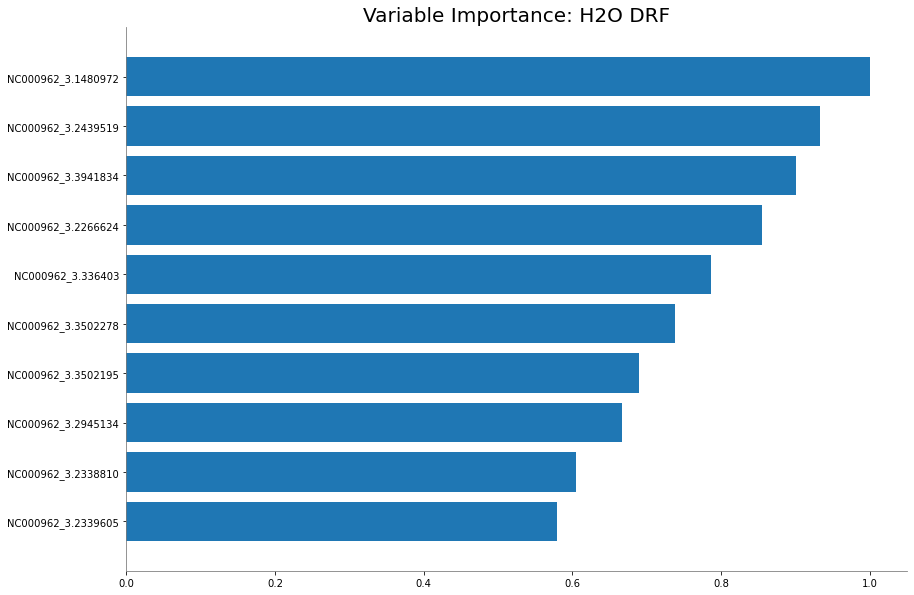

In [60]:
drf_automl_models[0].varimp_plot()

In [54]:
pd.DataFrame(glm_automl_id_params_dict['GBM_1_AutoML_20201101_101936'])

,auc,params
balance_classes,0.99035,False
build_tree_one_node,0.99035,False
calibrate_model,0.99035,False
calibration_frame,0.99035,None
categorical_encoding,0.99035,AUTO
check_constant_response,0.99035,True
checkpoint,0.99035,None
class_sampling_factors,0.99035,None
col_sample_rate,0.99035,0.8
col_sample_rate_change_per_level,0.99035,1


In [43]:
model.summary

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_2


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.6230624103247986
RMSE: 0.7893430244987274
LogLoss: 9.439694348399003
Mean Per-Class Error: 0.3328674628816205


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.345896,0.654104


AUC: 0.6726413039532435
AUCPR: 0.7764300479188593
Gini: 0.345282607906487

Confusion Matrix (Act/Pred) for max f1 @ threshold = 8.378671271492799e-13: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score:  7.75 %


ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.49401999576322275
RMSE: 0.7028655602341196
LogLoss: 10.022553621849632
Mean Per-Class Error: 0.35708776595744685
AUC: 0.6625458037825058
AUCPR: 0.7971565850654403
Gini: 0.32509160756501165

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.2727881169610487e-10: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 23.65 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,8.378671e-13,0.805721,399.0
1,max f2,8.378671e-13,0.912035,399.0
2,max f0point5,3.835688e-07,0.765070,223.0
3,max accuracy,6.048750e-10,0.686627,389.0
4,max precision,1.108116e-05,0.863636,116.0
5,max recall,8.378671e-13,1.000000,399.0
6,max specificity,1.000000e+00,0.957055,0.0
7,max absolute_mcc,3.835688e-07,0.313540,223.0
8,max min_per_class_accuracy,1.381328e-07,0.644172,260.0
9,max mean_per_class_accuracy,3.835688e-07,0.667133,223.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,1.000000e+00,0.988166,0.988166,0.666667,1.000000e+00,0.666667,1.000000,0.011834,0.011834,-1.183432,-1.183432
1,,2,0.021956,1.000000e+00,0.592899,0.808499,0.400000,1.000000e+00,0.545455,1.000000,0.005917,0.017751,-40.710059,-19.150081
2,,3,0.031936,1.000000e+00,0.889349,0.833765,0.600000,1.000000e+00,0.562500,1.000000,0.008876,0.026627,-11.065089,-16.623521
3,,4,0.041916,9.646416e-01,1.185799,0.917582,0.800000,9.901758e-01,0.619048,0.997661,0.011834,0.038462,18.579882,-8.241758
4,,5,0.051896,8.311898e-01,1.482249,1.026172,1.000000,8.928568e-01,0.692308,0.977506,0.014793,0.053254,48.224852,2.617205
5,,6,0.101796,1.123499e-01,1.363669,1.191612,0.920000,5.018825e-01,0.803922,0.744357,0.068047,0.121302,36.366864,19.161156
6,,7,0.151697,1.857386e-03,1.363669,1.248209,0.920000,3.319127e-02,0.842105,0.510421,0.068047,0.189349,36.366864,24.820928
7,,8,0.201597,2.190232e-04,1.304379,1.262113,0.880000,6.011382e-04,0.851485,0.384228,0.065089,0.254438,30.437870,26.211260
8,,9,0.301397,5.605416e-06,1.245089,1.256476,0.840000,4.508047e-05,0.847682,0.257015,0.124260,0.378698,24.508876,25.647557
9,,10,0.401198,9.520323e-07,1.067219,1.209397,0.720000,2.760087e-06,0.815920,0.193082,0.106509,0.485207,6.721893,20.939680


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,1.272788e-10,0.790905,399.0
1,max f2,1.272788e-10,0.904364,399.0
2,max f0point5,1.101170e-08,0.741124,398.0
3,max accuracy,1.272788e-10,0.654129,399.0
4,max precision,9.999998e-01,0.966102,4.0
5,max recall,1.272788e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.990544,0.0
7,max absolute_mcc,1.101170e-08,0.272315,398.0
8,max min_per_class_accuracy,1.101170e-08,0.626250,398.0
9,max mean_per_class_accuracy,1.101170e-08,0.642912,398.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.020442,1.000000e+00,1.467600,1.467600,0.960000,1.000000e+00,0.960000,1.000000,0.03000,0.03000,46.760000,46.760000
1,,2,0.020442,1.000000e+00,0.000000,1.467600,0.000000,0.000000e+00,0.960000,1.000000,0.00000,0.03000,-100.000000,46.760000
2,,3,0.030253,1.000000e+00,1.528750,1.487432,1.000000,1.000000e+00,0.972973,1.000000,0.01500,0.04500,52.875000,48.743243
3,,4,0.040065,1.000000e+00,1.401354,1.466352,0.916667,1.000000e+00,0.959184,1.000000,0.01375,0.05875,40.135417,46.635204
4,,5,0.050695,1.000000e+00,1.411154,1.454778,0.923077,1.000000e+00,0.951613,1.000000,0.01500,0.07375,41.115385,45.477823
5,,6,0.100572,9.999997e-01,1.478627,1.466606,0.967213,9.999999e-01,0.959350,1.000000,0.07375,0.14750,47.862705,46.660569
6,,7,0.150450,9.999582e-01,1.102705,1.345965,0.721311,9.999888e-01,0.880435,0.999996,0.05500,0.20250,10.270492,34.596467
7,,8,0.200327,9.990533e-01,1.228012,1.316597,0.803279,9.998026e-01,0.861224,0.999948,0.06125,0.26375,22.801230,31.659694
8,,9,0.300082,9.298661e-04,1.027520,1.220501,0.672131,3.623897e-01,0.798365,0.788008,0.10250,0.36625,2.752049,22.050068
9,,10,0.399836,4.129111e-06,1.140297,1.200491,0.745902,1.078321e-04,0.785276,0.591436,0.11375,0.48000,14.029713,20.049080


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.74085116,0.024191575,0.7389558,0.734127,0.7447699,0.7095436,0.7768595
1,auc,0.77306044,0.021443421,0.77611834,0.79549605,0.7602201,0.74347824,0.7899896
2,aucpr,0.85476434,0.0061987354,0.85713553,0.85604465,0.8438958,0.85730803,0.85943764
3,err,0.25914884,0.024191575,0.26104417,0.26587301,0.25523013,0.29045644,0.2231405
4,err_count,63.4,6.1886992,65.0,67.0,61.0,70.0,54.0
5,f0point5,0.77596784,0.03441337,0.7824223,0.754717,0.7696127,0.7419355,0.83115184
6,f1,0.82380354,0.007052221,0.8179272,0.819407,0.8355795,0.8214286,0.8246753
7,f2,0.8810496,0.042874616,0.85680753,0.8962264,0.9139151,0.92,0.818299
8,lift_top_group,1.4284575,0.23887382,1.0060606,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,10.032916,6.0386367,7.355562,12.506874,18.742535,2.575395,8.984215


<bound method ModelBase.summary of >

In [44]:
model.actual_params

{'model_id': 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_2',
 'nfolds': 5,
 'seed': 1234,
 'fold_assignment': 'Random',
 'fold_column': None,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'training_frame': None,
 'validation_frame': None,
 'response_column': 'Resistance_Status',
 'ignored_columns': ['SampleID'],
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'laplace': 0.1,
 'min_sdev': 0.1,
 'eps_sdev': 0.9,
 'min_prob': 1.0,
 'eps_prob': 0.9,
 'compute_metrics': False,
 'max_runtime_secs': 1.7976931348623157e+308,
 'export_checkpoints_dir': None}

In [14]:
model1 = h2o.load_model("../models/ALL_FEATURES/nb_grid/Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_1")

In [46]:
model1.actual_params

dict

In [50]:
a_dict= model.actual_params
b_dict= model1.actual_params

for diff in list(dictdiffer.diff(a_dict, b_dict)):         
    print(diff)

('change', 'model_id', ('Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_2', 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_1'))
('change', 'laplace', (0.1, 0.9))
('change', 'eps_sdev', (0.9, 0.6))
('change', 'eps_prob', (0.9, 0.6))


## Train similar algorithm with the same parameters

In [66]:
model1.actual_params

{'model_id': 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_1',
 'nfolds': 5,
 'seed': 1234,
 'fold_assignment': 'Random',
 'fold_column': None,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'training_frame': None,
 'validation_frame': None,
 'response_column': 'Resistance_Status',
 'ignored_columns': ['SampleID'],
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'laplace': 0.9,
 'min_sdev': 0.1,
 'eps_sdev': 0.6,
 'min_prob': 1.0,
 'eps_prob': 0.6,
 'compute_metrics': False,
 'max_runtime_secs': 1.7976931348623157e+308,
 'export_checkpoints_dir': None}

In [68]:
{**model1.actual_params}

{'model_id': 'Grid_NaiveBayes_py_5_sid_8e0c_model_python_1604225741410_1205_model_1',
 'nfolds': 5,
 'seed': 1234,
 'fold_assignment': 'Random',
 'fold_column': None,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'training_frame': 10,
 'validation_frame': None,
 'response_column': 'Resistance_Status',
 'ignored_columns': ['SampleID'],
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'laplace': 0.9,
 'min_sdev': 0.1,
 'eps_sdev': 0.6,
 'min_prob': 1.0,
 'eps_prob': 0.6,
 'compute_metrics': False,
 'max_runtime_secs': 1.7976931348623157e+308,
 'export_checkpoints_dir': None}

In [73]:
mdl = H2ONaiveBayesEstimator(

 nfolds= 5,
 seed= 1234,
 fold_assignment= 'Random',
 fold_column= None,
 keep_cross_validation_models= True,
 keep_cross_validation_predictions= True,
 keep_cross_validation_fold_assignment= False,
 ignore_const_cols= True,
 score_each_iteration= False,
 balance_classes= False,
 class_sampling_factors= None,
 max_after_balance_size= 5.0,
 max_confusion_matrix_size= 20,
 max_hit_ratio_k= 0,
 laplace= 0.9,
 min_sdev= 0.1,
 eps_sdev= 0.6,
 min_prob= 1.0,
 eps_prob= 0.6,
 compute_metrics= False,
 export_checkpoints_dir= None)


mdl.train(x=x, y=y, training_frame=train, validation_frame=test) 

mdl


naivebayes Model Build progress: |████████████████████████████████████████| 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604225741410_5596


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.346097,0.653903




ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.6088986395173629
RMSE: 0.7803195752493737
LogLoss: 9.264358009127474
Mean Per-Class Error: 0.3510999382872908
AUC: 0.658338476059099
AUCPR: 0.7693302572383104
Gini: 0.316676952118198

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.6220420045776861e-12: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score:  9.21 %


ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.4976600357752729
RMSE: 0.7054502362146269
LogLoss: 10.91944247185881
Mean Per-Class Error: 0.34568853427895985
AUC: 0.6664420803782505
AUCPR: 0.797701018048522
Gini: 0.33288416075650096

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.484107825917021e-11: 

Maximum Metrics: Maximum metrics at their respective thresholds


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,1.622042e-12,0.805721,399.0
1,max f2,1.622042e-12,0.912035,399.0
2,max f0point5,1.191813e-07,0.761745,270.0
3,max accuracy,4.758154e-10,0.680639,392.0
4,max precision,1.864487e-05,0.863636,115.0
5,max recall,1.622042e-12,1.000000,399.0
6,max specificity,1.000000e+00,0.957055,0.0
7,max absolute_mcc,1.191813e-07,0.281809,270.0
8,max min_per_class_accuracy,1.654924e-07,0.639053,257.0
9,max mean_per_class_accuracy,1.303375e-07,0.648900,265.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,1.000000e+00,0.988166,0.988166,0.666667,1.000000e+00,0.666667,1.000000,0.011834,0.011834,-1.183432,-1.183432
1,,2,0.021956,1.000000e+00,0.889349,0.943249,0.600000,1.000000e+00,0.636364,1.000000,0.008876,0.020710,-11.065089,-5.675094
2,,3,0.031936,1.000000e+00,0.592899,0.833765,0.400000,1.000000e+00,0.562500,1.000000,0.005917,0.026627,-40.710059,-16.623521
3,,4,0.041916,9.995931e-01,1.185799,0.917582,0.800000,9.999018e-01,0.619048,0.999977,0.011834,0.038462,18.579882,-8.241758
4,,5,0.051896,9.806915e-01,1.482249,1.026172,1.000000,9.906748e-01,0.692308,0.998188,0.014793,0.053254,48.224852,2.617205
5,,6,0.101796,3.700749e-01,1.363669,1.191612,0.920000,7.018496e-01,0.803922,0.852924,0.068047,0.121302,36.366864,19.161156
6,,7,0.151697,4.518398e-03,1.422959,1.267713,0.960000,1.041585e-01,0.855263,0.606620,0.071006,0.192308,42.295858,26.771255
7,,8,0.201597,3.522155e-04,1.126509,1.232761,0.760000,1.112863e-03,0.831683,0.456742,0.056213,0.248521,12.650888,23.276115
8,,9,0.301397,6.534158e-06,1.215444,1.227027,0.820000,5.820506e-05,0.827815,0.305522,0.121302,0.369822,21.544379,22.702692
9,,10,0.401198,1.673965e-06,1.037574,1.179899,0.700000,3.577505e-06,0.796020,0.229522,0.103550,0.473373,3.757396,17.989932


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,1.484108e-11,0.790905,399.0
1,max f2,1.484108e-11,0.904364,399.0
2,max f0point5,3.601569e-10,0.750297,398.0
3,max accuracy,1.484108e-11,0.654129,399.0
4,max precision,9.999997e-01,0.961905,4.0
5,max recall,1.484108e-11,1.000000,399.0
6,max specificity,1.000000e+00,0.990544,0.0
7,max absolute_mcc,3.601569e-10,0.293984,398.0
8,max min_per_class_accuracy,3.601569e-10,0.632500,398.0
9,max mean_per_class_accuracy,3.601569e-10,0.654311,398.0



Gains/Lift Table: Avg response rate: 65.41 %, avg score: 22.07 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.018806,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.02875,0.02875,52.875000,52.875000
1,,2,0.022077,1.000000e+00,1.146562,1.472130,0.750000,1.000000e+00,0.962963,1.000000,0.00375,0.03250,14.656250,47.212963
2,,3,0.030253,1.000000e+00,1.528750,1.487432,1.000000,1.000000e+00,0.972973,1.000000,0.01250,0.04500,52.875000,48.743243
3,,4,0.040065,1.000000e+00,1.401354,1.466352,0.916667,1.000000e+00,0.959184,1.000000,0.01375,0.05875,40.135417,46.635204
4,,5,0.050695,1.000000e+00,1.411154,1.454778,0.923077,1.000000e+00,0.951613,1.000000,0.01500,0.07375,41.115385,45.477823
5,,6,0.100572,9.999908e-01,1.453566,1.454177,0.950820,9.999989e-01,0.951220,0.999999,0.07250,0.14625,45.356557,45.417683
6,,7,0.150450,9.942224e-01,1.253074,1.387507,0.819672,9.988436e-01,0.907609,0.999616,0.06250,0.20875,25.307377,38.750679
7,,8,0.200327,9.183396e-01,1.077643,1.310357,0.704918,9.694092e-01,0.857143,0.992095,0.05375,0.26250,7.764344,31.035714
8,,9,0.300082,2.951471e-05,1.027520,1.216335,0.672131,2.199444e-01,0.795640,0.735413,0.10250,0.36500,2.752049,21.633515
9,,10,0.399836,9.812856e-08,1.127766,1.194238,0.737705,3.653452e-06,0.781186,0.551937,0.11250,0.47750,12.776639,19.423824


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7432512,0.024023822,0.74698794,0.7380952,0.7447699,0.7095436,0.7768595
1,auc,0.76616967,0.02633042,0.76608944,0.7945493,0.75998425,0.726087,0.7841383
2,aucpr,0.8487915,0.0043183267,0.84857494,0.8534926,0.8446811,0.8443926,0.8528162
3,err,0.25674877,0.024023822,0.25301206,0.26190478,0.25523013,0.29045644,0.2231405
4,err_count,62.8,5.974948,63.0,66.0,61.0,70.0,54.0
5,f0point5,0.77597517,0.033293646,0.78778136,0.7536232,0.7696127,0.7419355,0.8269231
6,f1,0.82657146,0.0054394808,0.8235294,0.82539684,0.8355795,0.8214286,0.8269231
7,f2,0.887159,0.040783882,0.8626761,0.9122807,0.9139151,0.92,0.8269231
8,lift_top_group,1.4686999,0.15053996,1.2072728,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,10.923886,6.052298,9.333387,13.057011,19.005009,2.3136234,10.910403


## Train a grid of models

In [53]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator

MAX_MODELS= 10


hyper_params = {
                "laplace": [0.1, 0.6, 0.9],
                "eps_sdev": [0.6, 0.9],
                "eps_prob": [0.6, 0.9],
                "compute_metrics": [True, False]
                }

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2ONaiveBayesEstimator(
                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




# Train the grid
nb_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


nb_grid.train(x=x, y=y, training_frame=train, validation_frame=test) 



naivebayes Grid Build progress: |█████████████████████████████████████████| 100%


In [58]:
nb_grid_sorted = nb_grid.get_grid(sort_by='auc', decreasing=True)
nb_grid_sorted

    compute_metrics eps_prob eps_sdev laplace  \
0              true      0.6      0.6     0.1   
1             false      0.6      0.6     0.1   
2              true      0.9      0.6     0.6   
3             false      0.6      0.6     0.9   
4             false      0.9      0.6     0.6   
5              true      0.9      0.6     0.1   
6             false      0.6      0.9     0.9   
7              true      0.6      0.9     0.1   
8              true      0.9      0.9     0.6   
9             false      0.6      0.6     0.6   

                                                               model_ids  \
0  Grid_NaiveBayes_py_1_sid_82fb_model_python_1604225741410_5368_model_3   
1  Grid_NaiveBayes_py_1_sid_82fb_model_python_1604225741410_5368_model_4   
2  Grid_NaiveBayes_py_1_sid_82fb_model_python_1604225741410_5447_model_1   
3  Grid_NaiveBayes_py_1_sid_82fb_model_python_1604225741410_5447_mode...   
4  Grid_NaiveBayes_py_1_sid_82fb_model_python_1604225741410_5447_model_2   
5  G

## Read different GRID MODELS and create Stacked Ensemble

In [34]:
nb_grid = h2o.load_grid("../models/ALL_FEATURES/FINAL/./nb_grid/Grid_NaiveBayes_py_3_sid_9644_model_python_1604419067081_1")



glm_grid = h2o.load_grid("../models/ALL_FEATURES/FINAL/./glm_grid/Grid_GLM_py_3_sid_b7a1_model_python_1604419221083_1")



gbm_grid = h2o.load_grid("../models/ALL_FEATURES/FINAL/./gbm_grid/Grid_GBM_py_7_sid_9651_model_python_1604407520638_1")



xgb_grid = h2o.load_grid("../models/ALL_FEATURES/FINAL/./xgb_grid/Grid_XGBoost_py_7_sid_a3b5_model_python_1604427337744_1")



dl_grid = h2o.load_grid("../models/ALL_FEATURES/FINAL/./dl_grid/Grid_DeepLearning_py_3_sid_b7a1_model_python_1604419221083_608")


drf_grid = h2o.load_grid("../models/ALL_FEATURES/FINAL/./drf_grid/Grid_DRF_py_3_sid_9421_model_python_1604478808297_199")


In [12]:
def best_model_from_grid (model_grid):
    best_model = model_grid[0]
    for mdl in model_grid:
        if (mdl.model_performance(test).auc() > best_model.model_performance(test).auc()):
            best_model = mdl
    print(best_model.model_performance(test).auc())
    return best_model

In [13]:
best_nb_model = best_model_from_grid(nb_grid)
best_glm_model = best_model_from_grid(glm_grid)
best_gbm_model = best_model_from_grid(gbm_grid)
best_xgb_model= best_model_from_grid(xgb_grid)
best_dl_model= best_model_from_grid(dl_grid)
best_drf_model= best_model_from_grid(drf_grid)

0.6308581696736486
0.7338639416270374
0.684212436925981
0.7161487639307366


In [35]:
best_drf_model= best_model_from_grid(drf_grid)

0.6276273278396922


In [14]:
def extract_params_from_model(actual_params_dict, extra_params = []):
    final_params = actual_params_dict

    columns_to_be_removed =   [
 'model_id',
 'validation_frame',
 'response_column',
 'ignored_columns',
'training_frame',
*extra_params
]
    for col_name in columns_to_be_removed:
        del  final_params[col_name]

    return final_params

In [15]:
from h2o.estimators import H2ONaiveBayesEstimator

top_nb = H2ONaiveBayesEstimator(**extract_params_from_model(best_nb_model.actual_params))

top_nb.train(x=x, y=y, training_frame=train, validation_frame=test)

print('AUC on test data: ', top_nb.model_performance(test).auc(), "\n\n============================")

top_nb.model_performance


naivebayes Model Build progress: |████████████████████████████████████████| 100%
AUC on test data:  0.6308581696736486 

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604473452866_107


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.27036993349759847
RMSE: 0.5199710890978444
LogLoss: 4.3907733111276475
Mean Per-Class Error: 0.28826979905437355
AUC: 0.751100768321513
AUCPR: 0.8346945181496381
Gini: 0.5022015366430259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.4338228925939728e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.68 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.33561203828422775
RMSE: 0.5793203244183892
LogLoss: 4.38842128604827
Mean Per-Class Error: 0.3850328529422442
AUC: 0.6308581696736486
AUCPR: 0.7700108089513915
Gini: 0.2617163393472972

Confusion Matrix (Act

,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.345896,0.654104


,,0,1,Error,Rate
0,0,241.0,182.0,0.4303,(182.0/423.0)
1,1,152.0,648.0,0.19,(152.0/800.0)
2,Total,393.0,830.0,0.2731,(334.0/1223.0)


,metric,threshold,value,idx
0,max f1,2.433823e-05,0.795092,397.0
1,max f2,6.252900e-08,0.904364,399.0
2,max f0point5,9.490915e-02,0.799843,348.0
3,max accuracy,9.490915e-02,0.728536,348.0
4,max precision,9.999831e-01,0.893750,1.0
5,max recall,6.252900e-08,1.000000,399.0
6,max specificity,9.999997e-01,0.919622,0.0
7,max absolute_mcc,9.490915e-02,0.414922,348.0
8,max min_per_class_accuracy,7.526658e-01,0.699764,277.0
9,max mean_per_class_accuracy,9.490915e-02,0.711730,348.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.102208,1.000000e+00,1.467600,1.467600,0.960000,1.000000e+00,0.960000,1.000000,0.15000,0.15000,46.760000,46.760000
1,,2,0.150450,1.000000e+00,1.399195,1.445666,0.915254,1.000000e+00,0.945652,1.000000,0.06750,0.21750,39.919492,44.566576
2,,3,0.200327,9.999999e-01,1.278135,1.403954,0.836066,1.000000e+00,0.918367,1.000000,0.06375,0.28125,27.813525,40.395408
3,,4,0.300082,9.996645e-01,1.240543,1.349632,0.811475,9.999410e-01,0.882834,0.999980,0.12375,0.40500,24.054303,34.963215
4,,5,0.399836,9.916471e-01,1.190420,1.309911,0.778689,9.971887e-01,0.856851,0.999284,0.11875,0.52375,19.042008,30.991053
5,,6,0.500409,9.438170e-01,1.193171,1.286448,0.780488,9.761841e-01,0.841503,0.994641,0.12000,0.64375,19.317073,28.644812
6,,7,0.600164,2.706567e-01,0.989928,1.237163,0.647541,7.455082e-01,0.809264,0.953232,0.09875,0.74250,-1.007172,23.716281
7,,8,0.699918,1.046298e-06,0.789436,1.173351,0.516393,4.702651e-02,0.767523,0.824077,0.07875,0.82125,-21.056352,17.335134
8,,9,0.799673,2.625813e-12,0.864621,1.134839,0.565574,1.003969e-07,0.742331,0.721278,0.08625,0.90750,-13.537910,13.483896
9,,10,0.899428,6.179552e-17,0.538822,1.068735,0.352459,1.329336e-13,0.699091,0.641282,0.05375,0.96125,-46.117828,6.873523


,,0,1,Error,Rate
0,0,4.0,159.0,0.9755,(159.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,6.0,495.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,9.018296e-17,0.806723,351.0
1,max f2,1.103935e-27,0.912035,356.0
2,max f0point5,5.856787e-04,0.737212,270.0
3,max accuracy,4.350758e-16,0.678643,349.0
4,max precision,9.999998e-01,0.846715,4.0
5,max recall,1.103935e-27,1.000000,356.0
6,max specificity,1.000000e+00,0.877301,0.0
7,max absolute_mcc,9.999947e-01,0.226567,30.0
8,max min_per_class_accuracy,9.972941e-01,0.588957,123.0
9,max mean_per_class_accuracy,9.999947e-01,0.614967,30.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.035928,1.000000e+00,0.823471,0.823471,0.555556,1.000000e+00,0.555556,1.000000,0.029586,0.029586,-17.652860,-17.652860
1,,2,0.041916,1.000000e+00,0.988166,0.846999,0.666667,1.000000e+00,0.571429,1.000000,0.005917,0.035503,-1.183432,-15.300085
2,,3,0.051896,1.000000e+00,1.482249,0.969162,1.000000,1.000000e+00,0.653846,1.000000,0.014793,0.050296,48.224852,-3.083751
3,,4,0.101796,1.000000e+00,1.304379,1.133484,0.880000,1.000000e+00,0.764706,1.000000,0.065089,0.115385,30.437870,13.348416
4,,5,0.151697,1.000000e+00,1.422959,1.228706,0.960000,1.000000e+00,0.828947,1.000000,0.071006,0.186391,42.295858,22.870601
5,,6,0.201597,1.000000e+00,1.126509,1.203410,0.760000,1.000000e+00,0.811881,1.000000,0.056213,0.242604,12.650888,20.340969
6,,7,0.301397,9.999991e-01,1.245089,1.217211,0.840000,9.999998e-01,0.821192,1.000000,0.124260,0.366864,24.508876,21.721071
7,,8,0.401198,9.999738e-01,0.978284,1.157776,0.660000,9.999905e-01,0.781095,0.999998,0.097633,0.464497,-2.171598,15.777621
8,,9,0.500998,9.995045e-01,0.948639,1.116115,0.640000,9.998360e-01,0.752988,0.999965,0.094675,0.559172,-5.136095,11.611542
9,,10,0.600798,9.756694e-01,0.978284,1.093220,0.660000,9.911600e-01,0.737542,0.998503,0.097633,0.656805,-2.171598,9.321984




Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,3.107947e-10,0.790905,399.0
1,max f2,3.107947e-10,0.904364,399.0
2,max f0point5,6.877151e-04,0.755682,274.0
3,max accuracy,2.923637e-08,0.680294,398.0
4,max precision,1.000000e+00,0.841808,0.0
5,max recall,3.107947e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.867612,0.0
7,max absolute_mcc,6.877151e-04,0.301672,274.0
8,max min_per_class_accuracy,1.544699e-03,0.652482,263.0
9,max mean_per_class_accuracy,6.877151e-04,0.657559,274.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.119379,1.000000e+00,1.413570,1.413570,0.924658,1.000000e+00,0.924658,1.000000,0.16875,0.16875,41.357021,41.357021
1,,2,0.152903,1.000000e+00,1.193171,1.365247,0.780488,1.000000e+00,0.893048,1.000000,0.04000,0.20875,19.317073,36.524733
2,,3,0.200327,1.000000e+00,1.186099,1.322837,0.775862,1.000000e+00,0.865306,1.000000,0.05625,0.26500,18.609914,32.283673
3,,4,0.300082,9.999999e-01,1.202951,1.282984,0.786885,1.000000e+00,0.839237,1.000000,0.12000,0.38500,20.295082,28.298365
4,,5,0.399836,9.993061e-01,1.090174,1.234880,0.713115,9.999141e-01,0.807771,0.999979,0.10875,0.49375,9.017418,23.487986
5,,6,0.500409,1.397471e-01,1.081311,1.204016,0.707317,8.368773e-01,0.787582,0.967198,0.10875,0.60250,8.131098,20.401552
6,,7,0.600164,1.076027e-04,1.002459,1.170514,0.655738,1.313929e-02,0.765668,0.808622,0.10000,0.70250,0.245902,17.051431
7,,8,0.699918,4.439823e-09,0.889682,1.130489,0.581967,1.451966e-05,0.739486,0.693376,0.08875,0.79125,-11.031762,13.048919
8,,9,0.799673,3.509020e-12,0.877152,1.098887,0.573770,4.980517e-10,0.718814,0.606882,0.08750,0.87875,-12.284836,9.888676
9,,10,0.899428,1.257580e-20,0.839559,1.070125,0.549180,3.575193e-13,0.700000,0.539573,0.08375,0.96250,-16.044057,7.012500


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.73104733,0.019846965,0.7148594,0.7380952,0.748954,0.7053942,0.74793386
1,auc,0.7422957,0.045274667,0.76082253,0.76421857,0.7336871,0.66809005,0.7846601
2,aucpr,0.8217056,0.034272775,0.8420239,0.8386451,0.82557905,0.7615305,0.84074944
3,err,0.26895267,0.019846965,0.28514057,0.26190478,0.25104603,0.29460582,0.2520661
4,err_count,65.8,5.263079,71.0,66.0,60.0,71.0,61.0
5,f0point5,0.7643697,0.017081713,0.7551826,0.7643979,0.7801047,0.74091333,0.78125
6,f1,0.81966215,0.007892913,0.8116711,0.8156425,0.8324022,0.81748074,0.82111436
7,f2,0.8841447,0.018203774,0.8772936,0.8742515,0.89221555,0.91169727,0.8652658
8,lift_top_group,1.4557146,0.10668536,1.3676137,1.5849056,1.5031446,1.3251196,1.4977896
9,logloss,6.9117966,3.3499985,4.768356,6.8185945,12.62863,6.051729,4.2916746


<bound method ModelBase.model_performance of >

In [16]:
from h2o.estimators import H2OGeneralizedLinearEstimator

top_glm = H2OGeneralizedLinearEstimator(**extract_params_from_model(best_glm_model.actual_params, ['lambda']))

top_glm.train(x=x, y=y, training_frame=train, validation_frame=test)

print('AUC on test data: ', top_glm.model_performance(test).auc(), "\n\n============================")

top_glm.model_performance

glm Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test data:  0.7338639416270374 

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1604473452866_127


GLM Model: summary


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08508977637702173
RMSE: 0.2917015193258714


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.6, lambda = 0.02848 )",15334,146,8,py_2_sid_92b4


LogLoss: 0.29866192262637375
Null degrees of freedom: 1222
Residual degrees of freedom: 1076
Null deviance: 1577.310356148988
Residual deviance: 730.5270627441101
AIC: 1024.52706274411
AUC: 0.9639509456264777
AUCPR: 0.9822270888206597
Gini: 0.9279018912529553

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5725036596096081: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.41 %


ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1962612315157875
RMSE: 0.4430138051074566
LogLoss: 0.5630769490236587
Null degrees of freedom: 500
Residual degrees of freedom: 354
Null deviance: 633.0394016859412
Residual deviance: 564.203102921706
AIC: 858.203102921706
AUC: 0.7338639416270374
AUCPR: 0.8728658954340602
Gini: 0.46772788325407477

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08972008272326944: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: A

,,0,1,Error,Rate
0,0,367.0,56.0,0.1324,(56.0/423.0)
1,1,54.0,746.0,0.0675,(54.0/800.0)
2,Total,421.0,802.0,0.0899,(110.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.572504,0.931336,214.0
1,max f2,0.356559,0.944901,282.0
2,max f0point5,0.700340,0.943907,175.0
3,max accuracy,0.581421,0.910057,213.0
4,max precision,0.996835,1.000000,0.0
5,max recall,0.153271,1.000000,367.0
6,max specificity,0.996835,1.000000,0.0
7,max absolute_mcc,0.581421,0.801226,213.0
8,max min_per_class_accuracy,0.646315,0.901250,194.0
9,max mean_per_class_accuracy,0.646315,0.903344,194.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.982139,1.528750,1.528750,1.000000,0.989585,1.000000,0.989585,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.973500,1.528750,1.528750,1.000000,0.977295,1.000000,0.983686,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.969102,1.528750,1.528750,1.000000,0.971344,1.000000,0.979683,0.01500,0.04625,52.875000,52.875000
3,,4,0.041701,0.964483,1.528750,1.528750,1.000000,0.966606,1.000000,0.976093,0.01750,0.06375,52.875000,52.875000
4,,5,0.050695,0.957649,1.528750,1.528750,1.000000,0.961114,1.000000,0.973436,0.01375,0.07750,52.875000,52.875000
5,,6,0.100572,0.943844,1.528750,1.528750,1.000000,0.951081,1.000000,0.962349,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.933402,1.528750,1.528750,1.000000,0.939897,1.000000,0.954906,0.07625,0.23000,52.875000,52.875000
7,,8,0.237939,0.927807,1.528750,1.528750,1.000000,0.929312,1.000000,0.945495,0.13375,0.36375,52.875000,52.875000
8,,9,0.300082,0.900242,1.528750,1.528750,1.000000,0.913685,1.000000,0.938908,0.09500,0.45875,52.875000,52.875000
9,,10,0.399836,0.836563,1.516219,1.525624,0.991803,0.875106,0.997955,0.922990,0.15125,0.61000,51.621926,52.562372


,,0,1,Error,Rate
0,0,5.0,158.0,0.9693,(158.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,5.0,496.0,0.3154,(158.0/501.0)


,metric,threshold,value,idx
0,max f1,0.089720,0.810552,314.0
1,max f2,0.089720,0.914502,314.0
2,max f0point5,0.743340,0.800885,106.0
3,max accuracy,0.417132,0.684631,246.0
4,max precision,0.982788,1.000000,0.0
5,max recall,0.089720,1.000000,314.0
6,max specificity,0.982788,1.000000,0.0
7,max absolute_mcc,0.743340,0.413224,106.0
8,max min_per_class_accuracy,0.658888,0.671598,140.0
9,max mean_per_class_accuracy,0.743340,0.715604,106.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.964324,1.482249,1.482249,1.000000,0.974854,1.000000,0.974854,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.954236,1.482249,1.482249,1.000000,0.956000,1.000000,0.966284,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,0.946618,1.482249,1.482249,1.000000,0.950858,1.000000,0.961464,0.014793,0.047337,48.224852,48.224852
3,,4,0.041916,0.941936,1.482249,1.482249,1.000000,0.943595,1.000000,0.957209,0.014793,0.062130,48.224852,48.224852
4,,5,0.057884,0.940769,1.482249,1.482249,1.000000,0.940769,1.000000,0.952674,0.023669,0.085799,48.224852,48.224852
5,,6,0.101796,0.899943,1.414874,1.453185,0.954545,0.920113,0.980392,0.938628,0.062130,0.147929,41.487359,45.318482
6,,7,0.165669,0.895638,1.435928,1.446532,0.968750,0.896384,0.975904,0.922341,0.091716,0.239645,43.592825,44.653169
7,,8,0.225549,0.887078,1.383432,1.429780,0.933333,0.888139,0.964602,0.913261,0.082840,0.322485,38.343195,42.977955
8,,9,0.301397,0.844087,1.326222,1.403719,0.894737,0.867856,0.947020,0.901834,0.100592,0.423077,32.622236,40.371880
9,,10,0.403194,0.740708,1.133484,1.335491,0.764706,0.801076,0.900990,0.876395,0.115385,0.538462,13.348416,33.549124


,,0,1,Error,Rate
0,0,316.0,107.0,0.253,(107.0/423.0)
1,1,67.0,733.0,0.0838,(67.0/800.0)
2,Total,383.0,840.0,0.1423,(174.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.554776,0.893902,225.0
1,max f2,0.464372,0.916870,254.0
2,max f0point5,0.681450,0.904550,176.0
3,max accuracy,0.556865,0.857727,224.0
4,max precision,0.993660,1.000000,0.0
5,max recall,0.084812,1.000000,394.0
6,max specificity,0.993660,1.000000,0.0
7,max absolute_mcc,0.556865,0.680453,224.0
8,max min_per_class_accuracy,0.656222,0.833750,188.0
9,max mean_per_class_accuracy,0.681450,0.849580,176.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.973667,1.528750,1.528750,1.000000,0.980807,1.000000,0.980807,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.963888,1.528750,1.528750,1.000000,0.968386,1.000000,0.974845,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.957954,1.401354,1.487432,0.916667,0.961094,0.972973,0.970385,0.01375,0.04500,40.135417,48.743243
3,,4,0.040065,0.950705,1.528750,1.497551,1.000000,0.954682,0.979592,0.966539,0.01500,0.06000,52.875000,49.755102
4,,5,0.050695,0.944738,1.528750,1.504093,1.000000,0.947594,0.983871,0.962567,0.01625,0.07625,52.875000,50.409274
5,,6,0.101390,0.929867,1.504093,1.504093,0.983871,0.935998,0.983871,0.949282,0.07625,0.15250,50.409274,50.409274
6,,7,0.150450,0.921666,1.477792,1.495516,0.966667,0.925433,0.978261,0.941505,0.07250,0.22500,47.779167,49.551630
7,,8,0.200327,0.915747,1.503689,1.497551,0.983607,0.918166,0.979592,0.935694,0.07500,0.30000,50.368852,49.755102
8,,9,0.300082,0.876244,1.503689,1.499591,0.983607,0.900029,0.980926,0.923838,0.15000,0.45000,50.368852,49.959128
9,,10,0.399836,0.812819,1.478627,1.494361,0.967213,0.851946,0.977505,0.905902,0.14750,0.59750,47.862705,49.436094


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.86238706,0.03637163,0.83935744,0.81349206,0.8661088,0.90041494,0.892562
1,auc,0.9111482,0.02324415,0.8816739,0.89338607,0.92665094,0.93781054,0.9162194
2,aucpr,0.9501258,0.011801578,0.9353798,0.94006926,0.960504,0.96099806,0.953678
3,err,0.13761295,0.03637163,0.16064256,0.18650794,0.13389121,0.099585064,0.10743801
4,err_count,33.8,9.654015,40.0,47.0,32.0,24.0,26.0
5,f0point5,0.8841846,0.04026059,0.881273,0.8215452,0.87892896,0.92250925,0.9166667
6,f1,0.8980325,0.025651727,0.8780488,0.8653295,0.9041916,0.9259259,0.9166667
7,f2,0.91317517,0.022693839,0.8748481,0.9140436,0.93094945,0.929368,0.9166667
8,lift_top_group,1.5290636,0.03780725,1.5090909,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.3850064,0.029948005,0.41290522,0.42000005,0.3598041,0.35522503,0.3770977


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-11-04 07:18:13,0.000 sec,0,788.655178,0.644853
1,,2020-11-04 07:18:14,1.247 sec,1,448.728151,0.462550
2,,2020-11-04 07:18:14,1.749 sec,2,410.612893,0.451982
3,,2020-11-04 07:18:15,2.019 sec,3,403.013971,0.451449
4,,2020-11-04 07:18:15,2.295 sec,4,402.496627,0.451446
5,,2020-11-04 07:18:16,2.861 sec,5,365.907907,0.440881
6,,2020-11-04 07:18:16,3.192 sec,6,367.160196,0.440361
7,,2020-11-04 07:18:16,3.839 sec,7,365.763779,0.440038
8,,2020-11-04 07:18:17,4.270 sec,8,365.263531,0.440007


<bound method ModelBase.model_performance of >

In [17]:
from h2o.estimators import H2OGradientBoostingEstimator

top_gbm = H2OGradientBoostingEstimator(**extract_params_from_model(best_gbm_model.actual_params))

top_gbm.train(x=x, y=y, training_frame=train, validation_frame=test)

print('AUC on test data: ', top_gbm.model_performance(test).auc(), "\n\n============================")

top_gbm.model_performance

gbm Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test data:  0.684212436925981 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1604473452866_147


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12355073750405068
RMSE: 0.3514978485055786
LogLoss: 0.41053334266192226
Mean Per-Class Error: 0.11380319148936169
AUC: 0.9466164302600473
AUCPR: 0.9730472990891045
Gini: 0.8932328605200945

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6015905148327042: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.35 %


ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.20237251264178333
RMSE: 0.4498583250777775
LogLoss: 0.5892686769621505
Mean Per-Class Error: 0.34818673539768397
AUC: 0.684212436925981
AUCPR: 0.8280141965080744
Gini: 0.368424873851962

Confusion Matrix (Act/Pr

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,14776.0,5.0,5.0,5.0,12.0,24.0,18.84



LogLoss: 0.4458744135239038
Mean Per-Class Error: 0.1559219858156029
AUC: 0.9054151891252956
AUCPR: 0.9453339359832847
Gini: 0.8108303782505912

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6203277195649521: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.55 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,335.0,88.0,0.208,(88.0/423.0)
1,1,63.0,737.0,0.0788,(63.0/800.0)
2,Total,398.0,825.0,0.1235,(151.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.601591,0.907077,219.0
1,max f2,0.438716,0.934940,292.0
2,max f0point5,0.690101,0.933973,170.0
3,max accuracy,0.676194,0.877351,181.0
4,max precision,0.869637,1.000000,0.0
5,max recall,0.325531,1.000000,368.0
6,max specificity,0.869637,1.000000,0.0
7,max absolute_mcc,0.676194,0.747079,181.0
8,max min_per_class_accuracy,0.671983,0.872340,185.0
9,max mean_per_class_accuracy,0.676194,0.886197,181.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.868132,1.528750,1.528750,1.000000,0.868521,1.000000,0.868521,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.866713,1.528750,1.528750,1.000000,0.867238,1.000000,0.867905,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.865458,1.528750,1.528750,1.000000,0.866336,1.000000,0.867396,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.864398,1.528750,1.528750,1.000000,0.864941,1.000000,0.866795,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.863916,1.528750,1.528750,1.000000,0.864070,1.000000,0.866223,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.861616,1.528750,1.528750,1.000000,0.862872,1.000000,0.864561,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.858193,1.528750,1.528750,1.000000,0.859947,1.000000,0.863032,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.849013,1.528750,1.528750,1.000000,0.854348,1.000000,0.860869,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.796130,1.503689,1.520419,0.983607,0.825005,0.994550,0.848947,0.15000,0.45625,50.368852,52.041894
9,,10,0.399836,0.747383,1.516219,1.519371,0.991803,0.770741,0.993865,0.829436,0.15125,0.60750,51.621926,51.937117


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.307419,0.805721,399.0
1,max f2,0.307419,0.912035,399.0
2,max f0point5,0.574889,0.771567,251.0
3,max accuracy,0.520049,0.700599,302.0
4,max precision,0.868887,1.000000,0.0
5,max recall,0.307419,1.000000,399.0
6,max specificity,0.868887,1.000000,0.0
7,max absolute_mcc,0.574889,0.298774,251.0
8,max min_per_class_accuracy,0.625125,0.642012,206.0
9,max mean_per_class_accuracy,0.574889,0.651813,251.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.863534,1.482249,1.482249,1.00,0.865159,1.000000,0.865159,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.863278,1.482249,1.482249,1.00,0.863379,1.000000,0.864349,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,0.862149,1.482249,1.482249,1.00,0.862648,1.000000,0.863818,0.014793,0.047337,48.224852,48.224852
3,,4,0.041916,0.855305,1.482249,1.482249,1.00,0.858860,1.000000,0.862637,0.014793,0.062130,48.224852,48.224852
4,,5,0.051896,0.810482,1.482249,1.482249,1.00,0.831521,1.000000,0.856653,0.014793,0.076923,48.224852,48.224852
5,,6,0.101796,0.794512,1.363669,1.424121,0.92,0.799018,0.960784,0.828400,0.068047,0.144970,36.366864,42.412113
6,,7,0.151697,0.762226,1.482249,1.443242,1.00,0.783582,0.973684,0.813658,0.073964,0.218935,48.224852,44.324198
7,,8,0.201597,0.721776,1.185799,1.379518,0.80,0.736185,0.930693,0.794481,0.059172,0.278107,18.579882,37.951843
8,,9,0.301397,0.688004,0.859704,1.207394,0.58,0.705809,0.814570,0.765119,0.085799,0.363905,-14.029586,20.739449
9,,10,0.401198,0.667744,1.096864,1.179899,0.74,0.676464,0.796020,0.743066,0.109467,0.473373,9.686391,17.989932


,,0,1,Error,Rate
0,0,316.0,107.0,0.253,(107.0/423.0)
1,1,80.0,720.0,0.1,(80.0/800.0)
2,Total,396.0,827.0,0.1529,(187.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.620328,0.885065,218.0
1,max f2,0.401002,0.913966,312.0
2,max f0point5,0.677864,0.898268,181.0
3,max accuracy,0.649524,0.847915,203.0
4,max precision,0.882683,1.000000,0.0
5,max recall,0.288826,1.000000,391.0
6,max specificity,0.882683,1.000000,0.0
7,max absolute_mcc,0.676619,0.666127,182.0
8,max min_per_class_accuracy,0.671799,0.836879,185.0
9,max mean_per_class_accuracy,0.677864,0.844078,181.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.870417,1.528750,1.528750,1.000000,0.873084,1.000000,0.873084,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.868800,1.528750,1.528750,1.000000,0.869649,1.000000,0.871435,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.868038,1.273958,1.446115,0.833333,0.868365,0.945946,0.870439,0.01250,0.04375,27.395833,44.611486
3,,4,0.040065,0.866752,1.528750,1.466352,1.000000,0.867511,0.959184,0.869722,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.864975,1.528750,1.479435,1.000000,0.865870,0.967742,0.868914,0.01625,0.07500,52.875000,47.943548
5,,6,0.100572,0.860990,1.528750,1.503892,1.000000,0.863014,0.983740,0.865988,0.07625,0.15125,52.875000,50.389228
6,,7,0.150450,0.853363,1.528750,1.512133,1.000000,0.857707,0.989130,0.863243,0.07625,0.22750,52.875000,51.213315
7,,8,0.200327,0.843621,1.528750,1.516270,1.000000,0.849384,0.991837,0.859792,0.07625,0.30375,52.875000,51.627041
8,,9,0.300082,0.781103,1.453566,1.495426,0.950820,0.816461,0.978202,0.845388,0.14500,0.44875,45.356557,49.542575
9,,10,0.399836,0.747136,1.390912,1.469351,0.909836,0.762254,0.961145,0.824647,0.13875,0.58750,39.091189,46.935072


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8565668,0.032299425,0.8514056,0.8055556,0.8577406,0.8879668,0.8801653
1,auc,0.9086447,0.01979681,0.8883117,0.88834786,0.9164701,0.93350154,0.9165921
2,aucpr,0.94686466,0.0070258193,0.9452608,0.9375928,0.95610344,0.9510159,0.9443504
3,err,0.14343323,0.032299425,0.14859438,0.19444445,0.14225942,0.112033196,0.11983471
4,err_count,35.2,8.671793,37.0,49.0,34.0,27.0,29.0
5,f0point5,0.8897592,0.03896422,0.91455275,0.8266361,0.87781733,0.90909094,0.92069894
6,f1,0.89086396,0.024162022,0.88102895,0.8545994,0.8969697,0.9174312,0.90429044
7,f2,0.89315116,0.0300462,0.8498759,0.8845209,0.91697645,0.9259259,0.8884565
8,lift_top_group,1.5290636,0.03780725,1.5090909,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.44550183,0.02116445,0.4593563,0.4758178,0.4333991,0.42629868,0.4326373


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-04 07:23:55,5 min 8.382 sec,0.0,0.475651,0.644853,0.500000,0.654129,1.000000,0.345871,0.468954,0.631776,0.500000,0.674651,1.000000,0.325349
1,,2020-11-04 07:23:56,5 min 9.944 sec,1.0,0.453029,0.598991,0.875720,0.922482,1.501451,0.180703,0.459574,0.612578,0.691845,0.819714,1.482249,0.325349
2,,2020-11-04 07:23:58,5 min 11.366 sec,2.0,0.437292,0.568365,0.906288,0.950486,1.528750,0.160262,0.458121,0.609660,0.701374,0.832298,1.482249,0.323353
3,,2020-11-04 07:24:02,5 min 15.503 sec,5.0,0.406289,0.510449,0.919815,0.958180,1.528750,0.133279,0.455649,0.603879,0.678740,0.826602,1.482249,0.325349
4,,2020-11-04 07:24:06,5 min 19.749 sec,8.0,0.386466,0.474660,0.931226,0.964083,1.528750,0.129191,0.451510,0.595320,0.687870,0.825985,1.482249,0.325349
5,,2020-11-04 07:24:11,5 min 24.829 sec,12.0,0.372368,0.448989,0.939031,0.968973,1.528750,0.129191,0.449814,0.591003,0.689295,0.829139,1.482249,0.325349
6,,2020-11-04 07:24:16,5 min 29.233 sec,15.0,0.365574,0.436614,0.942148,0.970638,1.528750,0.125920,0.449314,0.589385,0.691763,0.831917,1.482249,0.325349
7,,2020-11-04 07:24:21,5 min 34.536 sec,19.0,0.360426,0.427084,0.943394,0.971278,1.528750,0.124285,0.449678,0.589612,0.687207,0.828988,1.482249,0.309381
8,,2020-11-04 07:24:26,5 min 39.569 sec,23.0,0.356933,0.420569,0.944471,0.971886,1.528750,0.125102,0.449331,0.588689,0.687870,0.829403,1.482249,0.325349
9,,2020-11-04 07:24:31,5 min 44.701 sec,27.0,0.354790,0.416660,0.945594,0.972505,1.528750,0.123467,0.449656,0.589176,0.686327,0.828669,1.482249,0.325349


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,120.293037,1.000000,0.073111
1,NC000962_3.2439519,80.965401,0.673068,0.049208
2,NC000962_3.2945134,52.182243,0.433793,0.031715
3,NC000962_3.1789735,47.460617,0.394542,0.028845
4,NC000962_3.1789798,38.207432,0.317620,0.023221
5,NC000962_3.832109,36.993755,0.307530,0.022484
6,NC000962_3.3528851,34.564754,0.287338,0.021007
7,NC000962_3.2867298,32.860004,0.273166,0.019971
8,NC000962_3.2866956,30.304333,0.251921,0.018418
9,NC000962_3.2300546,29.375105,0.244196,0.017853


<bound method ModelBase.model_performance of >

In [18]:
from h2o.estimators import H2OXGBoostEstimator

top_xgb = H2OXGBoostEstimator(**extract_params_from_model(best_xgb_model.actual_params))

top_xgb.train(x=x, y=y, training_frame=train, validation_frame=test)

print('AUC on test data: ', top_xgb.model_performance(test).auc(), "\n\n============================")

top_xgb.model_performance

xgboost Model Build progress: |███████████████████████████████████████████| 100%
AUC on test data:  0.7161487639307366 

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1604473452866_379


Model Summary: 


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07218454596686096
RMSE: 0.2686718183339312
LogLoss: 0.25321085715828595
Mean Per-Class Error: 0.07877659574468088
AUC: 0.9693942080378251
AUCPR: 0.9846420198010619
Gini: 0.9387884160756501

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5554821292559305: 



,,number_of_trees
0,,100.0


,,0,1,Error,Rate
0,0,388.0,35.0,0.0827,(35.0/423.0)
1,1,70.0,730.0,0.0875,(70.0/800.0)
2,Total,458.0,765.0,0.0859,(105.0/1223.0)


Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.29 %


ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.20783247133443164
RMSE: 0.455886467593009
LogLoss: 0.5926501458810222
Mean Per-Class Error: 0.310197117653465
AUC: 0.7161487639307366
AUCPR: 0.8582261180336427
Gini: 0.43229752786147313

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19317305088043213: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 62.81 %


ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.11045260871576916
RMSE: 0.3323441119017594
LogLoss: 0.354472171417395
Mean Per-Class Error: 0.14595005910165493
AUC: 0.9155112293144209
AUCPR: 0.9525693950745017
Gini: 0.8310224586288417

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5621484518051147: 

Maximum Metrics: Maximum metrics at their respective thres

,metric,threshold,value,idx
0,max f1,0.555482,0.932907,200.0
1,max f2,0.255160,0.947179,301.0
2,max f0point5,0.634664,0.955724,179.0
3,max accuracy,0.555482,0.914146,200.0
4,max precision,0.996992,1.000000,0.0
5,max recall,0.129443,1.000000,361.0
6,max specificity,0.996992,1.000000,0.0
7,max absolute_mcc,0.634664,0.815852,179.0
8,max min_per_class_accuracy,0.555482,0.912500,200.0
9,max mean_per_class_accuracy,0.634664,0.921223,179.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.990330,1.528750,1.528750,1.000000,0.992951,1.000000,0.992951,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.988310,1.528750,1.528750,1.000000,0.989119,1.000000,0.991111,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.987038,1.528750,1.528750,1.000000,0.987570,1.000000,0.989963,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.985301,1.528750,1.528750,1.000000,0.986257,1.000000,0.989055,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.982659,1.528750,1.528750,1.000000,0.983845,1.000000,0.987963,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.974911,1.528750,1.528750,1.000000,0.978080,1.000000,0.983061,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.968694,1.528750,1.528750,1.000000,0.971390,1.000000,0.979192,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.963891,1.528750,1.528750,1.000000,0.966525,1.000000,0.976038,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.942435,1.516219,1.524584,0.991803,0.954850,0.997275,0.968995,0.15125,0.45750,51.621926,52.458447
9,,10,0.399836,0.889812,1.516219,1.522497,0.991803,0.914134,0.995910,0.955308,0.15125,0.60875,51.621926,52.249744


,,0,1,Error,Rate
0,0,22.0,141.0,0.865,(141.0/163.0)
1,1,11.0,327.0,0.0325,(11.0/338.0)
2,Total,33.0,468.0,0.3034,(152.0/501.0)


,metric,threshold,value,idx
0,max f1,0.193173,0.811414,371.0
1,max f2,0.093578,0.912035,399.0
2,max f0point5,0.727320,0.776294,168.0
3,max accuracy,0.207489,0.698603,364.0
4,max precision,0.987254,1.000000,0.0
5,max recall,0.093578,1.000000,399.0
6,max specificity,0.987254,1.000000,0.0
7,max absolute_mcc,0.752970,0.363459,155.0
8,max min_per_class_accuracy,0.647942,0.625767,210.0
9,max mean_per_class_accuracy,0.752970,0.689803,155.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.978517,1.482249,1.482249,1.00,0.983545,1.000000,0.983545,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.974664,1.482249,1.482249,1.00,0.975704,1.000000,0.979981,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,0.969281,1.482249,1.482249,1.00,0.970923,1.000000,0.977150,0.014793,0.047337,48.224852,48.224852
3,,4,0.041916,0.965367,1.482249,1.482249,1.00,0.967103,1.000000,0.974758,0.014793,0.062130,48.224852,48.224852
4,,5,0.051896,0.961167,1.482249,1.482249,1.00,0.963433,1.000000,0.972580,0.014793,0.076923,48.224852,48.224852
5,,6,0.101796,0.922065,1.422959,1.453185,0.96,0.935317,0.980392,0.954314,0.071006,0.147929,42.295858,45.318482
6,,7,0.151697,0.891542,1.422959,1.443242,0.96,0.908866,0.973684,0.939364,0.071006,0.218935,42.295858,44.324198
7,,8,0.201597,0.852796,1.422959,1.438221,0.96,0.871610,0.970297,0.922593,0.071006,0.289941,42.295858,43.822134
8,,9,0.301397,0.805159,1.215444,1.364454,0.82,0.829867,0.920530,0.891889,0.121302,0.411243,21.544379,36.445394
9,,10,0.401198,0.750237,1.126509,1.305264,0.76,0.780205,0.880597,0.864107,0.112426,0.523669,12.650888,30.526362


,,0,1,Error,Rate
0,0,338.0,85.0,0.2009,(85.0/423.0)
1,1,95.0,705.0,0.1187,(95.0/800.0)
2,Total,433.0,790.0,0.1472,(180.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.562148,0.886792,205.0
1,max f2,0.267029,0.917805,298.0
2,max f0point5,0.745939,0.912675,147.0
3,max accuracy,0.597972,0.854456,196.0
4,max precision,0.993046,1.000000,0.0
5,max recall,0.034968,1.000000,398.0
6,max specificity,0.993046,1.000000,0.0
7,max absolute_mcc,0.597972,0.685088,196.0
8,max min_per_class_accuracy,0.634952,0.846336,184.0
9,max mean_per_class_accuracy,0.742288,0.854050,148.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.989003,1.528750,1.528750,1.000000,0.991156,1.000000,0.991156,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.986131,1.401354,1.467600,0.916667,0.987450,0.960000,0.989377,0.01375,0.03000,40.135417,46.760000
2,,3,0.030253,0.984382,1.528750,1.487432,1.000000,0.985385,0.972973,0.988083,0.01500,0.04500,52.875000,48.743243
3,,4,0.040065,0.983130,1.528750,1.497551,1.000000,0.983795,0.979592,0.987033,0.01500,0.06000,52.875000,49.755102
4,,5,0.050695,0.981832,1.528750,1.504093,1.000000,0.982572,0.983871,0.986097,0.01625,0.07625,52.875000,50.409274
5,,6,0.100572,0.974663,1.528750,1.516321,1.000000,0.978660,0.991870,0.982409,0.07625,0.15250,52.875000,51.632114
6,,7,0.150450,0.969404,1.478627,1.503825,0.967213,0.971941,0.983696,0.978938,0.07375,0.22625,47.862705,50.382473
7,,8,0.200327,0.962068,1.528750,1.510031,1.000000,0.965625,0.987755,0.975624,0.07625,0.30250,52.875000,51.003061
8,,9,0.300082,0.932912,1.478627,1.499591,0.967213,0.950052,0.980926,0.967123,0.14750,0.45000,47.862705,49.959128
9,,10,0.399836,0.876466,1.453566,1.488108,0.950820,0.903473,0.973415,0.951243,0.14500,0.59500,45.356557,48.810838


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.86223364,0.024826821,0.8473896,0.8293651,0.8786611,0.8921162,0.8636364
1,auc,0.9157304,0.015862042,0.8992785,0.8994387,0.9293239,0.9324534,0.9181574
2,aucpr,0.9530376,0.007992943,0.9534706,0.943458,0.96409404,0.9565282,0.9476374
3,err,0.13776635,0.024826821,0.15261044,0.17063493,0.12133891,0.10788382,0.13636364
4,err_count,33.8,6.8337398,38.0,43.0,29.0,26.0,33.0
5,f0point5,0.8921739,0.02193338,0.9037711,0.8612144,0.91315454,0.9053255,0.87740386
6,f1,0.89477503,0.022149472,0.87974685,0.8660436,0.9079365,0.92168677,0.8984615
7,f2,0.8979754,0.033914063,0.85696673,0.87092733,0.9027778,0.9386503,0.9205549
8,lift_top_group,1.5290636,0.03780725,1.5090909,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.35391113,0.03174001,0.3781046,0.39568308,0.3319343,0.32075858,0.34307507


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-04 07:26:21,56.353 sec,0.0,0.500000,0.693147,0.500000,0.654129,1.000000,0.345871,0.500000,0.693147,0.500000,0.674651,1.000000,0.325349
1,,2020-11-04 07:26:24,59.683 sec,1.0,0.480964,0.655718,0.825774,0.894069,1.458056,0.217498,0.489705,0.672718,0.656886,0.791509,1.261017,0.325349
2,,2020-11-04 07:26:25,1 min 0.180 sec,2.0,0.465107,0.625379,0.849733,0.905979,1.462283,0.205233,0.481085,0.655787,0.663838,0.793859,1.263933,0.325349
3,,2020-11-04 07:26:25,1 min 0.666 sec,3.0,0.452072,0.600771,0.865100,0.919921,1.487432,0.192968,0.474133,0.642147,0.679321,0.810308,1.329664,0.317365
4,,2020-11-04 07:26:26,1 min 1.182 sec,4.0,0.440826,0.579565,0.864094,0.919621,1.487432,0.197056,0.468898,0.631721,0.681980,0.811110,1.329664,0.319361
5,,2020-11-04 07:26:26,1 min 1.663 sec,5.0,0.431430,0.561745,0.873678,0.931627,1.520064,0.183156,0.468514,0.630853,0.675046,0.810711,1.482249,0.319361
6,,2020-11-04 07:26:27,1 min 2.196 sec,6.0,0.423968,0.547271,0.882324,0.937331,1.519964,0.181521,0.464652,0.623058,0.698697,0.835100,1.482249,0.319361
7,,2020-11-04 07:26:27,1 min 2.713 sec,7.0,0.417869,0.535051,0.885847,0.941040,1.528750,0.181521,0.463689,0.620880,0.698642,0.836104,1.482249,0.319361
8,,2020-11-04 07:26:29,1 min 4.478 sec,100.0,0.268672,0.253211,0.969394,0.984642,1.528750,0.085854,0.455886,0.592650,0.716149,0.858226,1.482249,0.303393


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,341.582031,1.000000,0.092694
1,NC000962_3.2439519,326.564636,0.956036,0.088619
2,NC000962_3.1480945,141.308517,0.413688,0.038346
3,NC000962_3.832109,134.191193,0.392852,0.036415
4,NC000962_3.3528851,129.126999,0.378026,0.035041
5,NC000962_3.2300546,97.839500,0.286430,0.026550
6,NC000962_3.1340688,86.191612,0.252331,0.023390
7,NC000962_3.1636892,80.082672,0.234446,0.021732
8,NC000962_3.2945134,72.833595,0.213224,0.019765
9,NC000962_3.1789735,66.151566,0.193662,0.017951


<bound method ModelBase.model_performance of >

In [22]:
from h2o.estimators import H2ODeepLearningEstimator

top_dl = H2ODeepLearningEstimator(**extract_params_from_model(best_dl_model.actual_params))

top_dl.train(x=x, y=y, training_frame=train, validation_frame=test)

print('AUC on test data: ', top_dl.model_performance(test).auc(), "\n\n============================")

top_dl.model_performance

deeplearning Model Build progress: |██████████████████████████████████████| 100%
AUC on test data:  0.6505790104185574 

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1604473452866_493


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 7,919,002 weights/biases, 99.4 MB, 12,496 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.02311097396247595
RMSE: 0.15202293893513555
LogLoss: 0.07335429116936806
Mean Per-Class Error: 0.01729609929078013
AUC: 0.9979669030732861
AUCPR: 0.9989602385238957
Gini: 0.9959338061465721

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9133550635688119: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 67.47 %


ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.30994850561715

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15334,Input,0,,,,,,,,,
1,,2,500,RectifierDropout,50,0,0,0.188571,0.206805,0,0.00208144,0.0121314,0.495868,0.0049747
2,,3,500,RectifierDropout,50,0,0,0.010732,0.0531609,0,-0.00116407,0.0463979,0.994188,0.00669462
3,,4,2,Softmax,,0,0,0.00115858,0.0010624,0,0.00712921,0.244048,-0.000119586,0.00660053


,,0,1,Error,Rate
0,0,416.0,7.0,0.0165,(7.0/423.0)
1,1,16.0,784.0,0.02,(16.0/800.0)
2,Total,432.0,791.0,0.0188,(23.0/1223.0)


,metric,threshold,value,idx
0,max f1,9.133551e-01,0.985544,179.0
1,max f2,2.139623e-01,0.986159,234.0
2,max f0point5,9.520168e-01,0.991335,169.0
3,max accuracy,9.133551e-01,0.981194,179.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,3.335256e-02,1.000000,271.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.133551e-01,0.958771,179.0
8,max min_per_class_accuracy,9.133551e-01,0.980000,179.0
9,max mean_per_class_accuracy,9.520168e-01,0.982704,169.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.034342,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.05250,0.05250,52.875000,52.875000
1,,2,0.040883,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.01000,0.06250,52.875000,52.875000
2,,3,0.050695,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.01500,0.07750,52.875000,52.875000
3,,4,0.100572,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.07625,0.15375,52.875000,52.875000
4,,5,0.150450,1.000000e+00,1.528750,1.528750,1.000000,1.000000e+00,1.000000,1.000000,0.07625,0.23000,52.875000,52.875000
5,,6,0.200327,9.999998e-01,1.528750,1.528750,1.000000,9.999999e-01,1.000000,1.000000,0.07625,0.30625,52.875000,52.875000
6,,7,0.300082,9.999982e-01,1.528750,1.528750,1.000000,9.999993e-01,1.000000,1.000000,0.15250,0.45875,52.875000,52.875000
7,,8,0.399836,9.999812e-01,1.528750,1.528750,1.000000,9.999924e-01,1.000000,0.999998,0.15250,0.61125,52.875000,52.875000
8,,9,0.500409,9.998787e-01,1.528750,1.528750,1.000000,9.999476e-01,1.000000,0.999988,0.15375,0.76500,52.875000,52.875000
9,,10,0.600164,9.965054e-01,1.516219,1.526667,0.991803,9.991603e-01,0.998638,0.999850,0.15125,0.91625,51.621926,52.666723


,,0,1,Error,Rate
0,0,5.0,158.0,0.9693,(158.0/163.0)
1,1,3.0,335.0,0.0089,(3.0/338.0)
2,Total,8.0,493.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,3.650310e-05,0.806258,394.0
1,max f2,4.048956e-07,0.912035,399.0
2,max f0point5,9.779219e-01,0.752972,197.0
3,max accuracy,3.650310e-05,0.678643,394.0
4,max precision,9.999032e-01,0.865385,26.0
5,max recall,4.048956e-07,1.000000,399.0
6,max specificity,9.999999e-01,0.957055,0.0
7,max absolute_mcc,9.988377e-01,0.261146,86.0
8,max min_per_class_accuracy,9.872833e-01,0.631902,177.0
9,max mean_per_class_accuracy,9.860960e-01,0.635478,179.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.029940,1.000000e+00,1.284615,1.284615,0.866667,1.000000,0.866667,1.000000,0.038462,0.038462,28.461538,28.461538
1,,2,0.031936,1.000000e+00,1.482249,1.296967,1.000000,1.000000,0.875000,1.000000,0.002959,0.041420,48.224852,29.696746
2,,3,0.041916,1.000000e+00,0.000000,0.988166,0.000000,1.000000,0.666667,1.000000,0.000000,0.041420,-100.000000,-1.183432
3,,4,0.051896,1.000000e+00,1.482249,1.083182,1.000000,1.000000,0.730769,1.000000,0.014793,0.056213,48.224852,8.318161
4,,5,0.101796,9.999967e-01,1.482249,1.278803,1.000000,0.999999,0.862745,0.999999,0.073964,0.130178,48.224852,27.880265
5,,6,0.151697,9.999702e-01,1.245089,1.267713,0.840000,0.999985,0.855263,0.999995,0.062130,0.192308,24.508876,26.771255
6,,7,0.201597,9.999130e-01,1.304379,1.276788,0.880000,0.999939,0.861386,0.999981,0.065089,0.257396,30.437870,27.678833
7,,8,0.301397,9.995746e-01,1.126509,1.227027,0.760000,0.999787,0.827815,0.999917,0.112426,0.369822,12.650888,22.702692
8,,9,0.401198,9.981044e-01,1.067219,1.187274,0.720000,0.998830,0.800995,0.999646,0.106509,0.476331,6.721893,18.727369
9,,10,0.500998,9.938244e-01,1.067219,1.163358,0.720000,0.996487,0.784861,0.999017,0.106509,0.582840,6.721893,16.335840


,,0,1,Error,Rate
0,0,236.0,187.0,0.4421,(187.0/423.0)
1,1,48.0,752.0,0.06,(48.0/800.0)
2,Total,284.0,939.0,0.1922,(235.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.347095,0.864865,253.0
1,max f2,0.020833,0.923605,338.0
2,max f0point5,0.996316,0.857980,41.0
3,max accuracy,0.541282,0.810303,231.0
4,max precision,0.999999,0.949153,0.0
5,max recall,0.000006,1.000000,399.0
6,max specificity,0.999999,0.957447,0.0
7,max absolute_mcc,0.541282,0.566208,231.0
8,max min_per_class_accuracy,0.994174,0.784870,52.0
9,max mean_per_class_accuracy,0.996316,0.788630,41.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.023712,1.000000e+00,1.317888,1.317888,0.862069,1.000000,0.862069,1.000000,0.03125,0.03125,31.788793,31.788793
1,,2,0.030253,1.000000e+00,1.337656,1.322162,0.875000,1.000000,0.864865,1.000000,0.00875,0.04000,33.765625,32.216216
2,,3,0.040065,1.000000e+00,1.528750,1.372755,1.000000,1.000000,0.897959,1.000000,0.01500,0.05500,52.875000,37.275510
3,,4,0.050695,1.000000e+00,1.528750,1.405464,1.000000,1.000000,0.919355,1.000000,0.01625,0.07125,52.875000,40.546371
4,,5,0.100572,1.000000e+00,1.428504,1.416890,0.934426,1.000000,0.926829,1.000000,0.07125,0.14250,42.850410,41.689024
5,,6,0.150450,9.999999e-01,1.528750,1.453974,1.000000,1.000000,0.951087,1.000000,0.07625,0.21875,52.875000,45.397418
6,,7,0.200327,9.999994e-01,1.478627,1.460112,0.967213,1.000000,0.955102,1.000000,0.07375,0.29250,47.862705,46.011224
7,,8,0.300082,9.999898e-01,1.428504,1.449605,0.934426,0.999997,0.948229,0.999999,0.14250,0.43500,42.850410,44.960490
8,,9,0.399836,9.998919e-01,1.353320,1.425583,0.885246,0.999960,0.932515,0.999989,0.13500,0.57000,35.331967,42.558282
9,,10,0.500409,9.989090e-01,1.118598,1.363885,0.731707,0.999575,0.892157,0.999906,0.11250,0.68250,11.859756,36.388480


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8374349,0.0087659145,0.8313253,0.82539684,0.8410042,0.84647304,0.8429752
1,auc,0.88836855,0.013349511,0.88852817,0.884155,0.8817217,0.9109472,0.8764908
2,aucpr,0.9201952,0.024886752,0.9496402,0.90957695,0.9089002,0.94233024,0.8905286
3,err,0.1625651,0.0087659145,0.16867469,0.17460318,0.15899582,0.15352698,0.1570248
4,err_count,39.8,3.0331502,42.0,44.0,38.0,37.0,38.0
5,f0point5,0.8603401,0.01917254,0.8935611,0.84606344,0.8592849,0.85233444,0.8504566
6,f1,0.88042164,0.012782072,0.86624205,0.8674699,0.8869048,0.8945869,0.8869048
7,f2,0.90295094,0.039588936,0.84054387,0.88998765,0.9163592,0.941247,0.9266169
8,lift_top_group,1.3490866,0.1913198,1.5090909,1.5849056,1.1273584,1.2830523,1.2410257
9,logloss,1.2103684,0.435455,1.7714031,1.5420785,0.93353355,0.7188616,1.085965


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-04 07:47:37,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-04 07:47:40,17 min 30.936 sec,58 obs/sec,0.141455,1,173.0,0.550877,1.637469,-0.341319,...,0.860514,1.175962,0.266558,0.55017,1.769689,-0.379003,0.602135,0.723004,0.741124,0.317365
2,,2020-11-04 07:50:32,20 min 22.566 sec,84 obs/sec,10.217498,74,12496.0,0.152023,0.073354,0.897849,...,0.998960,1.528750,0.018806,0.55673,1.998591,-0.412085,0.650579,0.783736,1.284615,0.321357


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.2591829,1.000000,1.000000,0.000123
1,NC000962_3.1480948,0.778770,0.778770,0.000096
2,NC000962_3.1480945,0.762197,0.762197,0.000094
3,NC000962_3.1789798,0.737353,0.737353,0.000091
4,NC000962_3.3528851,0.726664,0.726664,0.000089
5,NC000962_3.1636892,0.726348,0.726348,0.000089
6,NC000962_3.1789795,0.689518,0.689518,0.000085
7,NC000962_3.2300546,0.680680,0.680680,0.000084
8,NC000962_3.2945134,0.679694,0.679694,0.000083
9,NC000962_3.3934878,0.653823,0.653823,0.000080


<bound method ModelBase.model_performance of >

In [62]:
from h2o.estimators import H2ORandomForestEstimator

#top_drf = H2ORandomForestEstimator(**extract_params_from_model(best_drf_model.actual_params, ['weights_column']))


top_drf = H2ORandomForestEstimator(**{**extract_params_from_model(best_drf_model.actual_params, ['weights_column']),
                                    'nfolds':5,
                                    'fold_assignment':'random'
                                    })


top_drf.train(x=x, y=y, training_frame=train, validation_frame=test)

print('AUC on test data: ', top_drf.model_performance(test).auc(), "\n\n============================")

top_drf.model_performance

drf Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test data:  0.5949649689621375 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1604473452866_1136


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,20.0,20.0,4245.0,5.0,5.0,5.0,7.0,18.0,12.15




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2103882060723799
RMSE: 0.4586809414749864
LogLoss: 0.6073605148899133
Mean Per-Class Error: 0.23521039603960392
AUC: 0.8344206373762376
AUCPR: 0.8288853485092067
Gini: 0.6688412747524752

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6458369548724031: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 49.75 %, avg score: 63.59 %


ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.2169740929087702
RMSE: 0.4658047798260235
LogLoss: 0.6232817135111628
Mean Per-Class Error: 0.417640759429339
AUC: 0.5949649689621375
AUCPR: 0.7692351352813652
Gini: 0.18992993792427493

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4043096005966431: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 65.47 %


,,0,1,Error,Rate
0,0,558.0,250.0,0.3094,(250.0/808.0)
1,1,133.0,667.0,0.1663,(133.0/800.0)
2,Total,691.0,917.0,0.2382,(383.0/1608.0)


,metric,threshold,value,idx
0,max f1,0.645837,0.776937,182.0
1,max f2,0.488603,0.853903,289.0
2,max f0point5,0.716962,0.774829,127.0
3,max accuracy,0.703019,0.764925,140.0
4,max precision,0.903655,1.000000,0.0
5,max recall,0.344383,1.000000,379.0
6,max specificity,0.903655,1.000000,0.0
7,max absolute_mcc,0.703019,0.530442,140.0
8,max min_per_class_accuracy,0.693593,0.763614,149.0
9,max mean_per_class_accuracy,0.703019,0.764790,140.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010572,0.842771,2.010000,2.010000,1.000000,0.867174,1.000000,0.867174,0.02125,0.02125,101.000000,101.000000
1,,2,0.020522,0.831478,1.633125,1.827273,0.812500,0.836306,0.909091,0.852208,0.01625,0.03750,63.312500,82.727273
2,,3,0.030473,0.823972,2.010000,1.886939,1.000000,0.826418,0.938776,0.843787,0.02000,0.05750,101.000000,88.693878
3,,4,0.040423,0.816732,2.010000,1.917231,1.000000,0.819163,0.953846,0.837725,0.02000,0.07750,101.000000,91.723077
4,,5,0.050373,0.810123,1.884375,1.910741,0.937500,0.813876,0.950617,0.833015,0.01875,0.09625,88.437500,91.074074
5,,6,0.100124,0.784725,1.884375,1.897640,0.937500,0.796794,0.944099,0.815017,0.09375,0.19000,88.437500,89.763975
6,,7,0.150498,0.768093,1.637778,1.810661,0.814815,0.775071,0.900826,0.801646,0.08250,0.27250,63.777778,81.066116
7,,8,0.201493,0.755128,1.740366,1.792870,0.865854,0.760804,0.891975,0.791310,0.08875,0.36125,74.036585,79.287037
8,,9,0.300373,0.736252,1.529623,1.706211,0.761006,0.744918,0.848861,0.776038,0.15125,0.51250,52.962264,70.621118
9,,10,0.399876,0.721390,1.394437,1.628631,0.693750,0.729658,0.810264,0.764497,0.13875,0.65125,39.443750,62.863142


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.404310,0.805721,399.0
1,max f2,0.404310,0.912035,399.0
2,max f0point5,0.553318,0.721703,320.0
3,max accuracy,0.404310,0.674651,399.0
4,max precision,0.824123,1.000000,0.0
5,max recall,0.404310,1.000000,399.0
6,max specificity,0.824123,1.000000,0.0
7,max absolute_mcc,0.771020,0.217416,36.0
8,max min_per_class_accuracy,0.648860,0.553254,194.0
9,max mean_per_class_accuracy,0.748378,0.582359,71.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.029940,0.802538,1.284615,1.284615,0.866667,0.806609,0.866667,0.806609,0.038462,0.038462,28.461538,28.461538
1,,2,0.031936,0.801635,1.482249,1.296967,1.000000,0.801635,0.875000,0.806298,0.002959,0.041420,48.224852,29.696746
2,,3,0.043912,0.801105,1.482249,1.347499,1.000000,0.801193,0.909091,0.804906,0.017751,0.059172,48.224852,34.749866
3,,4,0.051896,0.796630,1.482249,1.368229,1.000000,0.797912,0.923077,0.803830,0.011834,0.071006,48.224852,36.822940
4,,5,0.109780,0.781151,1.431137,1.401399,0.965517,0.786982,0.945455,0.794946,0.082840,0.153846,43.113650,40.139860
5,,6,0.151697,0.765917,1.129332,1.326222,0.761905,0.772177,0.894737,0.788655,0.047337,0.201183,12.933221,32.622236
6,,7,0.203593,0.752417,0.969162,1.235207,0.653846,0.758878,0.833333,0.781065,0.050296,0.251479,-3.083751,23.520710
7,,8,0.301397,0.735545,0.907499,1.128865,0.612245,0.742921,0.761589,0.768687,0.088757,0.340237,-9.250091,12.886477
8,,9,0.405190,0.713185,0.997667,1.095258,0.673077,0.724496,0.738916,0.757367,0.103550,0.443787,-0.233273,9.525753
9,,10,0.502994,0.658277,0.998249,1.076395,0.673469,0.691041,0.726190,0.744470,0.097633,0.541420,-0.175100,7.639476




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1794676332249725
RMSE: 0.42363620386479306
LogLoss: 0.5402522032691204
Mean Per-Class Error: 0.2574010047281323
AUC: 0.8011170212765958
AUCPR: 0.8697806916634514
Gini: 0.6022340425531916

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5812409400642528: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.81 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,247.0,176.0,0.4161,(176.0/423.0)
1,1,104.0,696.0,0.13,(104.0/800.0)
2,Total,351.0,872.0,0.2289,(280.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.581241,0.832536,249.0
1,max f2,0.453604,0.909301,347.0
2,max f0point5,0.681519,0.822228,184.0
3,max accuracy,0.581241,0.771055,249.0
4,max precision,0.920521,1.000000,0.0
5,max recall,0.370139,1.000000,387.0
6,max specificity,0.920521,1.000000,0.0
7,max absolute_mcc,0.612080,0.481524,228.0
8,max min_per_class_accuracy,0.698189,0.737500,171.0
9,max mean_per_class_accuracy,0.681519,0.742599,184.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011447,0.845682,1.419554,1.419554,0.928571,0.865041,0.928571,0.865041,0.01625,0.01625,41.955357,41.955357
1,,2,0.020442,0.837040,1.389773,1.406450,0.909091,0.841383,0.920000,0.854631,0.01250,0.02875,38.977273,40.645000
2,,3,0.030253,0.830496,1.528750,1.446115,1.000000,0.832582,0.945946,0.847480,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.827048,1.401354,1.435153,0.916667,0.828306,0.938776,0.842784,0.01375,0.05750,40.135417,43.515306
4,,5,0.050695,0.823065,1.528750,1.454778,1.000000,0.825505,0.951613,0.839161,0.01625,0.07375,52.875000,45.477823
5,,6,0.100572,0.801472,1.428504,1.441748,0.934426,0.810614,0.943089,0.825004,0.07125,0.14500,42.850410,44.174797
6,,7,0.150450,0.786426,1.453566,1.445666,0.950820,0.793801,0.945652,0.814660,0.07250,0.21750,45.356557,44.566576
7,,8,0.201962,0.775437,1.358889,1.423532,0.888889,0.779875,0.931174,0.805787,0.07000,0.28750,35.888889,42.353239
8,,9,0.300082,0.757119,1.210260,1.353798,0.791667,0.764869,0.885559,0.792408,0.11875,0.40625,21.026042,35.379768
9,,10,0.399836,0.738577,1.278135,1.334921,0.836066,0.747779,0.873211,0.781273,0.12750,0.53375,27.813525,33.492076


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7803872,0.026034938,0.78313255,0.7380952,0.7782427,0.7966805,0.8057851
1,auc,0.8061798,0.013087134,0.81208515,0.7841347,0.8050314,0.81222826,0.81741947
2,aucpr,0.874657,0.013566207,0.87379277,0.85854644,0.8644324,0.88741153,0.8891017
3,err,0.21961279,0.026034938,0.21686748,0.26190478,0.22175732,0.2033195,0.19421488
4,err_count,53.8,7.395945,54.0,66.0,53.0,49.0,47.0
5,f0point5,0.8142358,0.034751654,0.8284714,0.76210093,0.80213904,0.8232044,0.8552632
6,f1,0.8426939,0.015491085,0.84023666,0.8176796,0.84985834,0.8587896,0.8469055
7,f2,0.8748516,0.028321614,0.85234094,0.8820024,0.90361446,0.89759034,0.83870965
8,lift_top_group,1.453609,0.18347724,1.1318182,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.54003686,0.018223226,0.53091824,0.5695941,0.5356884,0.52142745,0.542556


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-04 10:02:16,2 min 19.460 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-04 10:02:21,2 min 24.730 sec,1.0,0.516348,1.801192,0.634051,0.621360,1.616289,0.386098,0.595332,6.562721,0.471485,0.713193,1.389608,0.325349
2,,2020-11-04 10:02:30,2 min 33.660 sec,9.0,0.455756,0.601772,0.815186,0.810699,2.010000,0.248134,0.468719,0.628656,0.583575,0.767301,1.482249,0.321357
3,,2020-11-04 10:02:36,2 min 39.159 sec,14.0,0.458256,0.607042,0.820582,0.819951,2.010000,0.251244,0.465389,0.621966,0.604412,0.781706,1.376374,0.323353
4,,2020-11-04 10:02:41,2 min 43.962 sec,18.0,0.458531,0.606800,0.837233,0.832276,1.773529,0.237562,0.464267,0.619931,0.603732,0.779895,1.482249,0.325349
5,,2020-11-04 10:02:43,2 min 46.688 sec,20.0,0.458681,0.607361,0.834421,0.828885,2.010000,0.238184,0.465805,0.623282,0.594965,0.769235,1.284615,0.325349


,variable,relative_importance,scaled_importance,percentage
0,NC000962_3.1340688,60.590343,1.000000,0.117162
1,NC000962_3.2439401,32.406296,0.534843,0.062663
2,NC000962_3.3843572,28.057697,0.463072,0.054254
3,NC000962_3.336537,26.964256,0.445026,0.052140
4,NC000962_3.3843474,24.057301,0.397048,0.046519
5,NC000962_3.3502330,22.646952,0.373772,0.043792
6,NC000962_3.2266550,22.244139,0.367123,0.043013
7,NC000962_3.2266487,21.191496,0.349750,0.040977
8,NC000962_3.2266624,20.824770,0.343698,0.040268
9,NC000962_3.3745691,12.410707,0.204830,0.023998


<bound method ModelBase.model_performance of >

In [64]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator


ensemble = H2OStackedEnsembleEstimator(
                                       base_models= [
                                                    top_nb, 
                                                    top_glm,

                                                    # models with checkpoint available 
                                                    top_gbm, 
                                                    top_xgb,
                                                    top_dl,
                                                    top_drf
                                                    ]
                                       )

ensemble.train(x=x, y=y, training_frame=train, validation_frame=test)
    
print('AUC on test data: ', ensemble.model_performance(test).auc(), "\n\n============================")
ensemble.model_performance


stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7235542890332886 

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1604473452866_1227

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09085026459910996
RMSE: 0.30141377639237055
LogLoss: 0.3429221574910506
Null degrees of freedom: 1222
Residual degrees of freedom: 1217
Null deviance: 1577.310356148988
Residual deviance: 838.78759722311
AIC: 850.78759722311
AUC: 0.9893617021276596
AUCPR: 0.9942897802692915
Gini: 0.9787234042553192

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5961816041095058: 


,,0,1,Error,Rate
0,0,396.0,27.0,0.0638,(27.0/423.0)
1,1,29.0,771.0,0.0362,(29.0/800.0)
2,Total,425.0,798.0,0.0458,(56.0/1223.0)



Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 63.87 %


ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.20389790716510003


,metric,threshold,value,idx
0,max f1,0.596182,0.964956,198.0
1,max f2,0.501188,0.973353,236.0
2,max f0point5,0.673016,0.975578,164.0
3,max accuracy,0.609642,0.954211,193.0
4,max precision,0.830054,1.000000,0.0
5,max recall,0.349430,1.000000,318.0
6,max specificity,0.830054,1.000000,0.0
7,max absolute_mcc,0.609642,0.899348,193.0
8,max min_per_class_accuracy,0.632955,0.951250,185.0
9,max mean_per_class_accuracy,0.673016,0.953737,164.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.828276,1.528750,1.528750,1.000000,0.828996,1.000000,0.828996,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.827685,1.528750,1.528750,1.000000,0.827993,1.000000,0.828514,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.826264,1.528750,1.528750,1.000000,0.826952,1.000000,0.828007,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.825665,1.528750,1.528750,1.000000,0.825917,1.000000,0.827496,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.824829,1.528750,1.528750,1.000000,0.825234,1.000000,0.827021,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.822409,1.528750,1.528750,1.000000,0.823613,1.000000,0.825331,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.820801,1.528750,1.528750,1.000000,0.821627,1.000000,0.824103,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.819087,1.528750,1.528750,1.000000,0.819923,1.000000,0.823063,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.805711,1.516219,1.524584,0.991803,0.813825,0.997275,0.819992,0.15125,0.45750,51.621926,52.458447
9,,10,0.399836,0.786929,1.528750,1.525624,1.000000,0.796215,0.997955,0.814060,0.15250,0.61000,52.875000,52.562372


RMSE: 0.4515505588138498
LogLoss: 0.5900277034808615
Null degrees of freedom: 500
Residual degrees of freedom: 495
Null deviance: 633.0394016859412
Residual deviance: 591.2077588878233
AIC: 603.2077588878233
AUC: 0.7235542890332886
AUCPR: 0.8673449621029744
Gini: 0.4471085780665771

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3131835942430704: 


,,0,1,Error,Rate
0,0,7.0,156.0,0.9571,(156.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,9.0,492.0,0.3154,(158.0/501.0)



Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 66.29 %



,metric,threshold,value,idx
0,max f1,0.313184,0.809639,390.0
1,max f2,0.295407,0.913514,396.0
2,max f0point5,0.763069,0.797872,114.0
3,max accuracy,0.327995,0.686627,383.0
4,max precision,0.828622,1.000000,0.0
5,max recall,0.295407,1.000000,396.0
6,max specificity,0.828622,1.000000,0.0
7,max absolute_mcc,0.763069,0.426032,114.0
8,max min_per_class_accuracy,0.710159,0.644970,188.0
9,max mean_per_class_accuracy,0.763069,0.716475,114.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.824678,1.482249,1.482249,1.00,0.826449,1.000000,0.826449,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.822699,1.482249,1.482249,1.00,0.823160,1.000000,0.824954,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,0.821806,1.482249,1.482249,1.00,0.822198,1.000000,0.824093,0.014793,0.047337,48.224852,48.224852
3,,4,0.041916,0.821040,1.482249,1.482249,1.00,0.821457,1.000000,0.823465,0.014793,0.062130,48.224852,48.224852
4,,5,0.051896,0.819894,1.482249,1.482249,1.00,0.820368,1.000000,0.822870,0.014793,0.076923,48.224852,48.224852
5,,6,0.101796,0.806352,1.363669,1.424121,0.92,0.810235,0.960784,0.816676,0.068047,0.144970,36.366864,42.412113
6,,7,0.151697,0.797568,1.482249,1.443242,1.00,0.802522,0.973684,0.812020,0.073964,0.218935,48.224852,44.324198
7,,8,0.201597,0.788462,1.422959,1.438221,0.96,0.791473,0.970297,0.806934,0.071006,0.289941,42.295858,43.822134
8,,9,0.301397,0.775765,1.334024,1.403719,0.90,0.782225,0.947020,0.798752,0.133136,0.423077,33.402367,40.371880
9,,10,0.401198,0.741591,1.126509,1.334761,0.76,0.760807,0.900498,0.789313,0.112426,0.535503,12.650888,33.476111


<bound method ModelBase.model_performance of >

## Stacked ensembles with different meta-learners

In [66]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

collection_of_models = [#top_nb, 
                        #top_glm, 

                        # checkpoint-enabled models
                        top_gbm, 
                        top_xgb,
                        top_dl,
                        top_drf]


meta_algos = ["auto", "xgboost", "drf", "gbm", "glm", "naivebayes", "deeplearning"]

ensemble_list = []

for metalearner in meta_algos:
    print("\n\n>>>>> ", metalearner, " <<<<<<")

    ensemble = H2OStackedEnsembleEstimator(
                                       base_models= collection_of_models,

                                       model_id= "stacked_ensemble_metalearner_" + metalearner,

                                       metalearner_algorithm= metalearner,
                                       
                                       #metalearner_params
                                       )
    ensemble.train(x=x, y=y, training_frame=train, validation_frame=test)
    print("AUC on test data: ",  ensemble.model_performance(test).auc())

    ensemble_list.append(ensemble)







>>>>>  auto  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7165299306639561


>>>>>  xgboost  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.6782862017642575


>>>>>  drf  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.677814281046938


>>>>>  gbm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.6757995425999201


>>>>>  glm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7210131774784914


>>>>>  naivebayes  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.6957291175082586


>>>>>  deeplearning  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7219570189131302


In [67]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

collection_of_models = [top_nb, 
                        top_glm, 

                        # checkpoint-enabled models
                        top_gbm, 
                        top_xgb,
                        top_dl,
                        top_drf]


meta_algos = ["auto", "xgboost", "drf", "gbm", "glm", "naivebayes", "deeplearning"]

ensemble_list = []

for metalearner in meta_algos:
    print("\n\n>>>>> ", metalearner, " <<<<<<")

    ensemble = H2OStackedEnsembleEstimator(
                                       base_models= collection_of_models,

                                       model_id= "stacked_ensemble_metalearner_" + metalearner,

                                       metalearner_algorithm= metalearner,
                                       
                                       #metalearner_params
                                       )
    ensemble.train(x=x, y=y, training_frame=train, validation_frame=test)
    print("AUC on test data: ",  ensemble.model_performance(test).auc())

    ensemble_list.append(ensemble)







>>>>>  auto  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7235542890332886


>>>>>  xgboost  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.6988964315533452


>>>>>  drf  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.6939684902167205


>>>>>  gbm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7170381529749156


>>>>>  glm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7270301666243149


>>>>>  naivebayes  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test data:  0.7200693360438523


>>>>>  deeplearning  <<<<<<
stackedensemble Model Build progress: |██

## Test DL and DRF from AutoML models

In [25]:
from h2o.automl import H2OAutoML

base_model_count = 15

aml = H2OAutoML(max_models=base_model_count, seed=1234, stopping_metric= 'AUC', 
                include_algos = ["DRF" ])
                
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows) 

AutoML progress: |██████████████████████████████████████████████████ (cancelled)  89%


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_8a4d2bbe03d7afab4b615985f2b1496c> was cancelled by the user.

In [ ]:
from h2o.automl import H2OAutoML

base_model_count = 15

aml = H2OAutoML(max_models=base_model_count, seed=1234, stopping_metric= 'AUC', 
                include_algos = ["DeepLearning"])
                
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows) 

In [33]:
stem_all_models = h2o.load_model("../models/ALL_FEATURES/FINAL/./my_aml_models/StackedEnsemble_AllModels_AutoML_20201028_182715")

stem_all_models.model_performance(test).auc()



0.7019457654191019

In [29]:
stem_all_models.actual_params

{'model_id': 'StackedEnsemble_AllModels_AutoML_20201028_182715',
 'training_frame': None,
 'response_column': 'Resistance_Status',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_1_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_2_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_3_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_4_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema

In [31]:
stem_best_models = h2o.load_model("../models/ALL_FEATURES/FINAL/./my_aml_models/StackedEnsemble_BestOfFamily_AutoML_20201028_182715")

stem_best_models.model_performance(test).auc()



0.7009746977892329

In [32]:
stem_best_models.actual_params

{'model_id': 'StackedEnsemble_BestOfFamily_AutoML_20201028_182715',
 'training_frame': None,
 'response_column': 'Resistance_Status',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_1_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_3_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GLM_1_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'DRF_1_AutoML_20201028_182715',
   'type': 'Key<Keyed>',
   'URL': None}],
 'metalearner_algorithm': 'AUTO',
 'metalearner_nfolds': 5,
 'meta